In [1]:
from metrics import *
        

def analyzeResults(res, priors):
    ass_list = associatePolynomAndPrior(res, priors)
    print("ass_list", ass_list)
    for iprior,prior in enumerate(priors):
        ComputeCoeffErrors(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputePolynomDistance(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
        ComputeNonOverlappingArea(res, priors[ass_list[iprior][0]], ass_list[iprior][1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.dir_name images/simulations/dynamic_20/images/
self.dir_name images/simulations/dynamic_20/database
frame 0
Number of point tracks before run() 0
Number of extended tracks before run() 0
frame 1
Number of point tracks before run() 144
Number of extended tracks before run() 0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


frame 2
Number of point tracks before run() 248
Number of extended tracks before run() 0
frame 3
Number of point tracks before run() 336
Number of extended tracks before run() 0
frame 4
Number of point tracks before run() 425
Number of extended tracks before run() 0
Opening flipped polynom!!!
created an extended object! [ 4.08260356e+01 -7.50727211e-02 -8.84595268e-03 -2.44504807e+00
  4.22729033e+01]
created an extended object! [ 8.25919569e+00  2.82100439e-02 -3.97232903e-03  4.93774693e+01
  9.04508588e+01]
frame 5
Number of point tracks before run() 362
Number of extended tracks before run() 2


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
created an extended object! [ 6.69795066e-01  1.14784056e-03 -3.75157648e-05 -1.15635901e+01
  4.03792513e+01]
frame 6
Number of point tracks before run() 372
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00020592196924886001, 0.01079162254332517, 0.5653961076084266) (0.00010027880473557724, -0.00041214536722321813, -0.9619371806139817)
frame 7
Number of point tracks before run() 415
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009299551512330778, -0.045335717924279866, 40.387948086007874) 

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009264538875140749, -0.04633508096251911, 40.392539090932424) (-0.01017553423313354, -0.005254269148686157, 40.26534318520819)
Tracks are similar! do not open a new trk (-0.00031679651416295114, 0.017186548312687556, 0.49852657905326475) (0.00023902376846649036, -0.005125674123762016, -0.6267993765729782)
Tracks are similar! do not open a new trk (-0.004144526477611129, 0.040220544278682484, 8.164480504512882) (-0.00340773668438829, -0.08429502123065263, 13.611505960975256)
frame 9
Number of point tracks before run() 473
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009197574840614477, -0.049080674525843124, 40.40466162418215) (-0.010421689230359408, 0.012071250757158503, 40.0890284466281)
Tracks are similar! do not open a new trk (-0.00032571449112917564, 0.01718404407

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009332609124049372, -0.04357320264843641, 40.372955320642006) (-0.010398393285577762, 0.01440116700914827, 39.90938362651604)
Tracks are similar! do not open a new trk (-0.0003145958857359572, 0.016454693385350702, 0.5117328579325059) (3.209068457022536e-05, -0.0006973159478888187, -0.6045976969859116)
Tracks are similar! do not open a new trk (-0.004094900682400627, 0.035939478490730196, 8.215061087938306) (-0.0034953112287811595, -0.05703187847731648, 11.934988094361005)
frame 11
Number of point tracks before run() 492
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009339192080718756, -0.043177380362952725, 40.37068594435006) (-0.010091527592014024, -0.010335600592482574, 40.33619761299222)
Tracks are similar! do not open a new trk (-0.000322734358408108, 0.016896883043813864, 0.5092623007211751) (6.338087633408992e-06, 0.004763766994837671, 0.25128737366689274)
Tracks are similar! do not open a new trk (-0.004067028352990425, 0.0334860305208408

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Opening flipped polynom!!!
T

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009306828093544323, -0.04490030950825799, 40.3871468912927) (-0.010049570379808078, -0.004241147180189073, 40.16172384858848)
Tracks are similar! do not open a new trk (-0.0003148142750584304, 0.016408128334805205, 0.510875965752723) (0.000441

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
frame 15
Number of point tracks before run() 486
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
frame 16
Number of point tracks before run() 479
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
frame 17
Number of point tracks before run() 473
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00030773542773812347, 0.015775048801713657, 0.5261932610790344) (0.00025261876518879533, 0.0016661384816141877, 0.5333155918794285)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009297027055701831, -0.04451448891691136, 40.394356608262136) (-0

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003328873361345816, 0.01677742969677539, 0.5197427079034982) (0.0002763960732137013, -0.0008138169447774817, 0.5614894871606793)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009293661660711392, -0.044558804120738274, 40.39432285974902) (-0.009819101453651544, -0.02392476107941343, 40.611986200281194)
Tracks are similar! do not open a new trk (-0.0003328873361345816, 0.01677742969677539, 0.5197427079034982) (0.0008932935267256991, -0.021128221765054064, -1.2222492721282008)
Tracks are similar! do not open a new trk (-0.0041494468440907055, 0.04062574998278193, 8.173172699147338) (-0.003374342208220549, -0.05051278942001262, 11.530302007108201)
frame 19
Number of point tracks before run() 483
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00031634422348364764, 0.016120603562259018, 0.5190205909257913) (-0.00012028787833148438, 0.010179994911809603, 0.41035406042591677)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009308155333350549, -0.04436774802406969, 40.39396439891891) (-0.009351664941474248, -0.041849290520066536, 40.70278084510527)
Tracks ar

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00031170743602768736, 0.015833429538014303, 0.5232928093949308) (-6.762133637211374e-05, 0.006369363706047371, 0.4595530476356238)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009323513179824532, -0.04369615949731705, 40.3923866975114) (-0.009442862654839972, -0.04340794249667897, 40.8052574195594)
Tracks are similar! do not open a new trk (-0.004150342883410731, 0.04059883082739954,

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00031592789701268437, 0.015940640283826822, 0.5249184121768794) (-4.711599202768418e-05, 0.006100729613711783, 0.4368949791941732)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009316414387216886, -0.04377197242888297, 40.39155878877007) (-0.0

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003229084134743238, 0.016081824514074965, 0.52701739416763) (1.538150931357353e-05, 0.0021500496139129433, 0.4428438737615028)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00032013544117609667, 0.0160584599289166, 0.5293035264996182) (-0.0001089802420227771, 0.0052098431208016565, 0.3102484709111308)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009323376846449013, -0.04365360305064468, 40.396444991079655) (-0.009497945900928687, -0.04712698066309271, 40.91005509853929)
Tracks are similar! do not open a new trk (-0.004157951633510481, 0.041567465894356136, 8.16678529350382) (-0.002239888740080774, -0.1894747563239426, 16.24

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003283898964909487, 0.016413431429490727, 0.5294676263049345) (-0.00014184675297353432, 0.004918872760410949, 0.3160332223612359)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009303495745946489, -0.04473831462576108, 40.40917849469503) (-0.0

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003263569430863151, 0.01633089204855604, 0.5289155729583526) (0.00012686530972887657, 0.0029382299630117134, 0.6511209938733615)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009311090654787944, -0.04447735883963662, 40.407572919227526) (-0.009863380172029161, -0.03510564178546614, 40.88522909125163)
Tracks are similar! do not open a new trk (-0.004151820899225481, 0.0410486836465952

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003199260103269372, 0.016029769349614746, 0.5273754183772182) (2.3044878053424853e-06, 0.004390412781777625, 0.7329582008333226)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009315918040338569, -0.04416384316485548, 40.40590366363719) (-0.0103526039093297, 0.0037713611855060163, 40.11092643356911)
Tracks are similar! do not open a new trk (-0.0041

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00032247406494960445, 0.016112469217234367, 0.5217452486275674) (5.16826852006843e-06, 0.0

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003298723404522473, 0.0164343478869555, 0.523075344280388) (-0.0002451736452145527, 0.012483617206402071, 0.6728128420741114)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009305024295905726, -0.04459975892289735, 40.40695054702762) (-0.010568844628036578, 0.0016537010950378474, 40.46427241897089)
Tracks are similar! do not open a new trk (-0.004247819973642532, 0.048896001828188485,

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00032325363177137254, 0.01588349925151825, 0.5291967712403621) (-8.916752335126458e-05, 0.009657407976884433, 0.5009616551523204)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00931954489194773, -0.0440351502928062, 40.40463927861759) (-0.010499127500284018, -0.00234923559587775

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00032959107640452914, 0.01611317729755595, 0.5279779045362427) (-3.302236718595492e-05, 0.008364777487049387, 0.3062854479023811)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00932011097736409, -0.043827473070662676, 40.40069514880345) (-0.010286385693152572, -0.012258412284402552, 40.6036528104431)
Tracks are similar! do not open a new trk (-0.004

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003339808910214497, 0.016352677667853064, 0.5270687549493368) (0.00011372809234474297, 0.0018227298825151926, 0.26420995480600173)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009307293036301744, -0.04453943124680479, 40.40891980615455) (-0.009889588233648916, -0.028697145541638786, 40.75131519272624)
Tracks are similar! do not open a new trk (-0.004250186823020265, 0.04906938777401

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003458458509134726, 0.016899546927028195, 0.5249978826923377) (-6.860542726629558e-05, 0.008373202583012251, 0.3991280159080702)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00929923699363721, -0.044737737

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00035086105441522764, 0.01713920461288855, 0.5240333721746325) (0.00010363066489660364, -0.000578878967978101, 0.27801033910056566)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009296305915732325, -0.04475131876488842, 40.40513049761566) (-0.009845051855561266, -0.0282201332234

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00035086105441522764, 0.01713920461288855, 0.5240333721746325) (-0.00010908614380928092, 0.005317924307491123, 0.2602575558404845)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009298758130976782, -0.04489631156957768, 40.408428370098704) (-0.00985355524475731, -0.02665395041996919, 40.66095711388201)
Tracks are similar! do not open a new trk (-0.00425290861444376, 0.04939077177786387

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003549967753137654, 0.017214172927873878, 0.5245926404629698) (-0.00014840041141391195, 0.0063330742862926495, 0.268755561592543)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009299825850553228, -0.044901209744982004, 40.409568256147686) (-0.01051389277584541, 0.003130994871403322, 40.399871115986514)
Tracks are

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003684335724931975, 0.017819445995892032, 0.5211752547311664) (-0.0001543992010943302, 0.0054742091961144474, 0.269952693897571)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009304678061974181, -0.04470134654955865, 40.40855291692529) (-0.010148196876668169, -0.013930434960266977, 40.50754144125287)
Tracks are similar! do not open a new trk (-0.004252728110212827, 0.04929716816443821, 8.0724181821916) (-0.003989237576968056, -0.031444764677116835, 12.67245452901868)
frame 37
Number of poi

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003677466544300242, 0.017734381820327754, 0.5224849980471487) (-9.578247002186838e-05, 0.00081860269654847, 0.12120018166423942)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009295250874100386, -0.0449408909821523, 40.40943020666241) (-0.009915767168829118, 0.014826931530925005, 39.81728746958628)
Tracks are similar! do not open a new trk (-0.004254273658719122, 0.049451974521060656, 8.07052447850322) (-0.002730452696810587, -0.1527018422411911, 15.728797424432967)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009295250874100386, -0.0449408909821523, 40.40943020666241) (-0.01052208357920578, 0.040114281

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003682831623965973, 0.017742780085515386, 0.5225504922851311) (1.4593484489851716e-05, -0.003403715267598658, 0.09104101655726096)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009288871191568713, -0.04521103240016591, 40.41130133022) (-0.009973221682765467, -0.019623861430372227, 40.54405722407319)
Tracks are similar! do not open a new trk (-0.004255966748658726, 0.04960545356606596, 8.067736865614384) (-0.0034157188139170617, -0.06933328161546962, 13.262884585950575)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009288871191568713,

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003666833003425813, 0.017685141248325244, 0.5214374746890509) (0.00010184266334585336, -0.0036270621841107886, 0.07075776086318523)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009282226814147101, -0.04541220803098713, 40.41353608324184) (-0.010055832676196166, -0.015959683529480878, 40.53012723675392)
Tracks are similar! do not open a new trk (-0.004256009793932793, 0.0496306705678993, 8.066867533150942) (-0.0035701015852600067, -0.0478132857882034, 12.550633878867679)
frame 40
Number of

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003706375595231843, 0.017992136791444627, 0.517893849802803) (0.00015094688609457673, -0.0047680722703816745, 0.05016581280066227)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009285417795829094, -0.04513931101105327, 40.40893820502649) (-0.010116416838511461, -0.013444535331709109, 40.50643794117852)
Tracks are similar! do not open a new trk (-0.004259530602915013, 0.04988947797279194, 8.064396369930595) (-0.0035554018083903093, -0.05127918405230665, 12.697649094712258)
frame 41
Number of point tracks before run() 476
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.000362600364238884, 0.017659944275182953, 0.519195235474353) (-3.35668728626934e-05, -0.0018150583246395893, 0.04877228259764005)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009282470471452718, -0.04557271350027878, 40.41561438277046) (-0.010116825588401723, -0.013286061090971526, 40.503212616638116)
Tracks are similar! do not open a new trk (-0.0

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003665510209208559, 0.017792720901319697, 0.5206284814671084) (-5.348795161067474e-05, -0.0016917096600298348, 0.06988111557829456)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009300848506942605, -0.044641620234453554, 40.4062764168989) (-0.009999795899896129, 0.02243288926543581, 39.61743051773383)
Tracks are similar! do not open a new trk (-0.004267395736045003, 0.050645492089520

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.000360992151369516, 0.01756453757620918, 0.5230450886859881) (9.273648841344395e-05, -8.705704406491506e-05, 0.1565919356246454)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00930435677844104, -0.044512012580079134, 40.40566832391689) (-0.01004884380987478, 0.02018139335151391, 39.61960660697549)
Tracks are similar! do not open a new trk (-0.0042681092096256545, 0.05073091890992195, 8.053618677938724) (-0.004155534352846221, -0.0132136974734986, 12.435616288954732)
frame 44
Number of point tracks before run() 467
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003535146036616758, 0.01721152720907531, 0.524058981769963) (-2.678719346251046e-05, -0.0015476985879874336, -0.14545632763610036)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009302623761396865, -0.04456672528314949, 40.40598457440169) (-0.0102634299204053, 0.030164189192736904, 39.52985395307128)
Tracks are similar! do not open a new trk (-0.004267791136936949, 0.05074352848569777, 8.05264044200395) (-0.0042001323304309175, -0.011613532489090216, 12.581083414865882)
frame 45
Number of point tracks before run() 469
Number 

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00035799099717014364, 0.017295900138552138, 0.5268380714516572) (-0.00032130186926919945, 0.005499430075925882, -0.16348910389306406)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009307837171164426, -0.0444

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00035366015273746254, 0.017074955891653035, 0.5283134312674888) (-0.0003252906435151715, 0.004696505905132026, -0.13580904365081792)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00931040851575, -0.04425640843413016, 40.403656521470175) (-0.010015388979937414, 0.004879854125594892, 40.00288975492496)
Tracks are similar! do not open a new trk (-0.004263291787240755, 0.050289403451332065, 8.062632977127816) (-0.004224783581330478, -0.010976116778537486, 12.675228824055235)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00931040851575, -0.04425640843413016, 40.403656521470175) (-0.011656873648932463, 0.0574489242135354, 38.65902079872787)
frame 47
Number of point tracks before run() 473
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003531488841580958, 0.016937622252286674, 0.5311399109364381) (-0.0002788840021316503, 0.004515409295211122, -0.15654005613708097)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009293136460310422, -0.04473317656251429, 40.40303828428708) (-0.010146133431876881, 0.011465385660349573, 39.93450098210163)
Tracks are similar! do not open a new trk (-0.004259714425000764, 0.04999313009903949, 8.06691730659003) (-0.0042292432

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00035179166896675504, 0.016849673328548267, 0.5324546259659615) (6.112695287431635e-05, -0.003732354549564076, -0.5511249008710519)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009287831763364366, -0.04480839067456778, 40.40309406911121) (-0.010263024660489036, 0.017156635090350224, 39.87190716033315)
Tracks are similar! do not open a new trk (-0.004262343969161269, 0.050195170945125815, 8.067041922176564) (-0.00423466

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003518013552254388, 0.016808548086474265, 0.5324254612086337) (4.21505037878189e-05, -0.0021199926667836333, -0.5882397374873232)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009272322605482558, -0.0453690366432588, 40.40703617096902) (-0.010329912657197245, 0.01926037487373743, 39.860199997496295)
Tracks are similar! do not open a new trk (-0.004264863696769061, 0.05040879162881128

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00034102685758195887, 0.016349325647302272, 0.5350102481094737) (6.783084715396088e-05, -0.003446548486679494, -0.5742936740381248)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009258268205056375, -0.04614967309434179, 40.41484984964599) (-0.010748123213942688, 0.04571547306988371, 39.56301194790124)
Tracks are similar! do not open a new trk (-0.0042675242611223355, 0.05056403347473659, 8.067650664495018) (-0.004183984821859005, 0.087740246329818, 5.262840901927261)
frame 51
Number of point tracks before run() 494
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034102685758195887, 0.016349325647302272, 0.5350102481094737) (8.129178762740102e-05, -0.0035058238610983688, -0.5748565158020532)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009256771765093489, -0.046213316688224704, 40.415071479164766) (-0.010764908524170709, 0.0477949549323902, 39.51312868321161)
Tracks are similar! do not open a new trk (-0.004266460530172679, 0.05046022408659249, 8.068656519491206) (-0.0035568015618563232, -0.10026924497428205, 15.302012300514761)
Tracks are similar! do not open a new trk (-0.004266460530172679, 0.05046022408659249, 8.068656519491206) (-0.004274921112726485, 0.020287839710173117, 11.953738379909574)
frame 52
Number of point tracks before run() 498
Number of ex

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003388253956649682, 0.016282860929116315, 0.5343606410932573) (-0.0001569162116090869, 0.0016457675769644849, -0.15301838540007426)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009265021051711888, -0.046017974932585734, 40.416385969148934) (-0.01090994994349004, 0.0614771735380357, 39.27325368934854)
Tracks are similar! do not open a new trk (-0.004263781116105628, 0.05022760198274145, 8.069537571518481) (-0.003560847

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00033837388589493043, 0.016295293989346808, 0.5311736229013159) (0.00022751463152725324, -0.008896697954035688, -0.5710331176742203)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009267427193348813, -0.04582039371824512, 40.413468058352734) (-0.009907274690078346, -0.024604793119260625, 40.93136261666874)
Tracks are similar! do not open a new trk (-0.00033837388589493043, 0.016295293989346808, 0.5311736229013159) (0.000

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00034393294220851203, 0.01651933784550977, 0.5307871704060193) (-0.00013100646029944106, -0.0009923413456800266, -0.10698408657694418)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009272558486528026, -0.045643925728972794, 40.413171124200815) (-0.009831466990898905, -0.02968896337200977, 40.93044054524529)
Tracks are similar! do not open a new trk (-0.004263718588047223, 0.05017910921183656, 8.069685593403483) (-0.0034601028717439817, -0.11366568134243325, 15.788226490379593)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009272558486528026, -0.045643925728972794, 40.413171124200815) (-0.010464069638872888, 0.0075486097971638995, 39.29254925409424)
frame 55
Number of point tracks before run() 489
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00034230407391641583, 0.01653723344557565, 0.5304198563768113) (-0.0002533706270604385, 0.008497456437940481, 0.19283332831788438)
frame 56
Number of point tracks before run() 494
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003380102822681766, 0.01633450266049615, 0.5281636830756802) (8.861041533322241e-05, 0.0012059144941693432, 0.33484296535631813)
frame 57
Number of point tracks before run() 479
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00033946641087225, 0.016331037530786133, 0.5282706645530035) (3.148474374260713e-05, 0.0021771135330051687, 0.357835423965785)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009173287713711302, -0.05017696199216934, 40.45359113429838) (-0.009729708743974524, -0.0365092752097357, 41.02788884957042)
frame 58
Number of point tracks before run() 484
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00033946641087225, 0.016331037530786133, 0.5282706645530035) (8.656161356143754e-06, 0.003513385327064947, 0.3571402628999439)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009177683376694766, -0.049998464336512845, 40.45335032180741) (-0.009816592464453032, -0.034921732232875695, 40.86659497194765)
frame 59
Number of point tracks before run() 482
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.000340270464557081, 0.01628844910117467, 0.5296434454758028) (9.135438367786236e-05, -0.0004586152569696878, 0.37232442578519664)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009179851476132362, -0.04990523741930557, 40.45278157110834) (-0.010084962375429787, -0.00048667759152009574, 40.31060695426092)
frame 60
Number of point tracks before run() 484
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003379733182388264, 0.016380477746299683, 0.5300890521373256) (-1.3524073428588015e-05, 0.0011878424055579515, 0.4063315054378711)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00917790229255007, -0.05001582436826808, 40.45319501442848) (-0.01030019799970281, 0.01692970160229723, 40.10288047905712)
frame 61
Number of point tracks before run() 478
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00033540889810061746, 0.01632439275322304, 0.5289800278629629) (-8.88477032893608e-06, 0.0020054677937902323, 0.38152263284829263)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009182519625393166, -0.049777064274821065, 40.45053397684849) (-0.009885433938726191, -0.0025147378746385217, 40.192668051861546)
frame 62
Number of point tracks before run() 479
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003240115802070098, 0.01584178529764526, 0.5317111859602126) (-0.00020033572210870454, 0.007116820020903097, 0.3676819195840389)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009186038385125541, -0.04967190447299455, 40.45086966592418) (-0.01016742355955373, 0.01698595793976455, 39.89499184700738)
frame 63
Number of point tracks before run() 480
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Tracks are similar! do not open a new trk (-0.00032115012444900186, 0.015669511197621395, 0.5300001069021691) (-0.00014135963375726149, 0.004645589808292528, 0.2035990862196814)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009180518131957735, -0.04977794114412765, 40.45107226373359) (-0.010177558594819862, 0.021236751786739203, 39.79401343592491)
frame 64
Number of point tracks before run() 481
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003248156081905228, 0.015799173339131296, 0.5307097154686337) (-0.0001521618867124818, 0.004812207379589969, 0.21660538531432483)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009184627616080382, -0.04958436493221203, 40.451111720981565) (-0.010072492005427909, 0.014883969938176122, 39.796270683216655)
frame 65
Number of point tracks before run() 4

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00032876624588296, 0.01600153564360677, 0.5286460061381479) (-0.0002113219164837433, 0.008496667813619978, 0.2052383733642466)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00919377469119591, -0.04915116827650528, 40.44686343710083) (-0.009969834158517406, 0.004444295688851152, 39.97355993271291)
frame 66
Number of point tracks before run() 465
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003283134671442452, 0.015978684855110042, 0.528483226616154) (-0.00019136890118616194, 0.006553153931462985, 0.042560549962605033)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918672948212549, -0.04933754017358212, 40.44645249443014) (-0.009944752484856179, 0.011963922506974253, 39.69548033891606)
Tracks are similar! do not open a new trk (-0.004258279941307444, 0.05003732892156794, 8.068042081419497) (-0.0038485929

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003264956583886756, 0.015982349413732055, 0.5268285629887237) (7.010248341252026e-06, 0.00018746383034280622, -0.13733273085000666)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009187256764026938, -0.04927863387355254, 40.44522797403048) (-0.010040499437717683, 0.015963184621887228, 39.68017935658525)
Tracks are similar! do not open a new trk (-0.004255143715399546, 0.049708637744313174, 8.0736401316558) (-0.0039203332326994324, -0.0530035434721987, 13.884541586035624)
Tracks are similar! do not open a new trk (-0.004255143715399546, 0.049708637744313174, 8.0736401316558) (-0.00337634532418174, -0.13292245819217854, 15.104683863219785)
frame 68
Number of point tracks before run() 474
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  2


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003221481339761701, 0.01586602487859386, 0.5274696988843656) (-3.095836017857692e-05, 0.0025863875158707583, 0.056636285406952216)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918665104050322, -0.04931829299268063, 40.445279036782495) (-0.010315851621426767, 0.028322513090272342, 39.57057491908533)
Tracks are similar! do not open a new trk (-0.004256373960115804, 0.04981752489316934, 8.076515462551725) (-0.004001966705160873, -0.0464336505890087, 13.891201859924804)
Tracks are similar! do not open a new trk (-0.004256373960115804, 0.04981752489316934, 8.076515462551725) (-0.004051406630966924, -0.03874196227584756, 11.892713604023097)
frame 69
Number of point tracks before run() 482
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00032239436836530597, 0.015873111477537834, 0.5275432417180844) (3.78382817174978e-05, 0.002366499986754791, 0.2172984131886866)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009179379712215895, -0.049795245475938915, 40.452226622674694) (-0.010341120883229183, 0.028234349445010118, 39.585483099727824)
Tracks are similar! do not open a new trk (-0.00032239436836530597, 0.015873111477537834, 0.5275432417180844) (5.091519538930252e-06, -0.00478849366419267, -0.9892862253998882)
Tracks are similar! do not open a new trk (-0.004254913237930201, 0.049766487212042756

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00032295418681414214, 0.015816235716929722, 0.5285980340303752) (-6.692147265502976e-05, 0.0010570402722997266, 0.07286957884650734)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009177118227708584, -0.04977283550263484, 40.452036092096414) (-0.010176489248475615, 0.023025345117855745, 39.596121979332715)
Tracks are similar! do not open a new trk (-0.004255386398099062, 0.04993346260081436, 8.068250437992434) (-0.004300297394174122, 0.0008428704183527795,

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00032901216030639294, 0.016100698929600754, 0.5263303917478397) (-5.811706578278952e-06, 0.00400446967154521, 0.19921198489679254)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009176457388461623, -0.04977509685300312, 40.451835375317124) (-0.01023790365760383, 0.02546441048079536, 39.589479741162585)
Tracks are similar! do not open a new trk (-0.00032901216030639294, 0.016100698929600754, 0.5263303917478397) (-0.0001815116412168653, -9.863156757712366e-05, -0.9697473825550399)
Tracks are similar! do not open a new trk (-0.0042516964906813845, 0.04961769381141708, 8.067583107751236) (-0.004390122

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00032484079596550896, 0.015980644550873613, 0.5251042259715901) (-4.1489938175688824e-05, 0.0015477348784400803, 0.055906881356619774)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00917309918998606, -0.049853708071666204, 40.452350108480786) (-0.010117716726872393, 0.0015661612903214639, 39.945648290919465)
Tracks are similar! do not open a new trk (-0.004252205133348136, 0.04966713256526422, 8.067039097043722) (-0.0042804456237024715, 0.004077770757268446, 11.735447622614686)
Tracks are similar! do not open a new trk (-0.00032484079596550896, 0.015980644550873613, 0.5251042259715901) (-7.19533099293316e-05, 0.001171072436977033, -1.1444212314695288)
frame 73
Number

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  2
Tracks are similar! do not open a new trk (-0.00033801449984534776, 0.016501711112639143, 0.5224836382948541) (1.4789718942023756e-05, 0.002806395504042206, 0.1892824440581969)
Tracks are similar! do not open a new trk (-0.00033801449984534776, 0.016501711112639143, 0.5224836382948541) (-0.00010114876319472251, -0.001841933847096825, -0.9788892894138415)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009179634147397012, -0.0493107

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Tracks are similar! do not open a new trk (-0.00034611183241003903, 0.016845797252039902, 0.5201527835724433) (-0.0001254758447514367, 0.006965599864628272, 0.1900971897683863)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009181175248637178, -0.04925298717223589, 40.44445053562007) (-0.010141989276011695, 0.0025564877520379446, 39.94128077437381)
Tracks are similar! do not open a new trk (-0.00034611183241003903, 0.016845797252039902, 0.5201527835724433) (-3.964215196959119e-05, -0.00298966205929441

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034611183241003903, 0.016845797252039902, 0.5201527835724433) (-0.0002462990631889303, 0.010504974375517845, 0.19879158625986373)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009183667206013463, -0.049157861006047826, 40.4437902816791) (-0.010295361229715251, 0.026153472166484705, 39.61131028751569)
Tracks are similar! do not open a new trk (-0.00034611183241003903, 0.016845797252039902, 0.5201527835724433) (-3.2357871926409934e-05, -0.003221293756439561, -0.999297284454176)
Tracks are similar! do not open a new trk (-0.00425785209227133, 0.05020500671974616, 8.06211450485483) (-0.003916009891734795, -0.051723284996969765, 13.89663173075224)
Tracks are similar! do

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034557316868818664, 0.016863585351874707, 0.5202484429668145) (-0.00030915903487569265, 0.01163925871364851, 0.2078556038484779)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009180203588277463, -0.049191670826971304, 40.443218455169145) (-0.011008180159495385, 0.06403862670938337, 39.171949533195345)
Tracks are similar! do not open a new trk (-0.00034557316868818664, 0.016863585351874707, 0.5202484429668145) (-4.082237358545066e-05, -0.004426486386962896, -1.009496940964267)
Tracks are similar! do not open a new trk (-0.004256733697959676, 0.0501510591028633

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00033485939273612396, 0.0166115421175764, 0.5178806300514823) (-0.00024917824198927846, 0.010205154605149206, 0.1799855256425843)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918230291056874, -0.04910953637117495, 40.44302861301781) (-0.010902036892113607, 0.04918084855668279, 39.55527587117761)
Tracks are similar! do not open a new trk (-0.00033485939273612396, 0.0166115421175764, 0.5178806300514823) (2.3769514298485773e-05, -0.0033594547944070727, -1.0226954928150342)
Tracks are similar! do not open a new trk (-0.004254988501556652, 0.04991983744288394, 8.

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  2
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00033215999494111425, 0.01657078302496638, 0.5185317338078868) (-0.0001088394372376767, 0.006229556235796065, 0.17160900907391563)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009174482756993757, -0.04928556983241715, 40.443250626902106) (-0.011027985090278008, 0.056060002632716835, 39.49422981780932)
Tracks are similar! do not open a new trk (-0.00033215999494111425, 0.01657078302496638, 0.5185317338078868) (-0.00041386535160877944, 0.008727810209361784, -1.060666511423421)
Tracks are similar! do not open a new trk (-0.00424937018310752, 0.049448370068581125, 8.071297823104677) (-0.0040907150414179845, -0.018593698009902293, 12.344977606973393)
Tracks are similar! do not open a new trk (-0.00424937018310752, 0.049448370068581125, 8.071297823104677) (-0.004193196721402147, 0.009614554987186044, 12.192362578853642)
frame 79
Number of point tracks before run() 473
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00033215999494111425, 0.01657078302496638, 0.5185317338078868) (-0.0001382469035331967, 0.006911235590453541, 0.1619655114026357)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009175881226529192, -0.04934463676954455, 40.44480474627529) (-0.011003112245664335, 0.0548604192131572, 39.50277928070033)
Tracks are similar! do not open a new trk (-0.00033215999494111425, 0.01657078302496638, 0.5185317338078868) (-0.00014063046984312427, 0.008588525649591673, -1.2000621596781775)
Tracks are similar! do not open a new trk (-0.0042407081198400365, 0.04889567087586263, 8

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003329032806561363, 0.016619519624816455, 0.5183023478492871) (1.2033167206882749e-05, 0.0021438308518624454, 0.17080445906652922)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009175967227898508, -0.04945243649493561, 40.446241242859486) (-0.011162467883431773, 0.062329580755187027, 39.42929823219847)
Tracks are similar! do not open a new trk (-0.0003329032806561363, 0.016619519624816455, 0.5183023478492871) (-0.00014897973721027615, 0.010268614832527846, -1.1956241297333543)
Tracks are similar! do not open a new trk (-0.004242115758159815, 0.04912148173267645, 8.069834634033546) (-0.004173924130833182, -0.006092472159081953, 11.891074820064555)
Tracks are similar! do not open a new trk (-0.004242115758159815, 0.04912148173267645, 8.069834634033546) (-0.0038636762816275615, -0.04156616510882299, 14.284841624576398)
frame 81
Number of point tracks before run() 486
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003297880911492657, 0.016473265703877596, 0.5174405235072498) (0.00010718374276607138, -0.0010106957084999246, 0.15868372312529883)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009173447109563885, -0.049539980030818255, 40.44624744154961) (-0.010500846562478128, 0.028181807281745415, 39.8091411672717)
Tracks are

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003399002249527463, 0.016538870118152946, 0.5183869935752484) (0.0001285104904366557, -0.0013789082120519605, 0.1482112940975418)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009175887616708065, -0.049503832951976745, 40.4467140817044) (-0.010562064947442825, 0.03002399316911473, 39.80146264064517)
Tracks are similar! do not open a new trk (-0.0003399002249527463, 0.016538870118152946, 0.5183869935752484) (-0.00018972787284661318, 0.009765635589243978, -1.1476504505385468)
Tracks are similar! do not open a new trk (-0.00424

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003453940300306179, 0.016666398403803177, 0.5172273746458788) (-9.577744037255818e-05, 0.003843853132471936, 0.008847769472410892)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0091773820889013, -0.04946798483716426, 40.44719448011652) (-0.010533979721417144, 0.02989943646782962, 39.79946019235628)
frame 84
Number of point tracks before run() 487
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00034468671473510695, 0.016651590795642386, 0.5169297136451465) (-1.956887864492094e-05, 0.000529305775776543, -0.14113963478072425)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918281225993537, -0.049300998760017964, 40.44668391580594) (-0.010650017270924126, 0.0333307519909853, 39.80384523354012)
frame 85
Number of point tracks before run() 478
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0


/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003467925014718026, 0.01672556162947217, 0.5165785886054592) (4.127975377954827e-05, -0.00023441108795312342, -0.1731246760244556)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918992489797067, -0.0491037380840667, 40.446393062210056) (-0.010560703166616232, 0.02926641568919581, 39.85160373725918)
frame 86
Number of point tracks before run() 478
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034540976680003175, 0.016653152252512647, 0.5170193544597557) (3.0344171977535053e-05, -0.0002006988043171932, -0.17142601197118804)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009196207218216589, -0.048895366018065364, 40.445356763298754) (-0.010348593023831378, 0.019097678291643945, 39.949576699907084)
frame 87
Number of point tracks before run() 483
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034367663955340975, 0.016751599834092447, 0.5172966232787664) (3.8895920539272995e-05, -0.0008732465555796, -0.16495893906070436)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009197437073433826, -0.04884196909416916, 40.44483860010643) (-0.010582606765380531, 0.02954143492098377, 39.86310529268019)
frame 88
Number of point tracks before run() 495
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003452644843579921, 0.016859938867014562, 0.5156560397162144) (-0.0001139807822445597, 0.003459200438111431, 0.00953635786645348)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009184834871470598, -0.049262686948874757, 40.44720025766057) (-0.010633806362812904, 0.03698183121886116, 39.7936058944266)
Tracks are similar! do not open a new trk (-0.004244594258098481, 0.049170064577334596, 8.077805124239303) (-0.0037648887161193354, -0.035403032007381534, 12.335109579446092)
Tracks are similar! do not open a new trk (-0.0003452644843579921, 0.016859938867014562, 0.5156560397162144) (0.0001351292083446589, -0.008216394467925884, -1.054728567811814)
frame 89
Number of point tracks before run() 483
Number of

/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034993994984248777, 0.016879955033839825, 0.5155983074397867) (-2.6588708535129517e-05, 0.0014237433081655776, -0.00017361939640918138)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918237099024299, -0.049354357027092954, 40.44760857553618) (-0.011160289272683671, 0.057549418154027907, 39.65761180834303)
frame 90
Number of point tracks before run() 479
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003492784395103467, 0.01685259969576593, 0.5152717400252921) (-2.3670339407287667e-05, 0.0010770085189482487, -0.18686364120616178)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009185027510263719, -0.04928185184261565, 40.448022147906926) (-0.01126403992122836, 0.06225633043870399, 39.602703127397525)
frame 91
Number of point tracks before run() 481
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00035071035900987555, 0.016854587130881792, 0.5163679957921707) (3.818604298004123e-05, 0.00019949751975461888, -0.18866566165368553)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009179321879735294, -0.04959727181547153, 40.44971291012741) (-0.010592708777163458, 0.03014887448599428, 39.81901408633486)
frame 92
Number of point tracks before run() 483
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003541566245221873, 0.01696311537099441, 0.5174150021773984) (-0.00014315392069336297, 0.004471458474433886, -0.18122081797907566)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918126683590945, -0.04954949188266069, 40.45051215349434) (-0.010791986172881006, 0.03560532085565566, 39.80185641123541)
frame 93
Number of point tracks before run() 486
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.0003541566245221873, 0.01696311537099441, 0.5174150021773984) (-0.00011189328184427227, 0.00458191696833161, -0.19292129645706768)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009184213611118954, -0.049460384973891054, 40.45048575899834) (-0.010859310637640182, 0.03702025729479691, 39.80429765519123)
frame 94
Number of point tracks before run() 481
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003499836249546424, 0.016845504929193466, 0.516304280958526) (-0.00010845325866183155, 0.0043118903631201855, -0.18395888156246432)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00918503510138445, -0.04944757848866517, 40.45069043177212) (-0.010448118342311696, 0.019318641919532826, 39.69458416553391)
frame 95
Number of point tracks before run() 492
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00034731259650757, 0.016755942210588085, 0.515649957162489) (-0.00011193087860929401, 0.004255110380520294, -0.17899254526732125)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009184443133192733, -0.049481022582254064, 40.451104447187184) (-0.010394863083881283, 0.016756758074370253, 39.71901071331595)
frame 96
Number of point tracks before run() 489
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.0003488201191313764, 0.016818583830701447, 0.5160069157277142) (-0.00020865084291421757, 0.006460251927314727, -0.18801261772358413)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009216791779337315, -0.04787765916891146, 40.43465299702458) (-0.010339309128914693, 0.012384569439043022, 39.77441793964135)
frame 97
Number of point tracks before run() 489
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Tracks are similar! do not open a new trk (-0.0003422299049966374, 0.01675082033556207, 0.514641382232331) (-0.00022723181430348884, 0.005383230174960186, -0.16145793389218238)
frame 98
Number of point tracks before run() 486
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  2
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  2
Updating extended object track =  0
Tracks are similar! do not open a new trk (-0.00034669186821582366, 0.016787558263998876, 0.5149875997045411) (-0.00020599398944665028, 0.004588450796437054, -0.14758355036346735)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009228187065065218, -0.04756762655361359, 40.434615543750446) (-0.01039407072197467, 0.020170765063326577, 39.615787082318256)
frame 99
Number of point tracks before run() 482
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:88: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  0
Updating extended object track =  1
Updating extended object track =  1
Tracks are similar! do not open a new trk (-0.00034669186821582366, 0.016787558263998876, 0.5149875997045411) (-0.00020422517129997173, 0.004388879860730157, -0.14873083763020434)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009239279799345915, -0.04719601099784084, 40.433038574335804) (-0.010154875616582463, 0.004436292531331692, 39.74515734271322)


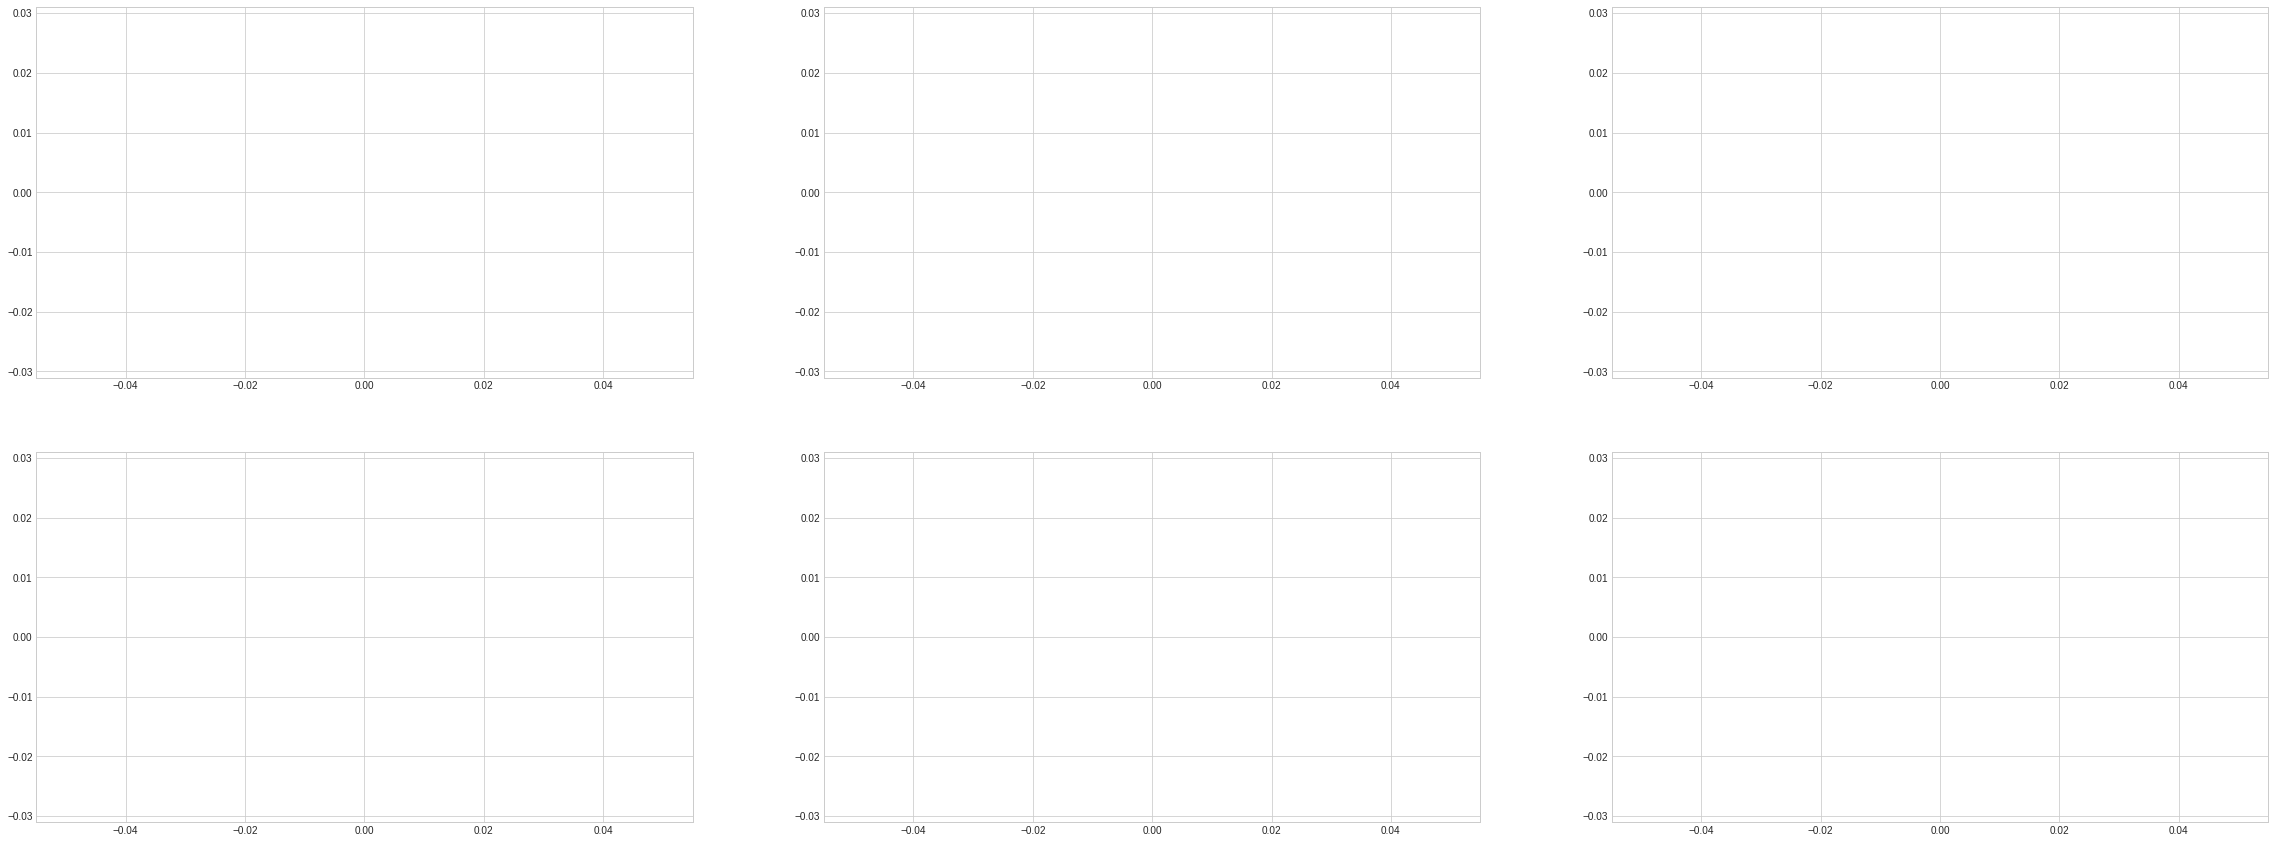

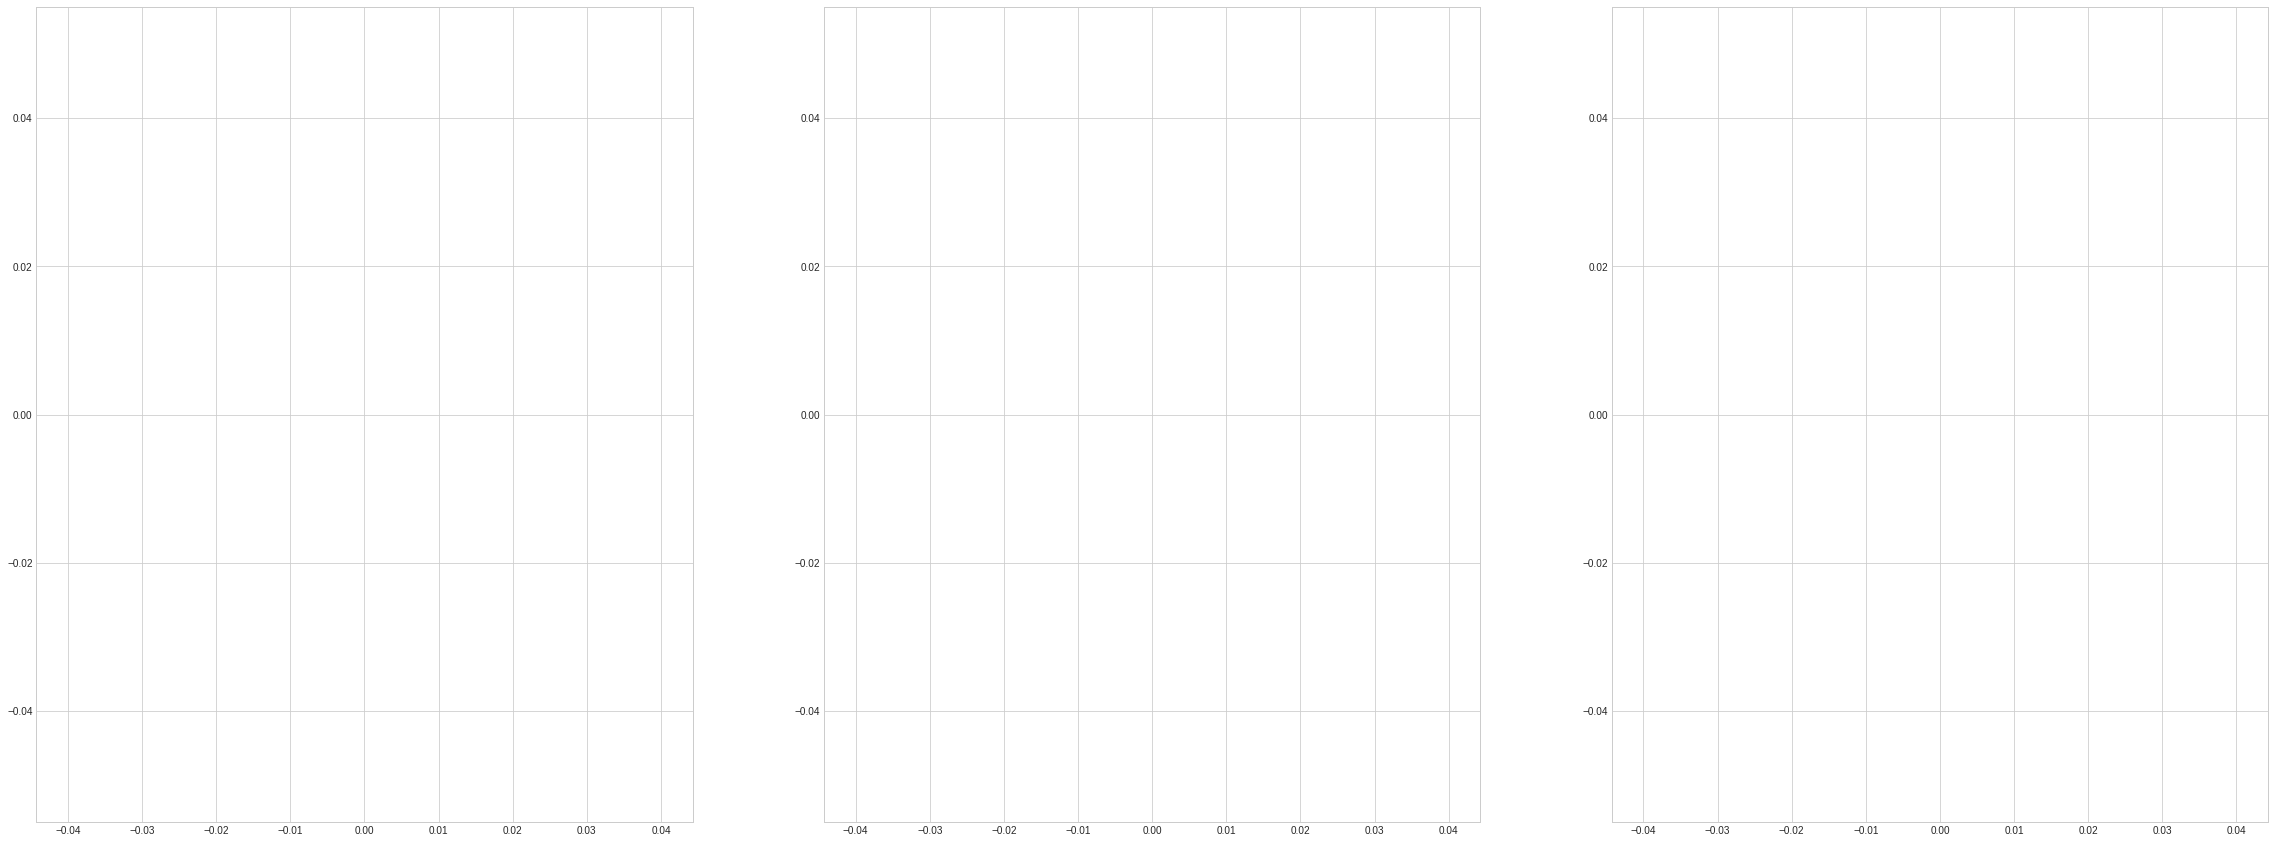

In [2]:
%load_ext autoreload
%autoreload 2
from simulation import DynamicSimulation
from tracker import StaticTracker
prior = [(0, 0, 0.00001, -10, 40, True), 
        (10, 0.009, -0.004, 50, 90, True),
        (40, 0, -0.01, 1, 40, False)]
#prior = [(0, 0, 0.00001, 3, 40, True)]
#prior = [(2.191,1.169,-0.026,7,25,False)]
#prior = [(27.5,-5,0.3,5,16,True)]
#prior = [(25,0,0.13,-20,20,False)] #t0 offset
#prior = [(30,0,0.2,-15,15,False)] #x0 0ffset
#prior = [(30,0,0.2,-15,15,False)] #y0 0ffset
#prior = [(60,0,-0.2,-15,15,False)]
for i in range(20,21):
    model = StaticTracker()
    name = f"simulations/dynamic_{i}"
    sim = DynamicSimulation(model,prior=prior,save_processed=True,video_flag=False,name=name)
    res = sim.run(N=100)
    #sim.video.generate("try.avi")

#analyzeResults(res[2:],prior)

  0%|          | 0/20 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.dir_name images/simulations/simulationD_0/database
len(unique_polynoms) 0


  5%|▌         | 1/20 [00:00<00:11,  1.67it/s]

len(unique_polynoms) 0


 10%|█         | 2/20 [00:01<00:11,  1.59it/s]

len(unique_polynoms) 0


 15%|█▌        | 3/20 [00:01<00:11,  1.54it/s]

len(unique_polynoms) 0


 20%|██        | 4/20 [00:03<00:12,  1.27it/s]

len(unique_polynoms) 0


 25%|██▌       | 5/20 [00:03<00:12,  1.24it/s]

len(unique_polynoms) 1


 30%|███       | 6/20 [00:04<00:10,  1.34it/s]

len(unique_polynoms) 3


 35%|███▌      | 7/20 [00:05<00:09,  1.38it/s]

len(unique_polynoms) 3


 40%|████      | 8/20 [00:06<00:08,  1.34it/s]

len(unique_polynoms) 3


 45%|████▌     | 9/20 [00:06<00:08,  1.36it/s]

len(unique_polynoms) 3


 50%|█████     | 10/20 [00:07<00:07,  1.37it/s]

len(unique_polynoms) 3


 55%|█████▌    | 11/20 [00:08<00:06,  1.32it/s]

len(unique_polynoms) 3


 60%|██████    | 12/20 [00:09<00:06,  1.33it/s]

len(unique_polynoms) 3


 65%|██████▌   | 13/20 [00:09<00:05,  1.29it/s]

len(unique_polynoms) 2


 70%|███████   | 14/20 [00:10<00:04,  1.26it/s]

len(unique_polynoms) 3


 75%|███████▌  | 15/20 [00:11<00:03,  1.26it/s]

len(unique_polynoms) 3


 80%|████████  | 16/20 [00:12<00:03,  1.28it/s]

len(unique_polynoms) 3


 85%|████████▌ | 17/20 [00:13<00:02,  1.26it/s]

len(unique_polynoms) 3


 90%|█████████ | 18/20 [00:13<00:01,  1.28it/s]

len(unique_polynoms) 3


 95%|█████████▌| 19/20 [00:14<00:00,  1.29it/s]

len(unique_polynoms) 3


100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


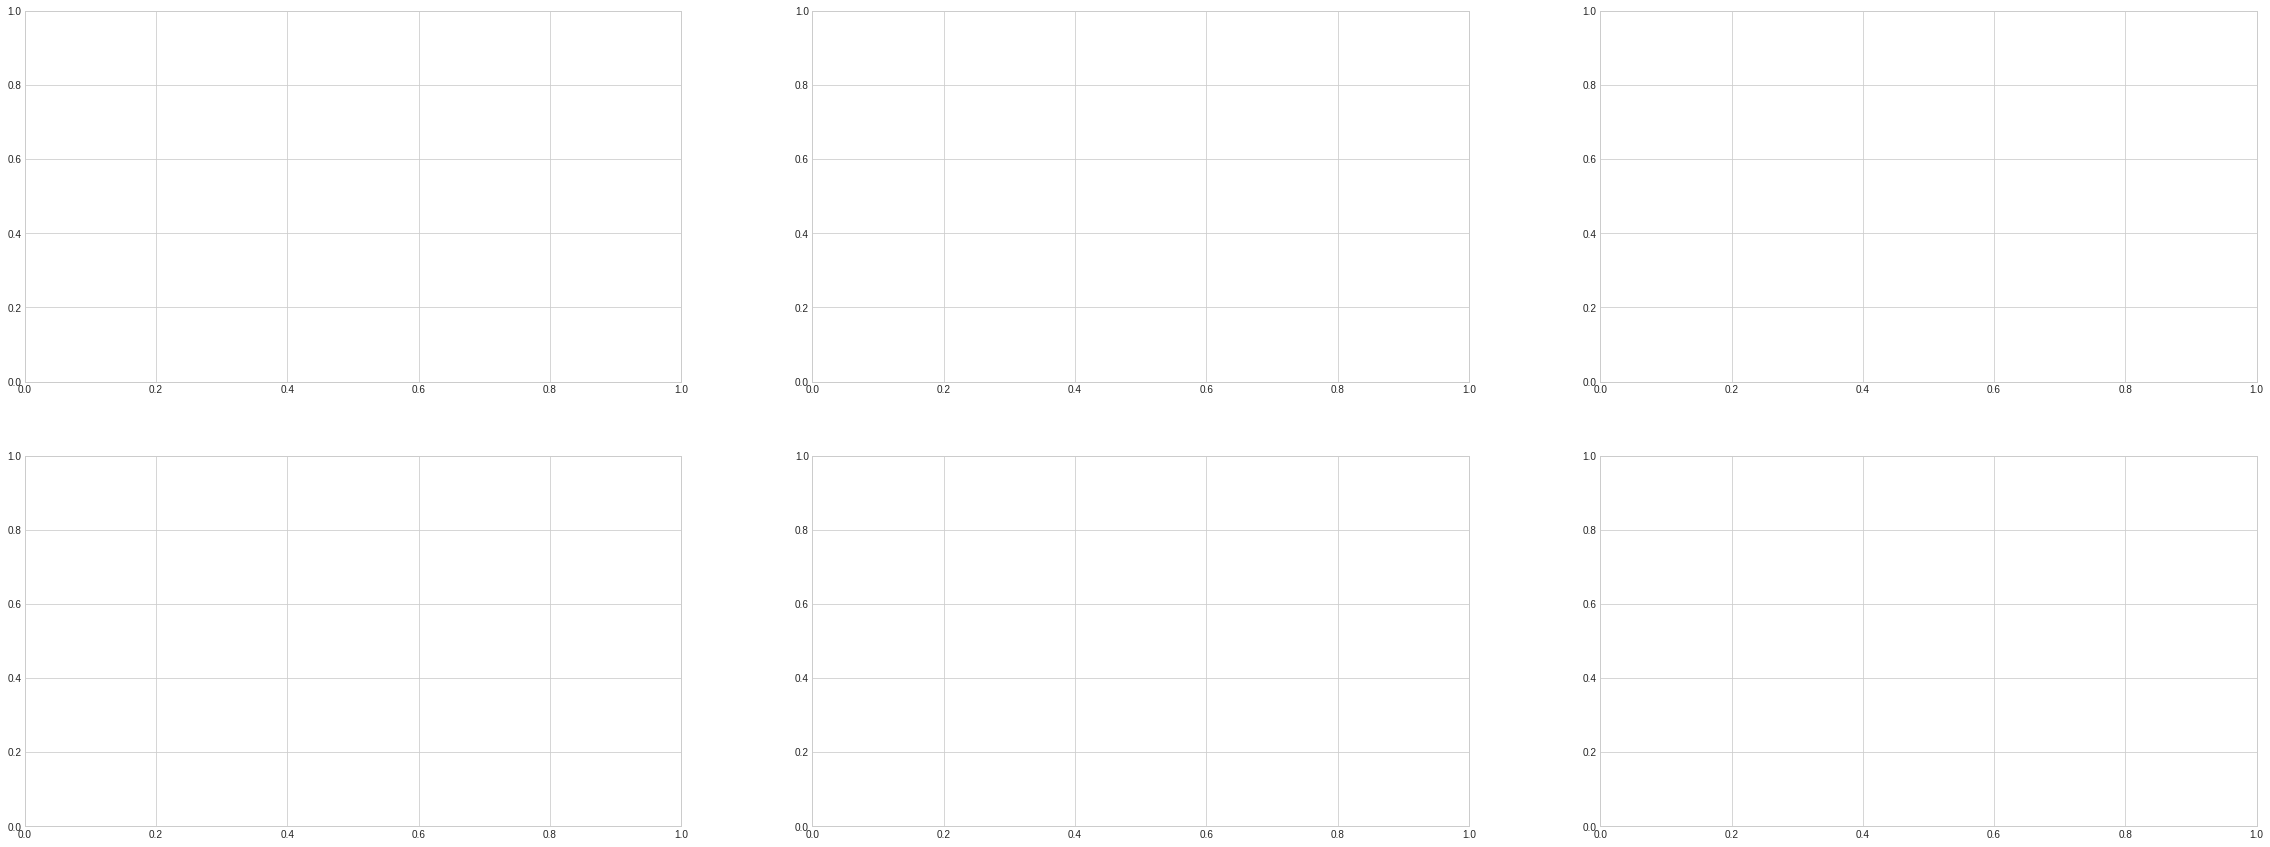

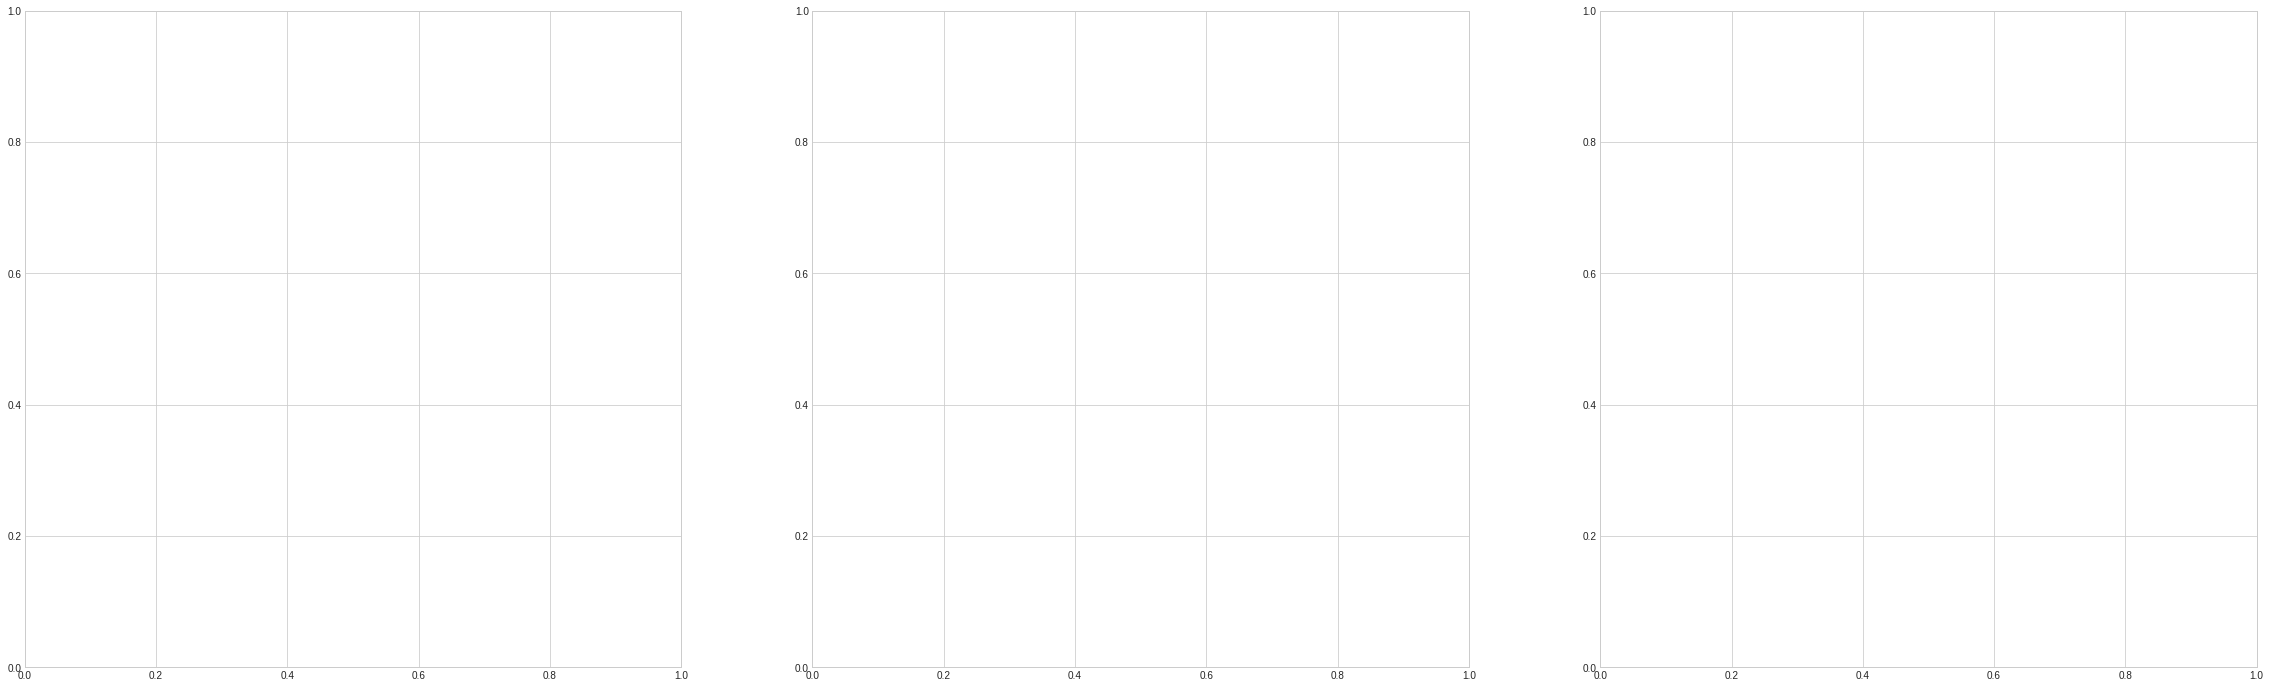

In [30]:
%load_ext autoreload
%autoreload 2
from database import SimulatedProcessedDatabase
from video import SimulationVideo
from tqdm import tqdm

#configuration for simulations:
# DBSCAN(eps=2)
# self.pnt_max_non_update_iterations = 4 # 8
# self.ext_max_non_update_iterations = 5 # 10
# trk similarity check: if dist < 10: #was 2
# if stage == 0:
#X0 = np.arange(-7,7,1)
#Y0 = np.arange(-7,7,1)
#T0 = np.array([0])
#if c[2] > 0.1:
#    T0 = np.arange(-6,6,1)
#if stage == 1:
#X0 = np.arange(X0_coarse-1,X0_coarse+1,0.2)
#Y0 = np.arange(Y0_coarse-1,Y0_coarse+1,0.2)
#T0 = np.array([0])
#if c[2] > 0.1:
#    T0 = np.arange(T0_coarse-1,T0_coarse+1,0.2)

name = "simulations/simulationD_0"
data = SimulatedProcessedDatabase(name)
vid = SimulationVideo(name)
for t in tqdm(range(0,20)):
    prior, video_data, points, polynoms, debug_info, pos = data.load(t)
    vid.save(t, prior, video_data, points, polynoms, debug_info, pos)

In [178]:
prior = [(27.5,-5,0.3,10,16.1,True)]
print(res[21:])
analyzeResults(res[21:],prior)

[[{'f': poly1d([  1.09718071, -10.83597746,  34.01642969]), 'x_start': 5.776204946051699, 'x_end': 7.634726083428461, 'fxFlag': False}], [{'f': poly1d([ 0.49354412, -3.46557648,  9.64561674]), 'x_start': 5.794790157425467, 'x_end': 7.616140872054694, 'fxFlag': False}], [{'f': poly1d([  1.04367673, -11.43984101,  38.41297554]), 'x_start': 5.8130036645717595, 'x_end': 7.597927364908402, 'fxFlag': False}], [{'f': poly1d([  1.51122598, -17.86823976,  60.44238428]), 'x_start': 5.264530591429584, 'x_end': 7.551264193909731, 'fxFlag': False}], [{'f': poly1d([  1.51140247, -17.86632244,  60.41928565]), 'x_start': 5.287397927454386, 'x_end': 7.528396857884929, 'fxFlag': False}], [{'f': poly1d([  1.49854861, -17.70098462,  59.89857764]), 'x_start': 5.309807916758691, 'x_end': 7.5059868685806235, 'fxFlag': False}], [{'f': poly1d([  1.49279294, -17.64442596,  59.77084951]), 'x_start': 5.331769706276911, 'x_end': 7.4840250790624046, 'fxFlag': False}], [{'f': poly1d([  1.49852387, -17.71155334,  59.

In [76]:
np.flip(np.array([[2, 3],[4,5]]))

[autoreload of dataset failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/kfir/workspace/RadarLocalization/dataset.py", line 97
    prior_list.append({"c":

array([[5, 4],
       [3, 2]])

In [77]:
np.flip(np.array([[2, 3],[4,5]]))

array([[5, 4],
       [3, 2]])

In [20]:
import scipy.optimize

In [50]:
import numpy as np
import time

px,py = 10,23
a0, a1, a2 = 5, 0.1, 0.01
t1 = time.time()
for i in range(400):
    res = scipy.optimize.minimize(lambda x : np.sqrt((px-x)**2+(py-(a0+i/10.)+a1*x+a2*x**2)**2), x0=[5])
t2 = time.time()
print(t2-t1)
print("res",res.x)
print(res.x, a0 + a1*res.x + a2*res.x**2)
optx = res.x
opty = a0 + a1*res.x + a2*res.x**2

0.43612146377563477
res [17.71929741]
[17.71929741] [9.91166475]


In [55]:
import math
t3 = time.time()
x = np.linspace(-100,100, 100)
y = a0 + a1*x+a2*x**2
for i in range(400):
    a = np.argmin(np.sqrt((x-px)**2+(y-py)**2))
t4 = time.time()
print(t4-t3)
print(x[a], y[a])
print(math.sqrt((x[a]-px)**2+(y[a]-py)**2))
print(math.sqrt((optx-px)**2+(opty-py)**2))

0.008011102676391602
15.151515151515156 8.810835629017449
15.095379886013166
15.195133173954204


In [81]:
import numpy.polynomial.polynomial as P

In [97]:
f1 = (1, 1, 2)
f2 = (1.1, 1, 2.2)
f1mf2 = P.polysub(f1,f2)
f1mf2 = P.polymul(f1mf2,f1mf2)
val = P.polyint(f1mf2,lbnd=-10)
a = P.polyval(-10, val) + P.polyval(5,10)
print(a)

10.0


In [68]:
print (res)

[[{'f': poly1d([-1.02236445e-02,  5.34088473e-03,  3.98952978e+01]), 'x_start': -0.5529887922981365, 'x_end': 39.97303174577813, 'fxFlag': False}, {'f': poly1d([-0.00042631,  0.01510269, -0.11574659]), 'x_start': 4.833046593282244, 'x_end': 38.7783703938952, 'fxFlag': True}, {'f': poly1d([-4.46306256e-03,  6.61758397e-02,  8.85350905e+00]), 'x_start': 50.314965236442816, 'x_end': 77.68272844134319, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.3503586896077549, 'x_end': 39.77040164308775, 'fxFlag': False}, {'f': poly1d([-0.0002941 ,  0.01255984, -0.13503909]), 'x_start': 4.162537176968926, 'x_end': 38.60097408217034, 'fxFlag': True}, {'f': poly1d([-1.94101401e-03, -2.51104960e-01,  1.84207231e+01]), 'x_start': 50.526461484425944, 'x_end': 85.7248176360228, 'fxFlag': True}], [{'f': poly1d([-1.03754735e-02,  1.29286493e-02,  3.98142964e+01]), 'x_start': -0.1497548879442772, 'x_end': 39.569797841424275, 'fxFlag': False}, {'f': poly1d([

In [28]:
res[1][0]["f"].c[0]

-0.010265869210950747

covy [[ 6.36231538e-05 -1.75676625e-03  1.01384178e-02]
 [-1.75676625e-03  4.96738288e-02 -2.92808834e-01]
 [ 1.01384178e-02 -2.92808834e-01  1.78504452e+00]]
f           2
-0.02082 x + 1.118 x + 1.139


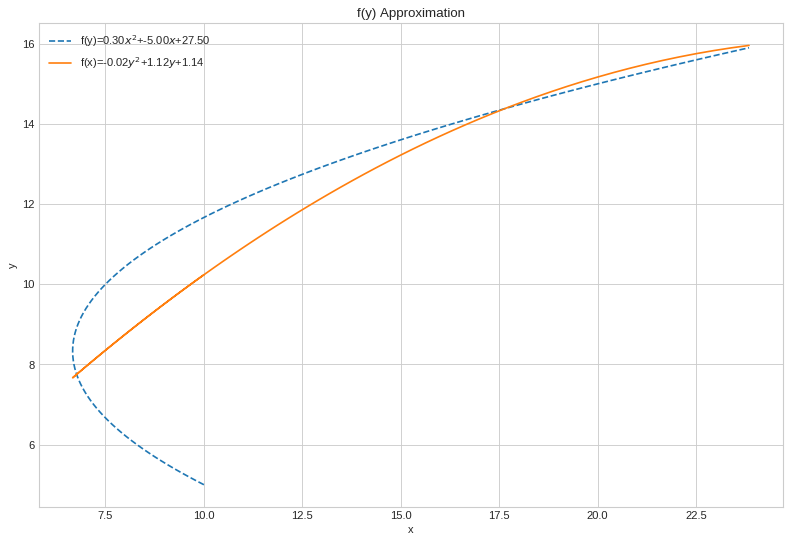

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')

yy = np.arange(5,16,0.1)
xx = 0.3*yy**2-5*yy+27.5
f = np.array([27.5,-5,0.3])
plt.plot(xx,yy,'--',label=f'f(y)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(xx, yy, 2, cov=True)
print("covy",covy)
f = np.poly1d(fity)
print("f",f)
plt.plot(xx,f(xx),label=f'f(x)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()


In [151]:
y=np.array([7,12,16,16.1])
x = 0.3*y**2-5*y+27.5
print("x",x)
print(f(x))

x [ 7.2   10.7   24.3   24.763]
[ 7.052      8.347     83.147     87.6468507]


f             2
-5.365e-17 x + 1e-06 x + 1
f             2
-2.497e-17 x + 0.0001 x + 0.9999


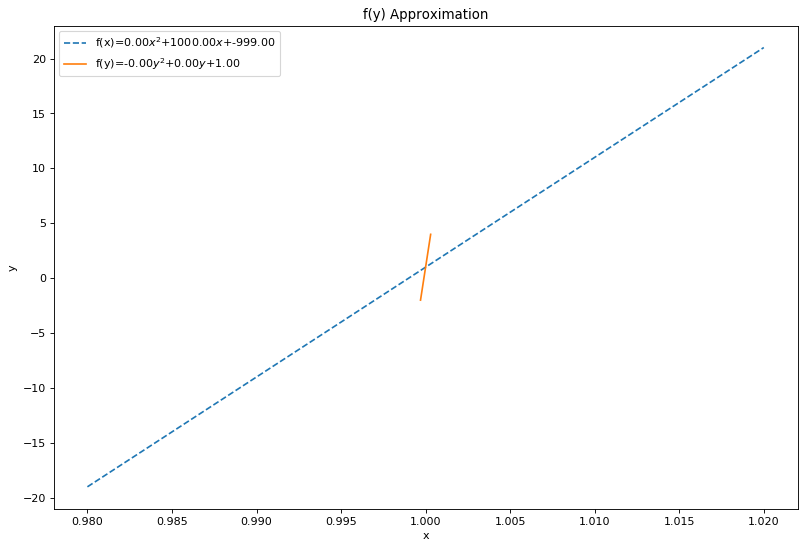

In [96]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(12, 8), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")
plt.title(r"f(y) Approximation")
plt.xlabel('x')
plt.ylabel('y')
y = np.array([-2,0,2,4])
x = np.array([1,0.999,1.001,1])
fitx, covx = np.polyfit(x, y, 2, cov=True)
print("f",f)
f = np.poly1d(fitx)
xx = np.arange(0.98,1.02,0.001)
plt.plot(xx,f(xx),'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

fity, covy = np.polyfit(y, x, 2, cov=True)
f = np.poly1d(fity)
print("f",f)
yy = np.arange(-2,4,0.01)
plt.plot(f(yy),yy,label=f'f(y)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')
plt.legend()

In [204]:
from scipy.spatial.distance import cdist
a0, a1, a2  = 1, 1, 1
M = np.array([[1,2],[3,4],[5,10]])
x = np.linspace(0,10,10*10)
y = a0 + a1*x + a2*x**2
pol = np.array([x,y]).T
print(M.shape, pol.shape)
dists = cdist(M, pol)
print(dists.shape)
ind = np.argmin(dists,axis=1)
D = pol[ind,:]
print(D.shape)
print(D,M)

(3, 2) (100, 2)
(3, 100)
(3, 2)
[[ 0.70707071  2.20701969]
 [ 1.41414141  4.41393735]
 [ 2.62626263 10.52351801]] [[ 1  2]
 [ 3  4]
 [ 5 10]]


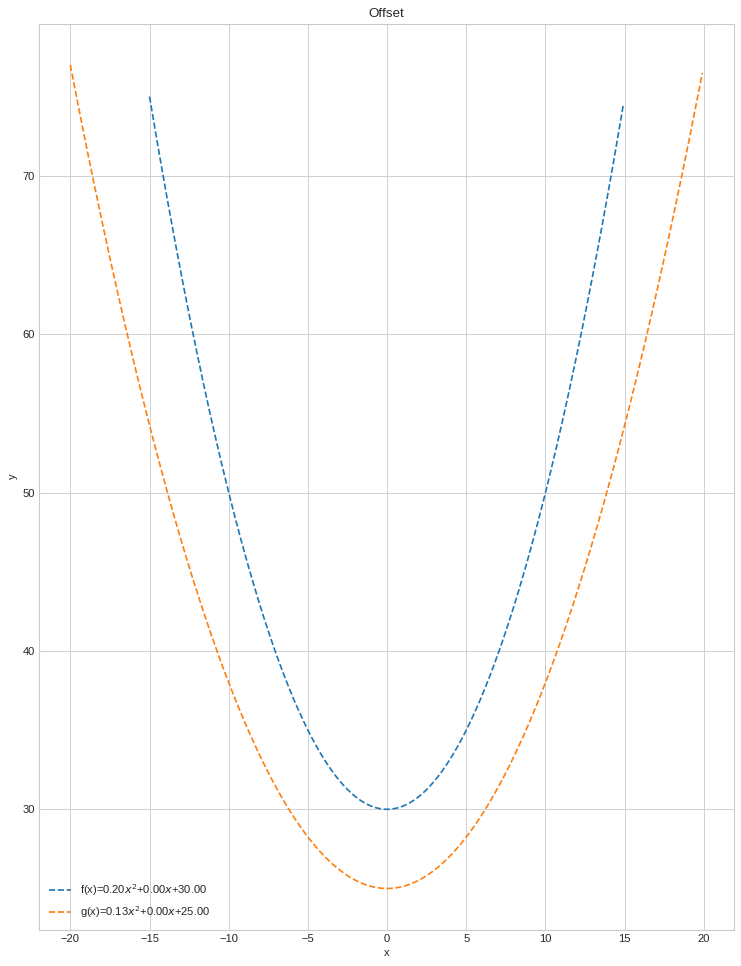

In [73]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(20, 15), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")

plt.title(r"Offset")

plt.xlabel('x')
plt.ylabel('y')
f = [30,0,0.2]
f2 = [25,0,0.13]
x_offset = 0
xx = np.arange(-15,15,0.1)
yy = f[0] + f[1]*(xx-x_offset) + f[2]*(xx-x_offset)**2
plt.plot(xx,yy,'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

xx = np.arange(-20,20,0.1)
yy = f2[0] + f2[1]*xx + f2[2]*xx**2
plt.plot(xx,yy,'--',label=f'g(x)={f2[2]:.2f}$x^2$+{f2[1]:.2f}$x$+{f2[0]:.2f}')

plt.axis('scaled')

plt.legend()


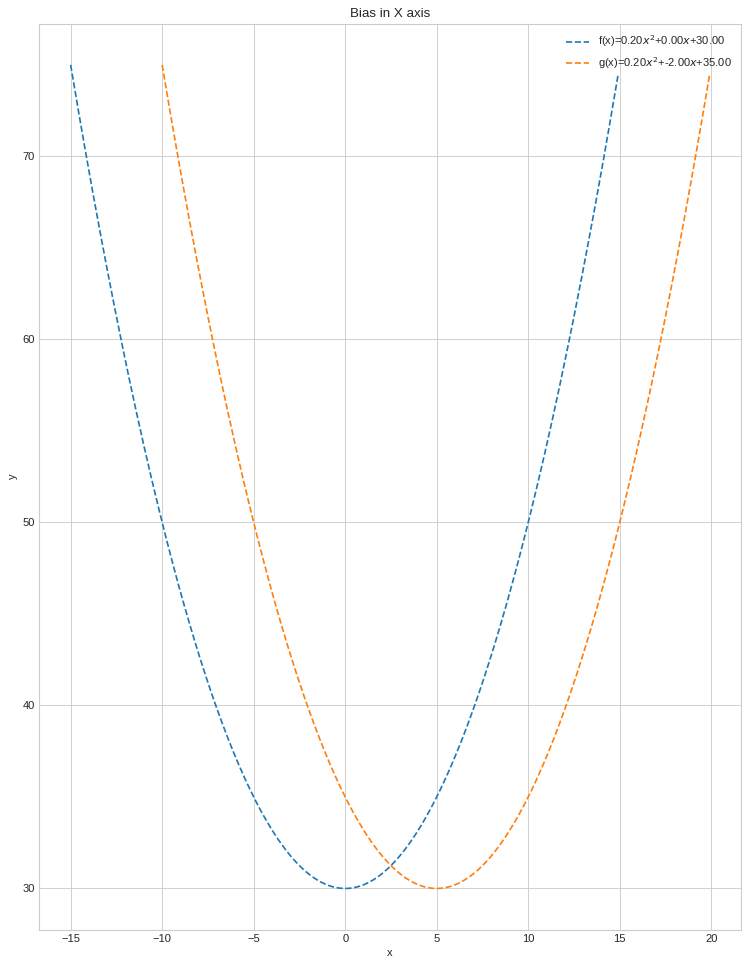

In [75]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(20, 15), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")

plt.title(r"Bias in X axis")

plt.xlabel('x')
plt.ylabel('y')
f = [30,0,0.2]
f2 = [30,0,0.2]

xx = np.arange(-15,15,0.1)
yy = f[0] + f[1]*xx + f[2]*xx**2
plt.plot(xx,yy,'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

x_offset = 5
xx = np.arange(-10,20,0.1)
#yy = f2[0] + f2[1]*(xx-x_offset) + f2[2]*(xx-x_offset)**2
f2 = [35,-2,0.2]
yy = f2[0] + f2[1]*xx + f2[2]*xx**2
plt.plot(xx,yy,'--',label=f'g(x)={f2[2]:.2f}$x^2$+{f2[1]:.2f}$x$+{f2[0]:.2f}')

plt.axis('scaled')

plt.legend()

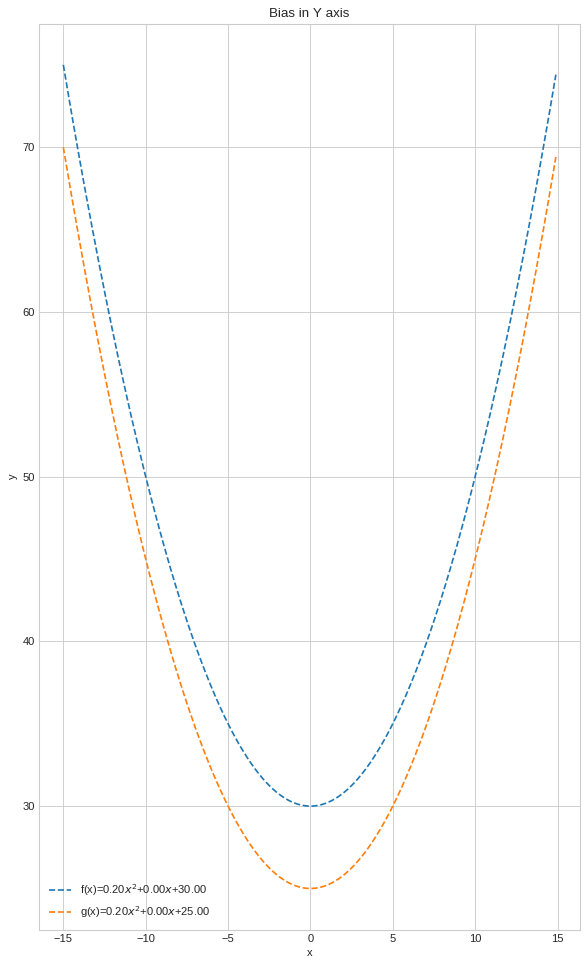

In [76]:
import numpy as np
import matplotlib.pyplot as plt

#real function: f(y) = 0.1y**2+y+1
plt.figure(figsize=(20, 15), dpi=80)
#plt.title(r"f(y)=$y^2$+$y$+1 approximation")

plt.title(r"Bias in Y axis")

plt.xlabel('x')
plt.ylabel('y')
f = [30,0,0.2]
f2 = [25,0,0.2]
xx = np.arange(-15,15,0.1)
yy = f[0] + f[1]*xx + f[2]*xx**2
plt.plot(xx,yy,'--',label=f'f(x)={f[2]:.2f}$x^2$+{f[1]:.2f}$x$+{f[0]:.2f}')

xx = np.arange(-15,15,0.1)
yy = f2[0] + f2[1]*xx + f2[2]*xx**2
plt.plot(xx,yy,'--',label=f'g(x)={f2[2]:.2f}$x^2$+{f2[1]:.2f}$x$+{f2[0]:.2f}')

plt.axis('scaled')

plt.legend()


x [14.   14.05 14.1  14.15 14.2  14.25 14.3  14.35 14.4  14.45 14.5  14.55
 14.6  14.65 14.7  14.75 14.8  14.85 14.9  14.95 15.   15.05 15.1  15.15
 15.2  15.25 15.3  15.35 15.4  15.45 15.5  15.55 15.6  15.65 15.7  15.75
 15.8  15.85 15.9  15.95]
f1         2
-150.9 x + 19.58 x - 0.5447
[-29507.84660637 -29719.21893808 -29931.34562539 -30144.2266683
 -30357.86206681 -30572.25182093 -30787.39593065 -31003.29439597
 -31219.94721689 -31437.35439341 -31655.51592554 -31874.43181326
 -32094.1020566  -32314.52665553] [5262.296 5300.057 5337.953 5375.984 5414.15  5452.451 5490.887 5529.458
 5568.164 5607.005 5645.981 5685.092 5724.338 5763.719]
28072.503517743433


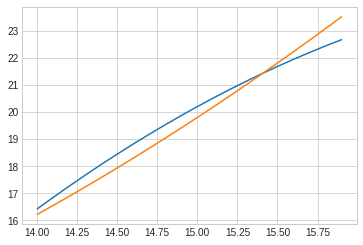

In [106]:
from numpy.polynomial import polynomial as P
def innerProductPolynoms(f1, f2, xmin, xmax):
    dx = 0.05
    x = np.arange(xmin,xmax,dx)
    print("x",x)
    #f1 = np.poly1d(f1)
    #f2 = np.poly1d(f2)
    y1 = f1(x)
    y2 = f2(x)
    print("f1",f1)
    
    print(y1[1:15], y2[1:15])

    dist = np.sqrt(np.sum((y2-y1)**2*dx)) / (xmax-xmin)

    return dist

x = np.arange(14,16,0.1)
y1 = -150.87112042354389 + 19.575405784692236*x -0.544708238720031*x**2
y2 = 27 - 4.83*x+0.29*x**2
f1 = np.poly1d([-150.87112042354389,19.575405784692236,-0.544708238720031])
f2 = np.poly1d([27,-4.83,0.29])
plt.plot(x,y1)
plt.plot(x,y2)

dist = innerProductPolynoms(f1, f2, 14, 16)
print(dist)

In [107]:
-151+19.58*14-0.5447*14**2

16.358800000000016

In [6]:
import numpy as np
A = np.array([[1,2,3],[10,7,3],[1,4,3]])
np.argmin(A, axis=1)

array([0, 2, 0])

lane [-0.03667778  1.90291742 -0.02260511] [[ 8.77598348e-05 -2.09263475e-04  7.53979135e-05]
 [-2.09263475e-04  5.38548114e-04 -2.26542209e-04]
 [ 7.53979135e-05 -2.26542209e-04  1.42279794e-04]]
          2
-0.03668 x + 84.9 x - 4.797e+04
[-3.66777777e-02  8.49007006e+01 -4.79729544e+04] [[ 8.77598348e-05 -2.09263475e-04  7.53979135e-05]
 [-2.09263475e-04  5.38548114e-04 -2.26542209e-04]
 [ 7.53979135e-05 -2.26542209e-04  1.42279794e-04]]


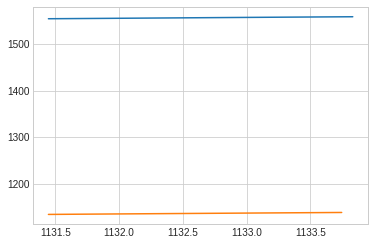

In [119]:
import sys
import numpy as np

def translatePolynom(c, xstart, xend, pos):
    x = np.array([xstart, 0.5*(xstart+xend), xend])
    x_trns = x - pos[0]
    y = np.array([c[0]*x[0]**2+c[1]*x[0]+c[2], c[0]*x[1]**2+c[1]*x[1]+c[2], c[0]*x[2]**2+c[1]*x[2]+c[2]])
    y_trns = y - pos[1]
    A = [[x_trns[0]**2, x_trns[0], 1],[x_trns[1]**2, x_trns[1], 1],[x_trns[2]**2, x_trns[2], 1]]
    c = np.linalg.inv(A).dot(y_trns)

    return c

x = np.array([1131.44509189, 1131.68601848, 1131.92288045, 1132.15565661, 1132.38467442,
 1132.6157338,  1132.85088776, 1133.09011526, 1133.33339487, 1133.58070482,
 1133.83202296])
y = np.array([1554.14573279, 1554.57418017, 1555.00488793, 1555.43781753, 1555.87274802,
 1556.30659631, 1556.73823898, 1557.16763737, 1557.59475305, 1558.01954779,
 1558.44198354])

minx = np.min(x)
maxx = np.max(x)
miny = np.min(y)
maxy = np.max(y)

lane, cov = np.polyfit(x-minx, y-miny, 2,cov=True)
print("lane", lane, cov)

lane = translatePolynom(lane, minx, maxx, [-minx,-maxx])

f = np.poly1d(lane)
print(f)

plt.plot(x,y)

xx = np.arange(np.min(x), np.max(x), 0.1)
yy = f[2] * (xx)**2 + f[1] * (xx) + f[0]
plt.plot(xx,yy)
print(lane, cov)

In [1]:
from nuscenes.nuscenes import NuScenes
directory = r"/home/kfir/workspace/nuScenes/v1.0-trainval"
nusc = NuScenes(version="v1.0-trainval", dataroot=directory, verbose=False)

In [2]:
import scipy.ndimage.morphology
import map_utils

from dataset import NuscenesDataset

dataset = NuscenesDataset(nusc, scene_id=690, directory=directory)


scene_id=690 scene_name=scene-0904 map_name=boston-seaport


/home/kfir/workspace/RadarLocalization/dataset.py:365: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  rot_imu = np.array([(m['utime'], m['q']) for m in self.imu])


odom_speed [[1.53729795e+15 9.00000000e+00]
 [1.53729795e+15 9.00000000e+00]
 [1.53729795e+15 9.00000000e+00]
 ...
 [1.53729811e+15 3.70000000e+01]
 [1.53729811e+15 3.70000000e+01]
 [1.53729811e+15 3.70000000e+01]]


/home/kfir/.local/lib/python3.6/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/kfir/.local/lib/python3.6/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


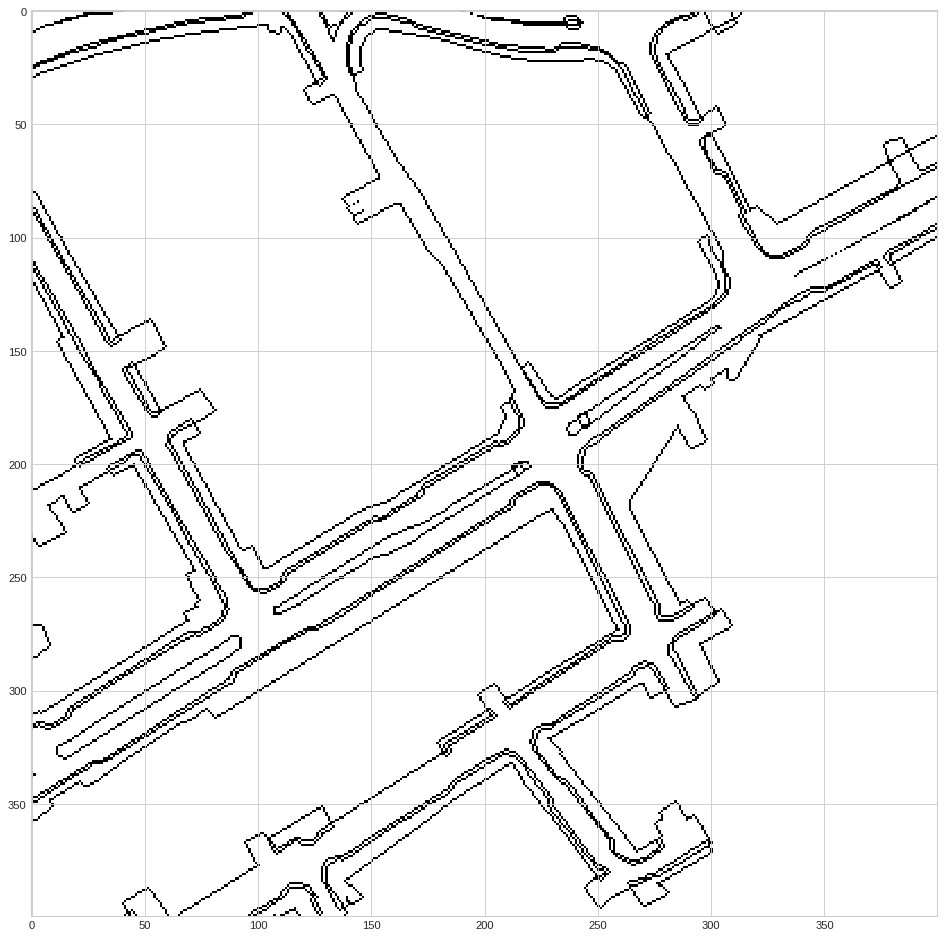

In [3]:
image = map_utils.getLayer(dataset.nusc_map, dataset.first_gt_trns, patchSize=400)
image1 = map_utils.getLayer(dataset.nusc_map, dataset.first_gt_trns, patchSize=400, layer_names=['walkway'])
edges = image - scipy.ndimage.morphology.binary_dilation(image)
edges1 = image1 - scipy.ndimage.morphology.binary_dilation(image1)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15), dpi=80)
plt.imshow(edges | edges1)

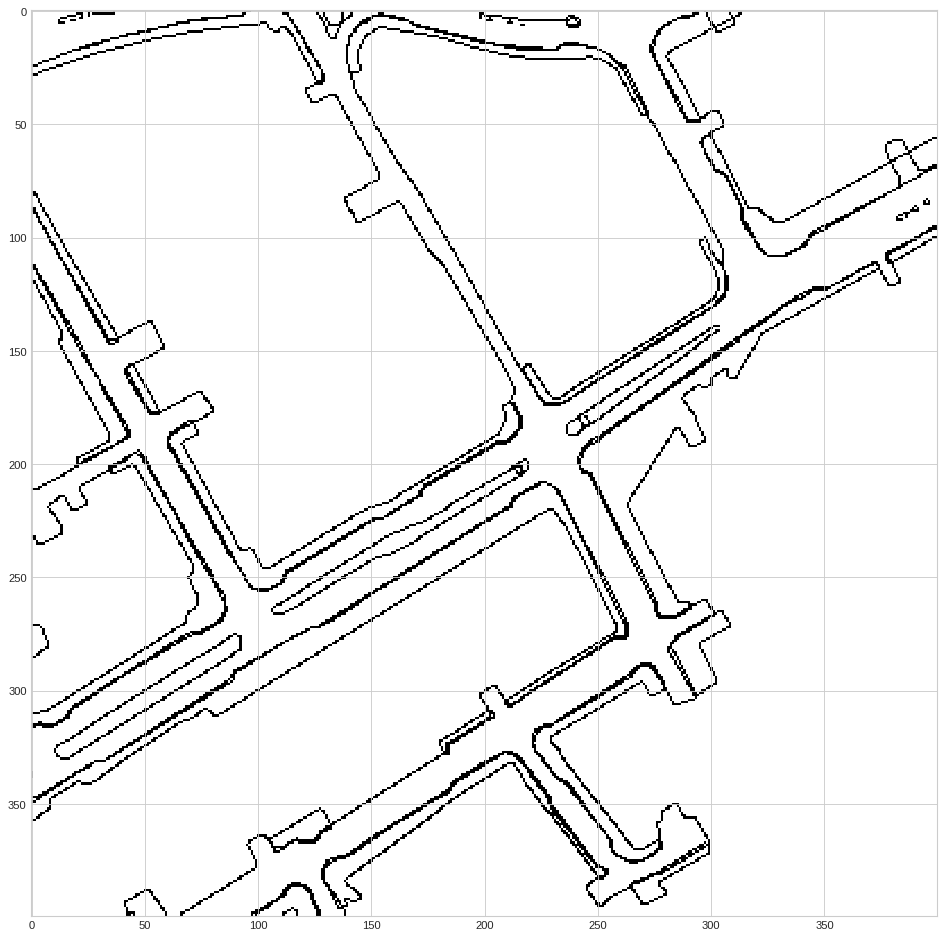

In [4]:
edges2 = map_utils.getCombinedMap(dataset.nusc_map, dataset.first_gt_trns, patchSize=400)
plt.figure(figsize=(20, 15), dpi=80)
plt.imshow(edges2)

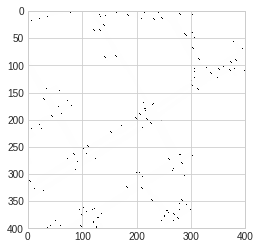

In [25]:
import numpy as np
import cv2 as cv
# find Harris corners
dst = cv.cornerHarris(image,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(image,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
image[res[:,1]-1,res[:,0]-1] = 100
image[res[:,3]-1,res[:,2]-1] = 100

plt.imshow(image)

In [8]:
import cv2
cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 150:
        cv2.drawContours(edges, [c], -1, 0, -1)
        
cv2.imshow('edges', edges)

In [ ]:
import cv2
import numpy as np

# Load image, create horizontal/vertical masks, Gaussian blur, Adaptive threshold
image = edges #cv2.imread('1.png')
original = image.copy()
horizontal_mask = np.zeros(image.shape, dtype=np.uint8)
vertical_mask = np.zeros(image.shape, dtype=np.uint8)
gray = image #cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 23, 7)

# Remove small noise on thresholded image
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 150:
        cv2.drawContours(thresh, [c], -1, 0, -1)

# Detect horizontal lines
dilate_horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
dilate_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, dilate_horizontal_kernel, iterations=1)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detected_lines = cv2.morphologyEx(dilate_horizontal, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (36,255,12), 2)
    cv2.drawContours(horizontal_mask, [c], -1, (255,255,255), 2)

# Remove extra horizontal lines using contour area filtering
#horizontal_mask = cv2.cvtColor(horizontal_mask,cv2.COLOR_BGR2GRAY)
cnts = cv2.findContours(horizontal_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 1000 or area < 100:
        cv2.drawContours(horizontal_mask, [c], -1, 0, -1)

# Detect vertical 
dilate_vertical_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1,7))
dilate_vertical = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, dilate_vertical_kernel, iterations=1)
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,2))
detected_lines = cv2.morphologyEx(dilate_vertical, cv2.MORPH_OPEN, vertical_kernel, iterations=4)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (36,255,12), 2)
    cv2.drawContours(vertical_mask, [c], -1, (255,255,255), 2)

# Find intersection points
#vertical_mask = cv2.cvtColor(vertical_mask,cv2.COLOR_BGR2GRAY)
combined = cv2.bitwise_and(horizontal_mask, vertical_mask)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
combined = cv2.morphologyEx(combined, cv2.MORPH_OPEN, kernel, iterations=1)

# Highlight corners
cnts = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    # Find centroid and draw center point
    try:
        M = cv2.moments(c)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.circle(original, (cx, cy), 3, (36,255,12), -1)
    except ZeroDivisionError:
        pass

cv2.imshow('thresh', thresh)
cv2.imshow('horizontal_mask', horizontal_mask)
cv2.imshow('vertical_mask', vertical_mask)
cv2.imshow('combined', combined)
cv2.imshow('original', original)
cv2.imshow('image', image)
cv2.waitKey()

In [37]:
#!python3 -m pip install sympy
from sympy.solvers import solve
from sympy import Symbol
a = 0.2
b = 1
c = 10
x = Symbol('x')
#c = Symbol('c')
solve(4*a**2*x**4 + 4*a*b*x**3 + (b**2+1)*x**2, 0)

[]

In [55]:
import numpy as np
a = 0.2
b = 1
c = 10
x = np.linspace(-20,20,200)
y = a*x**2+b*x+c
dy = np.sqrt(1+(np.diff(y)/np.diff(x))**2)
S = np.cumsum(dy)
l = S[-1]
idx = []
for i in range(10+1):
    idx.append(np.argmin(np.abs(S - l/10 * i)))
print(idx)

[0, 12, 28, 49, 99, 132, 151, 165, 177, 188, 198]


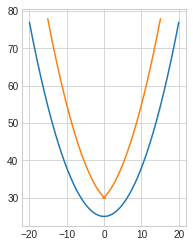

In [86]:
import matplotlib.pyplot as plt

def createHypothesis(a0,a1,a2,x0,y0,t0,x,y):
    a0_tag = a0+y0-a1*x0+a2*x0**2
    a1_tag = a1-2*a2*x0
    denom = np.sqrt(1+(2*a2*x+a1_tag)**2)
    x_tag = x + t0 * (2*a2*x+a1_tag)/denom
    y_tag = a0_tag+a1_tag*x+a2*x**2-t0/denom

    return x_tag, y_tag


x = np.linspace(-20,20,200)
a0, a1, a2 = 25, 0, 0.13
y = a0 + a2*x**2


x0 = 0
y0 = 0
t0 = -5
x_tag, y_tag = createHypothesis(a0,a1,a2,x0,y0,t0,x,y)

plt.plot(x, y)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(x_tag, y_tag)

f           2
-0.01998 x + 1.7 x + 5.828e-15


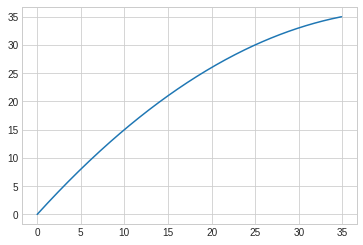

In [70]:
import matplotlib.pyplot as plt
xx = np.array([-40, -25, -5, -4.9]) + 40
yy = np.array([-50, -40, 0, 0]) + 50

fity = np.polyfit(yy, xx, 2)
f = np.poly1d(fity)
print("f",f)
xx = np.arange(0, 35, 0.1)
yy = np.arange(0, 50, 0.1)
plt.plot(xx,f(xx),label=f'f(x)={f[2]:.2f}$y^2$+{f[1]:.2f}$y$+{f[0]:.2f}')

In [62]:
print(xx, f(xx))

[-4.00000000e+01 -3.99000000e+01 -3.98000000e+01 -3.97000000e+01
 -3.96000000e+01 -3.95000000e+01 -3.94000000e+01 -3.93000000e+01
 -3.92000000e+01 -3.91000000e+01 -3.90000000e+01 -3.89000000e+01
 -3.88000000e+01 -3.87000000e+01 -3.86000000e+01 -3.85000000e+01
 -3.84000000e+01 -3.83000000e+01 -3.82000000e+01 -3.81000000e+01
 -3.80000000e+01 -3.79000000e+01 -3.78000000e+01 -3.77000000e+01
 -3.76000000e+01 -3.75000000e+01 -3.74000000e+01 -3.73000000e+01
 -3.72000000e+01 -3.71000000e+01 -3.70000000e+01 -3.69000000e+01
 -3.68000000e+01 -3.67000000e+01 -3.66000000e+01 -3.65000000e+01
 -3.64000000e+01 -3.63000000e+01 -3.62000000e+01 -3.61000000e+01
 -3.60000000e+01 -3.59000000e+01 -3.58000000e+01 -3.57000000e+01
 -3.56000000e+01 -3.55000000e+01 -3.54000000e+01 -3.53000000e+01
 -3.52000000e+01 -3.51000000e+01 -3.50000000e+01 -3.49000000e+01
 -3.48000000e+01 -3.47000000e+01 -3.46000000e+01 -3.45000000e+01
 -3.44000000e+01 -3.43000000e+01 -3.42000000e+01 -3.41000000e+01
 -3.40000000e+01 -3.39000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.dir_name images/simulations/dynamic_testing2/images/
self.dir_name images/simulations/dynamic_testing2/database
frame 0
Number of point tracks before run() 0
Number of extended tracks before run() 0
Ge.shape = (144, 0) There are [] non zero elements in Ge
len(unique_polynoms) 0
frame 1
Number of point tracks before run() 144
Number of extended tracks before run() 0
Ge.shape = (144, 0) There are [] non zero elements in Ge
len(unique_polynoms) 0


/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


frame 2
Number of point tracks before run() 240
Number of extended tracks before run() 0
Ge.shape = (144, 0) There are [] non zero elements in Ge
len(unique_polynoms) 0


/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


frame 3
Number of point tracks before run() 325
Number of extended tracks before run() 0
Ge.shape = (144, 0) There are [] non zero elements in Ge


/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Opening flipped polynom!!!
created an extended object! [ 4.02377907e+01 -1.91599371e-02 -9.91198781e-03 -3.72414886e+00
  4.13410857e+01]
created an extended object! [ 1.69732844e+01 -1.45085201e-01 -3.19375517e-03  4.95225896e+01
  9.08115449e+01]
created an extended object! [ 2.85593421e-01 -5.75749541e-03 -1.54900485e-04 -1.19803104e+01
  3.90752640e+01]
Tracks are similar! do not open a new trk (-0.00015490048520575892, -0.005757495409963272, 0.28559342115309777) (-0.0005527151560101733, 0.009487750408385332, -1.2322709679609134)
len(unique_polynoms) 0
frame 4
Number of point tracks before run() 245
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [20 32  9] non zero elements in Ge
Meas [61.07141824 -4.43285781] is updating trk2 with state vector = [ 1.69732844e+01 -1.45085201e-01 -3.19375517e-03  4.97290344e+01
  9.06051001e+01] and covariance = 1.8825688504671603 0.20852829072645465 0.005040855152680309
self.kf.R = [[1.25493363 0.        ]
 [0.         6.69595285]]
Meas [68.34639007 -5.88424457] is updating trk2 with state vector = [ 1.68991884e+01 -1.32808235e-01 -3.52974268e-03  4.97290344e+01
  9.06051001e+01] and covariance = 1.585569368741539 0.12331392950776775 0.002056956062321336
self.kf.R = [[1.1671143  0.        ]
 [0.         7.83044629]]
Meas [ 75.35414446 -13.04447291] is updating trk2 with state vector = [ 1.71394180e+01 -1.66623519e-01 -2.72381319e-03  4.97290344e+01
  9.06051001e+01] and covariance = 1.537764969524334 0.11067026606483292 0.0015970632536597702
self.kf.R = [[1.07140047 0.        ]
 [0.         8.28607786]]
Meas [69.59849932 -8.09996389] is updating trk2 with state ve

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00011693062085397341, -0.008951053025358213, 0.3695468446425605) (-0.0006067778939987635, 0.008064516549793668, -0.9740176954096652)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009442410339018686, -0.04610604702688609, 40.54656461509476) (-0.004924889609238279, -0.2562640697322512, 43.14201327593599)
len(unique_polynoms) 3
frame 5
Number of point tracks before run() 260
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [23 21  7] non zero elements in Ge
self.kf.R = [[0.94589453 0.        ]
 [0.         1.23331962]]
self.kf.R = [[2.18848201 0.        ]
 [0.         4.37487987]]
self.kf.R = [[1.76427528 0.        ]
 [0.         3.46423412]]
self.kf.R = [[1.00387332 0.        ]
 [0.         1.63062028]]
self.kf.R = [[2.0068781  0.        ]
 [0.         3.95063925]]
self.kf.R = [[2.31718443 0.        ]
 [0.         4.7503097 ]]
Meas [ 84.91427851 -23.00377809] is updating trk2 with state vector = [ 1.59130868e+01 -6.04274636e-02 -4.32060875e-03  4.99440959e+01
  9.11327446e+01] and covariance = 1.21523089516221 0.058819908786306024 0.0006790946983789768
self.kf.R = [[ 0.76398533  0.        ]
 [ 0.         10.13976898]]
self.kf.R = [[2.4954499  0.        ]
 [0.         4.93009119]]
self.kf.R = [[1.0713344  0.        ]
 [0.         2.17429523]]
self.kf.R = [[1.90865292 0.        ]
 [0.         3.74085628]]
self.kf.R = [[2.35763454 0.        ]
 [0.         4.5574242 ]]
self.kf.

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00012740775515738008, -0.008144324354843958, 0.37215117799270486) (-0.0008115008598852216, 0.007810054223033331, -0.9469857852824151)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00970417393278126, -0.03310642174137806, 40.393664609283675) (-0.008388406614315983, -0.08683947153752682, 41.59424952710921)
len(unique_polynoms) 3
frame 6
Number of point tracks before run() 284
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [21 22  9] non zero elements in Ge
self.kf.R = [[2.36927957 0.        ]
 [0.         4.24354228]]
self.kf.R = [[1.8513856  0.        ]
 [0.         3.27635615]]
self.kf.R = [[2.23828104 0.        ]
 [0.         4.3281766 ]]
self.kf.R = [[2.04886771 0.        ]
 [0.         3.94413657]]
self.kf.R = [[2.61807111 0.        ]
 [0.         4.9521206 ]]
self.kf.R = [[2.44916422 0.        ]
 [0.         4.59359905]]
Meas [63.99908459 -6.49194993] is updating trk2 with state vector = [ 1.59091199e+01 -6.06980551e-02 -4.35363598e-03  5.01500391e+01
  9.09268014e+01] and covariance = 1.1805766126547659 0.053014153279000206 0.0006278216812150832
self.kf.R = [[0.90698781 0.        ]
 [0.         7.243214  ]]
self.kf.R = [[0.93745417 0.        ]
 [0.         1.97520133]]
Meas [55.57643417 -1.16906374] is updating trk2 with state vector = [ 1.59205500e+01 -6.16791605e-02 -4.37740484e-03  5.01500391e+01
  9.09268014e+01] and covariance = 1.1794831753419628 0.052834530977

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-5.178985107281773e-05, -0.010369694493455758, 0.37149492944636897) (-0.0003638582573347659, -0.0014091617157915254, -0.9840656881509061)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009591055801208573, -0.03381912419771858, 40.3878546825434) (-0.009741268240793565, -0.030353743397669615, 41.17099842774495)
len(unique_polynoms) 3
frame 7
Number of point tracks before run() 299
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 21  8] non zero elements in Ge
self.kf.R = [[0.72865054 0.        ]
 [0.         0.75883625]]
self.kf.R = [[2.04298714 0.        ]
 [0.         3.25558756]]
self.kf.R = [[2.53630017 0.        ]
 [0.         4.38218277]]
self.kf.R = [[2.28176815 0.        ]
 [0.         3.47996532]]
self.kf.R = [[2.49884389 0.        ]
 [0.         3.98880806]]
self.kf.R = [[0.76495801 0.        ]
 [0.         1.06305522]]
self.kf.R = [[2.64381874 0.        ]
 [0.         4.40901609]]
self.kf.R = [[2.75888605 0.        ]
 [0.         4.71316031]]
self.kf.R = [[2.45562192 0.        ]
 [0.         4.11746036]]
Meas [ 90.03541363 -20.71406847] is updating trk2 with state vector = [ 1.59243728e+01 -6.33658032e-02 -4.20401352e-03  4.92401920e+01
  9.07052520e+01] and covariance = 1.1622472810739761 0.04945196402562244 0.0005998734031981871
self.kf.R = [[0.42920034 0.        ]
 [0.         9.91824956]]
self.kf.R = [[2.8201135  0.        ]
 [0.         5.04718959]]
self.kf.R =

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00027035018446754, -0.008250839399386391, 0.36419390528785356) (-0.0009427547396766261, 0.015668554042452768, -1.175870845885032)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009587462226180222, -0.03517566596097211, 40.40704802916868) (-0.00887316919263256, -0.056555147561579706, 41.01874457043437)
len(unique_polynoms) 3
frame 8
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 22  9] non zero elements in Ge
self.kf.R = [[2.7299757  0.        ]
 [0.         4.08378338]]
self.kf.R = [[0.70185219 0.        ]
 [0.         1.10701128]]
self.kf.R = [[2.75945568 0.        ]
 [0.         4.26922406]]
self.kf.R = [[2.81710677 0.        ]
 [0.         4.40063858]]
Meas [68.47063517 -6.06494005] is updating trk2 with state vector = [ 1.60486656e+01 -7.39257572e-02 -4.05229367e-03  4.87635413e+01
  9.04830448e+01] and covariance = 1.148419441155319 0.04697094493547446 0.0005590680038177939
self.kf.R = [[0.59585852 0.        ]
 [0.         7.33379914]]
Meas [53.94085258 -0.37867722] is updating trk2 with state vector = [ 1.60297583e+01 -7.24470476e-02 -3.96358538e-03  4.87635413e+01
  9.04830448e+01] and covariance = 1.1480143260061533 0.04691033273083306 0.0005404427500351018
self.kf.R = [[0.76765986 0.        ]
 [0.         5.71885945]]
Meas [57.97919009 -0.84677116] is updating trk2 with state vector = [ 1.60423387e+01 -7.40298206e-02

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003506969229769857, -0.009911077309371913, 0.3823617957935875) (-0.0005166054644801797, -0.010785705428021528, -0.6030635709426366)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009651328438232088, -0.036222386406685944, 40.420197414053995) (-0.008558861808522037, -0.06156733161126918, 40.889889467916355)
Tracks are similar! do not open a new trk (-0.003842852462545741, -0.08211462940868074, 16.131670908636426) (-0.010259734603072794, 0.7869353888895567, -16.26326577471061)
len(unique_polynoms) 3
frame 9
Number of point tracks before run() 318
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 18  5] non zero elements in Ge
self.kf.R = [[2.53818297 0.        ]
 [0.         3.38737973]]
self.kf.R = [[2.44696384 0.        ]
 [0.         2.97943822]]
self.kf.R = [[0.66361186 0.        ]
 [0.         1.90580525]]
self.kf.R = [[2.70009367 0.        ]
 [0.         3.69428346]]
self.kf.R = [[0.63258963 0.        ]
 [0.         0.9479242 ]]
self.kf.R = [[0.65936714 0.        ]
 [0.         1.71723703]]
self.kf.R = [[2.84041604 0.        ]
 [0.         3.80372746]]
self.kf.R = [[2.9944554  0.        ]
 [0.         4.56207212]]
self.kf.R = [[2.73945929 0.        ]
 [0.         4.15764385]]
self.kf.R = [[2.92016901 0.        ]
 [0.         4.04550046]]
self.kf.R = [[2.89521794 0.        ]
 [0.         4.23760972]]
Meas [65.5436747 -7.2013894] is updating trk2 with state vector = [ 1.61316709e+01 -8.21146294e-02 -3.84285246e-03  4.89721388e+01
  9.02744473e+01] and covariance = 1.1360767933895712 0.044928361825833776 0.0005349427092953632
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003388925204499953, -0.009763877748325864, 0.37833488497869183) (0.0002679951902273085, -0.01522328520306613, -0.39079505766835193)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009577627114631821, -0.03607983985465702, 40.41382615653139) (-0.010182893611416052, 0.05709410233533694, 39.09053240953043)
Tracks are similar! do not open a new trk (-0.0003388925204499953, -0.009763877748325864, 0.37833488497869183) (-0.00018231079825559802, 0.02021473922642059, 1.0793009484927951)
Tracks are similar! do not open a new trk (-0.0036546317690649413, -0.0895371170311608, 16.230939757378305) (-0.009470416490438385, 0.6516208437088368, -10.762250655490499)
len(unique_polynoms) 3
frame 10
Number of point tracks before run() 324
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 19  5] non zero elements in Ge
self.kf.R = [[2.52766811 0.        ]
 [0.         2.63146084]]
self.kf.R = [[3.08543003 0.        ]
 [0.         3.90406637]]
self.kf.R = [[0.58976222 0.        ]
 [0.         1.58233673]]
self.kf.R = [[2.43513027 0.        ]
 [0.         2.70841774]]
self.kf.R = [[2.33727162 0.        ]
 [0.         2.54693087]]
self.kf.R = [[0.59167651 0.        ]
 [0.         1.95413943]]
self.kf.R = [[2.61443368 0.        ]
 [0.         3.37001699]]
Meas [75.40691464 -8.93468877] is updating trk2 with state vector = [ 1.62309398e+01 -8.95371170e-02 -3.65463177e-03  4.91786503e+01
  9.00679357e+01] and covariance = 1.1284472264241845 0.04389782925713233 0.000524138852829223
self.kf.R = [[0.31596492 0.        ]
 [0.         7.51685833]]
self.kf.R = [[2.94312908 0.        ]
 [0.         3.8118948 ]]
self.kf.R = [[2.84930553 0.        ]
 [0.         3.86799405]]
self.kf.R = [[0.59240616 0.        ]
 [0.         2.57105202]]
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0002778733793520323, -0.011484481843798928, 0.38695109700420377) (-6.910120256425998e-06, -0.022596937762599505, -0.45352494224828027)
Tracks are similar! do not open a new trk (-0.0002778733793520323, -0.011484481843798928, 0.38695109700420377) (-0.0003105957239032987, 0.010463292168207865, 1.0707148462376883)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009493950325165942, -0.03797118204528214, 40.42827640204797) (-0.008622039900258461, -0.029930376641091237, 40.03522267616522)
Tracks are similar! do not open a new trk (-0.003515035169648283, -0.10293964444293838, 16.397797827098316) (-0.0068018478076616335, 0.28814168573500215, 1.4409512966189602)
len(unique_polynoms) 3
frame 11
Number of point tracks before run() 329
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 21 10] non zero elements in Ge
self.kf.R = [[0.53135068 0.        ]
 [0.         0.82586626]]
self.kf.R = [[3.11789918 0.        ]
 [0.         3.64005602]]
self.kf.R = [[0.53065757 0.        ]
 [0.         0.77152851]]
self.kf.R = [[2.80999316 0.        ]
 [0.         3.01601622]]
self.kf.R = [[0.52175803 0.        ]
 [0.         2.29739255]]
self.kf.R = [[0.53243142 0.        ]
 [0.         1.14661314]]
self.kf.R = [[3.15620749 0.        ]
 [0.         3.97569733]]
self.kf.R = [[2.98082538 0.        ]
 [0.         3.55524643]]
self.kf.R = [[3.15122442 0.        ]
 [0.         3.60145717]]
self.kf.R = [[0.51778501 0.        ]
 [0.         2.61627105]]
Meas [74.39192983 -9.40058981] is updating trk2 with state vector = [ 1.63977978e+01 -1.02939644e-01 -3.51503517e-03  4.93830968e+01
  8.98634893e+01] and covariance = 1.1172078844817415 0.042071627843982454 0.0005116531518192279
self.kf.R = [[0.26397586 0.        ]
 [0.         7.14516295]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00017869196303801882, -0.010982532519173442, 0.38714434843723217) (-0.0004008089206539305, -0.011036268267984024, -0.5487121391658923)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009556408639975785, -0.033551341188807614, 40.38069381287477) (-0.008890350665690308, -0.018094653712183467, 39.82398765841863)
Tracks are similar! do not open a new trk (-0.00017869196303801882, -0.010982532519173442, 0.38714434843723217) (9.793031564655168e-05, 0.0035758026097297765, 1.184028519189813)
Tracks are similar! do not open a new trk (-0.0034835647086177827, -0.10300280305573556, 16.394734614933224) (-0.0061307575958792155, 0.18019564300250634, 5.6120792514489475)
len(unique_polynoms) 3
frame 12
Number of point tracks before run() 331
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 18  8] non zero elements in Ge
self.kf.R = [[2.87620406 0.        ]
 [0.         2.60293863]]
self.kf.R = [[2.62255193 0.        ]
 [0.         2.23786771]]
self.kf.R = [[2.9490494 0.       ]
 [0.        2.8317779]]
self.kf.R = [[3.19244571 0.        ]
 [0.         3.47537248]]
self.kf.R = [[0.48897082 0.        ]
 [0.         0.90900561]]
self.kf.R = [[2.9824442 0.       ]
 [0.        3.166735 ]]
self.kf.R = [[3.17897554 0.        ]
 [0.         3.85150276]]
self.kf.R = [[3.21609824 0.        ]
 [0.         3.83973411]]
self.kf.R = [[2.75689615 0.        ]
 [0.         2.58261064]]
self.kf.R = [[3.20308294 0.        ]
 [0.         3.88169303]]
self.kf.R = [[0.4577812  0.        ]
 [0.         2.32792347]]
self.kf.R = [[3.21788699 0.        ]
 [0.         3.77685869]]
self.kf.R = [[3.07260689 0.        ]
 [0.         3.37690084]]
Meas [74.09116947 -8.42505933] is updating trk2 with state vector = [ 1.63947346e+01 -1.03002803e-01 -3.48356471e-03  4.9591

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00023083304198240302, -0.010202648018409321, 0.3890325038438963) (2.6722043384298984e-05, -0.011317252764994241, -0.5558760048515029)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009564932790182784, -0.03198642748405401, 40.36852046549721) (-0.010359106598884943, 0.08762011952565145, 38.809293754388875)
Tracks are similar! do not open a new trk (-0.00023083304198240302, -0.010202648018409321, 0.3890325038438963) (0.0005478543181886624, -0.00990232994003939, 1.2119635129043194)
len(unique_polynoms) 3
frame 13
Number of point tracks before run() 333
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 24  7] non zero elements in Ge
self.kf.R = [[0.4344241 0.       ]
 [0.        1.3519276]]
self.kf.R = [[0.4229379  0.        ]
 [0.         1.68111805]]
self.kf.R = [[3.1559968  0.        ]
 [0.         3.05119268]]
self.kf.R = [[2.93729571 0.        ]
 [0.         2.8117257 ]]
self.kf.R = [[3.2344728  0.        ]
 [0.         2.95949681]]
self.kf.R = [[3.25802547 0.        ]
 [0.         3.27537806]]
self.kf.R = [[0.39719302 0.        ]
 [0.         2.46644345]]
self.kf.R = [[3.27040034 0.        ]
 [0.         3.42157084]]
self.kf.R = [[3.25810752 0.        ]
 [0.         3.64774934]]
self.kf.R = [[3.24767298 0.        ]
 [0.         3.59739766]]
self.kf.R = [[0.38716857 0.        ]
 [0.         2.80371082]]
Meas [ 88.78402773 -23.88279452] is updating trk2 with state vector = [ 1.63871314e+01 -1.02844002e-01 -3.55456280e-03  4.97930703e+01
  8.97144172e+01] and covariance = 1.1067968902998548 0.040278116244816815 0.0004910646171813461
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00032936556320933293, -0.009855954092744031, 0.39303301789639644) (-0.00031182934758149924, -0.004004252893214881, -0.5909242972076925)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009724103821601581, -0.024963464228952275, 40.28800122524128) (-0.008865893237585163, -0.028050781462321914, 40.5981039324061)
Tracks are similar! do not open a new trk (-0.00032936556320933293, -0.009855954092744031, 0.39303301789639644) (0.0006240945205765183, -0.017536243962213753, 1.3008069827087974)
len(unique_polynoms) 3
frame 14
Number of point tracks before run() 322
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 23 11] non zero elements in Ge
self.kf.R = [[2.7518539 0.       ]
 [0.        1.7866945]]
Meas [ 80.16700563 -17.34545324] is updating trk2 with state vector = [ 1.64602555e+01 -1.08974093e-01 -3.65951620e-03  4.90590151e+01
  8.95021485e+01] and covariance = 1.0996784160187583 0.038882416420207545 0.0004772763614093725
self.kf.R = [[0.1600006  0.        ]
 [0.         6.54227291]]
Meas [64.43657774 -7.17752803] is updating trk2 with state vector = [ 1.64588931e+01 -1.08808141e-01 -3.75965531e-03  4.90590151e+01
  8.95021485e+01] and covariance = 1.0996745423968757 0.03888079097208158 0.0004263426972694389
self.kf.R = [[0.20512899 0.        ]
 [0.         5.7860166 ]]
self.kf.R = [[0.37694845 0.        ]
 [0.         1.70801269]]
self.kf.R = [[0.36916717 0.        ]
 [0.         1.89342133]]
self.kf.R = [[3.31889638 0.        ]
 [0.         3.79959885]]
self.kf.R = [[0.41968347 0.        ]
 [0.         0.76965508]]
self.kf.R = [[0.39163634 0.        ]


/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.000439467153545937, -0.008498323044733889, 0.3917281574901345) (-0.0009235606383161287, 0.006000890257343336, -0.5728948224753326)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009659377702813663, -0.02356480442536293, 40.247014258007106) (-0.008302884998823158, -0.043817920448585186, 40.59558574775487)
Tracks are similar! do not open a new trk (-0.000439467153545937, -0.008498323044733889, 0.3917281574901345) (0.00018462446176867583, -0.00031160878075406747, 1.1552831445584075)
Tracks are similar! do not open a new trk (-0.0036476795509395826, -0.11059481719564833, 16.50881725957174) (-0.0067899370360461455, 0.2741479131889314, 2.7393180189684534)
len(unique_polynoms) 3
frame 15
Number of point tracks before run() 318
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [20 19 11] non zero elements in Ge
self.kf.R = [[2.9318395  0.        ]
 [0.         1.78138484]]
self.kf.R = [[3.0806964  0.        ]
 [0.         1.97101841]]
self.kf.R = [[3.11506332 0.        ]
 [0.         2.40189944]]
self.kf.R = [[0.37700521 0.        ]
 [0.         0.96370625]]
self.kf.R = [[2.89254021 0.        ]
 [0.         1.94604048]]
self.kf.R = [[0.39050815 0.        ]
 [0.         0.73566758]]
self.kf.R = [[3.29698357 0.        ]
 [0.         2.80886788]]
self.kf.R = [[2.97373344 0.        ]
 [0.         1.94825549]]
self.kf.R = [[0.35281392 0.        ]
 [0.         1.3953608 ]]
Meas [56.76761802 -1.83104606] is updating trk2 with state vector = [ 1.65088173e+01 -1.10594817e-01 -3.64767955e-03  4.92676362e+01
  9.00364745e+01] and covariance = 1.095657670357236 0.037683670265337775 0.000467863603439143
self.kf.R = [[0.21145041 0.        ]
 [0.         5.1418089 ]]
self.kf.R = [[0.32693324 0.        ]
 [0.         1.9157742 ]]
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0005066743228284243, -0.006519889791004784, 0.39348483951792057) (-1.626441973719179e-05, -0.00577841016102643, -0.4328411322450262)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009745643015747605, -0.019350465453167508, 40.198237581560946) (-0.009014069600825656, -0.01876807314573452, 40.60043177157239)
Tracks are similar! do not open a new trk (-0.003611582665799603, -0.11144976876658237, 16.51970145512696) (-0.01285379391417479, 0.934606573785096, -15.262257506892146)
Tracks are similar! do not open a new trk (-0.0005066743228284243, -0.006519889791004784, 0.39348483951792057) (0.00039468653234176073, -0.002337263640806275, 1.462825687966077)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009745643015747605, -0.019350465453167508, 40.198237581560946) (-0.008741769310806634, -0.02678494165915006, 39.08915340350357)
len(unique_polynoms) 3
frame 16
Number of point tracks before run() 315

/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 20  8] non zero elements in Ge
self.kf.R = [[3.39319204 0.        ]
 [0.         2.82057848]]
self.kf.R = [[3.35446349 0.        ]
 [0.         2.5741402 ]]
self.kf.R = [[3.02063598 0.        ]
 [0.         1.78127028]]
self.kf.R = [[0.30384124 0.        ]
 [0.         1.6591401 ]]
self.kf.R = [[3.31825606 0.        ]
 [0.         2.24872745]]
self.kf.R = [[0.2993136  0.        ]
 [0.         1.74340763]]
self.kf.R = [[0.36149341 0.        ]
 [0.         0.74514635]]
Meas [ 88.09147902 -24.37346751] is updating trk2 with state vector = [ 1.65197015e+01 -1.11449769e-01 -3.61158267e-03  4.94714804e+01
  8.98326303e+01] and covariance = 1.0925084728382972 0.03730040507893322 0.0004587453723457393
self.kf.R = [[0.25261502 0.        ]
 [0.         6.01531427]]
Meas [49.12234233  2.50464839] is updating trk2 with state vector = [ 1.65012859e+01 -1.10438850e-01 -3.82731121e-03  4.94714804e+01
  8.98326303e+01] and covariance = 1.0922966528376572 0.03728170647

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003249516496208097, -0.005474162622312876, 0.3838068179815487) (-0.0003766667751348086, 0.0048388776181707786, -0.43923658276401795)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009684264736079367, -0.019581476136708267, 40.20602953679913) (-0.007926816646403757, -0.03824132041558438, 39.831587744205564)
Tracks are similar! do not open a new trk (-0.0037031712030969662, -0.10798525483641998, 16.472316454236537) (-0.00732974888711782, 0.30051148711486836, 2.83315123570356)
Tracks are similar! do not open a new trk (-0.0003249516496208097, -0.005474162622312876, 0.3838068179815487) (0.00047888066027184414, -0.007632736127802768, 1.319328141141509)
len(unique_polynoms) 3
frame 17
Number of point tracks before run() 317
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 21  9] non zero elements in Ge
self.kf.R = [[3.28769411 0.        ]
 [0.         1.88332707]]
self.kf.R = [[0.21937521 0.        ]
 [0.         2.86034907]]
self.kf.R = [[3.4332663  0.        ]
 [0.         2.69244956]]
self.kf.R = [[0.23998514 0.        ]
 [0.         2.32177366]]
self.kf.R = [[0.24422923 0.        ]
 [0.         2.22444498]]
Meas [ 79.91063477 -17.79159905] is updating trk2 with state vector = [ 1.64723165e+01 -1.07985255e-01 -3.70317120e-03  4.93307912e+01
  8.96267377e+01] and covariance = 1.0891499885177247 0.03693962932396916 0.00045209224337496007
self.kf.R = [[6.30780608 0.        ]
 [0.         2.32040808]]
self.kf.R = [[3.43086728 0.        ]
 [0.         2.74948949]]
self.kf.R = [[3.41500618 0.        ]
 [0.         2.30455395]]
self.kf.R = [[0.23135589 0.        ]
 [0.         2.53413365]]
self.kf.R = [[3.42941187 0.        ]
 [0.         2.55847168]]
self.kf.R = [[3.40524246 0.        ]
 [0.         2.64742274]]
self.kf.R 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00034002753472450194, -0.00569800811996639, 0.38757945264658955) (-0.0001351060664982344, 0.0016473490015518346, -0.41104749211518243)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009705598407426061, -0.018203754765354258, 40.203304850996126) (-0.009521013977158132, -0.04180519222591753, 39.82206754957396)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009705598407426061, -0.018203754765354258, 40.203304850996126) (-0.008906544892861669, -0.03127547520947411, 40.837755903783126)
Tracks are similar! do not open a new trk (-0.003705358436296565, -0.11077953994114959, 16.523645995802493) (-0.0061469179841720486, 0.23498295395658605, 2.2916319746671148)
Tracks are similar! do not open a new trk (-0.00034002753472450194, -0.00569800811996639, 0.38757945264658955) (0.0005600135573536805, -0.0027071914094569426, 1.1746138127404364)
len(unique_polynoms) 3
frame 18
Number of point tracks before r

/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 18 10] non zero elements in Ge
self.kf.R = [[0.26457015 0.        ]
 [0.         1.34968036]]
self.kf.R = [[0.25480456 0.        ]
 [0.         1.50176892]]
self.kf.R = [[3.32139624 0.        ]
 [0.         1.74947323]]
self.kf.R = [[0.2800322  0.        ]
 [0.         1.13156496]]
Meas [54.43180895 -1.86482411] is updating trk2 with state vector = [ 1.65236460e+01 -1.10779540e-01 -3.70535844e-03  4.94136132e+01
  8.94945443e+01] and covariance = 1.085590594336085 0.036465485728051764 0.00045042589802842713
self.kf.R = [[0.16260019 0.        ]
 [0.         4.50774424]]
self.kf.R = [[3.29506615 0.        ]
 [0.         1.88538244]]
self.kf.R = [[3.41952322 0.        ]
 [0.         1.99232048]]
self.kf.R = [[3.39985793 0.        ]
 [0.         2.92813037]]
self.kf.R = [[0.22647721 0.        ]
 [0.         2.02710923]]
self.kf.R = [[3.17552529 0.        ]
 [0.         1.31679693]]
self.kf.R = [[3.33150362 0.        ]
 [0.         2.61962222]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003218538064185879, -0.005506297335641065, 0.3893914000617844) (-0.0005137395101263246, 0.006201408166007454, -0.3728338177342281)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009818961661702728, -0.014815112136502006, 40.165911683626675) (-0.010700011863475268, 0.029037271632406762, 39.183281929993065)
Tracks are similar! do not open a new trk (-0.0037439918229883198, -0.10576672694327624, 16.436219509497068) (-0.01063333035492623, 0.7303356999244717, -11.317593276706711)
Tracks are similar! do not open a new trk (-0.0003218538064185879, -0.005506297335641065, 0.3893914000617844) (-0.00034313126376616824, 0.022221500615634993, 1.2468987444689232)
len(unique_polynoms) 3
frame 19
Number of point tracks before run() 324
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 19 10] non zero elements in Ge
self.kf.R = [[0.1862601  0.        ]
 [0.         2.52325529]]
self.kf.R = [[0.1894221  0.        ]
 [0.         2.42252582]]
self.kf.R = [[3.35043195 0.        ]
 [0.         1.61819315]]
self.kf.R = [[3.32741787 0.        ]
 [0.         1.60242517]]
self.kf.R = [[0.28787656 0.        ]
 [0.         0.77220826]]
Meas [60.35728725 -5.18005296] is updating trk2 with state vector = [ 1.64362195e+01 -1.05766727e-01 -3.74399182e-03  4.96204916e+01
  9.04660620e+01] and covariance = 1.0829406453789654 0.03610683608005613 0.0004474935092710669
self.kf.R = [[0.16973315 0.        ]
 [0.         4.55260922]]
self.kf.R = [[0.1930915  0.        ]
 [0.         2.31468135]]
self.kf.R = [[0.20446877 0.        ]
 [0.         2.02451879]]
Meas [71.26130327 -8.20022291] is updating trk2 with state vector = [ 1.64445873e+01 -1.06853286e-01 -3.83713477e-03  4.96204916e+01
  9.04660620e+01] and covariance = 1.0828634349711144 0.0360677702792

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00025364034247092083, -0.005315341533622034, 0.3860383048956231) (0.00030047360290894976, -0.012017690028914143, -0.4451139173300631)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00985066370241025, -0.017164378576928017, 40.19429448610054) (-0.00882905464415842, -0.09390476231935926, 40.733491360964265)
Tracks are similar! do not open a new trk (-0.00025364034247092083, -0.005315341533622034, 0.3860383048956231) (0.0003915481097472396, 0.01186579367557547, 1.137867707620227)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00985066370241025, -0.017164378576928017, 40.19429448610054) (-0.009006260558074889, -0.060380656783725756, 41.79120402395233)
Tracks are similar! do not open a new trk (-0.003819566476016261, -0.10180942918460929, 16.378280498377528) (-0.00898226749976395, 0.4983602934405708, -3.6072199742098014)
len(unique_polynoms) 3
frame 20
Number of point tracks before run() 316
Nu

/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 23 15] non zero elements in Ge
self.kf.R = [[0.25714203 0.        ]
 [0.         0.88683382]]
self.kf.R = [[3.35264147 0.        ]
 [0.         1.3579603 ]]
self.kf.R = [[0.18357156 0.        ]
 [0.         2.11797245]]
self.kf.R = [[0.24664856 0.        ]
 [0.         1.00533579]]
self.kf.R = [[0.19062967 0.        ]
 [0.         1.93020985]]
self.kf.R = [[3.17875096 0.        ]
 [0.         1.02643827]]
self.kf.R = [[3.29966807 0.        ]
 [0.         1.2754976 ]]
self.kf.R = [[3.4782637  0.        ]
 [0.         1.85673109]]
self.kf.R = [[3.46672111 0.        ]
 [0.         1.74256748]]
self.kf.R = [[0.17474473 0.        ]
 [0.         2.41095001]]
Meas [52.41200826 -0.51889546] is updating trk2 with state vector = [ 1.63782805e+01 -1.01809429e-01 -3.81956648e-03  4.98247194e+01
  9.02618341e+01] and covariance = 1.080168803121745 0.03574522098705229 0.00044139630019838984
self.kf.R = [[0.16375456 0.        ]
 [0.         4.12031371]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00045092708684434904, -0.003315727335113222, 0.3818410308894426) (0.0005257986017103721, -0.02241116020521703, -0.37696845717368244)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009795834804575965, -0.01826919829776657, 40.19379545713321) (-0.010155969366658057, -0.010702549478853182, 40.3728186390745)
Tracks are similar! do not open a new trk (-0.003772028447573188, -0.10429996669143082, 16.414493765150976) (-0.01683518171798686, 1.385044405552835, -28.452987618229862)
len(unique_polynoms) 3
frame 21
Number of point tracks before run() 313
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 20  6] non zero elements in Ge
self.kf.R = [[3.32508144 0.        ]
 [0.         1.05613445]]
self.kf.R = [[3.41959607 0.        ]
 [0.         1.33222092]]
self.kf.R = [[0.23896359 0.        ]
 [0.         0.88603044]]
Meas [54.57209744 -1.56070416] is updating trk2 with state vector = [ 1.64144938e+01 -1.04299967e-01 -3.77202845e-03  4.88060798e+01
  9.00861511e+01] and covariance = 1.0765759482323816 0.035363487821374946 0.0004402065293023781
self.kf.R = [[0.18151849 0.        ]
 [0.         4.00137216]]
self.kf.R = [[3.48321775 0.        ]
 [0.         2.07053396]]
self.kf.R = [[3.51376773 0.        ]
 [0.         1.65986422]]
self.kf.R = [[3.47047797 0.        ]
 [0.         1.23418997]]
self.kf.R = [[3.50947949 0.        ]
 [0.         1.63212369]]
Meas [52.68575601 -0.71139327] is updating trk2 with state vector = [ 1.64129441e+01 -1.04934235e-01 -3.83123939e-03  4.88060798e+01
  9.00861511e+01] and covariance = 1.0765708711126039 0.035337585337

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003431636458833519, -0.004096831036246955, 0.3719869516301693) (0.0010003872398390112, -0.021491995464586234, -0.2643291341791845)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009811253703940892, -0.017745327087321863, 40.19241854239948) (-0.008625304690979285, -0.025544503208215014, 40.215290042397456)
Tracks are similar! do not open a new trk (-0.0037471977919435037, -0.1118825585462901, 16.528968816233196) (-0.004313820146594644, 0.10803682108065418, 7.610856855328404)
len(unique_polynoms) 3
frame 22
Number of point tracks before run() 316
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 19  6] non zero elements in Ge
self.kf.R = [[0.16992844 0.        ]
 [0.         1.82488066]]
self.kf.R = [[0.19417832 0.        ]
 [0.         1.26931027]]
self.kf.R = [[3.48399372 0.        ]
 [0.         1.36608044]]
self.kf.R = [[0.16768082 0.        ]
 [0.         1.90903339]]
self.kf.R = [[3.49148249 0.        ]
 [0.         1.68671705]]
Meas [54.15603397 -1.47584045] is updating trk2 with state vector = [ 1.65289688e+01 -1.11882559e-01 -3.74719779e-03  4.90124802e+01
  8.98797508e+01] and covariance = 1.074077041851863 0.03508411370887495 0.0004366536425154277
self.kf.R = [[0.20395937 0.        ]
 [0.         3.82813441]]
self.kf.R = [[0.16387562 0.        ]
 [0.         2.09158615]]
self.kf.R = [[3.520369   0.        ]
 [0.         1.60623817]]
self.kf.R = [[3.50670481 0.        ]
 [0.         1.5783632 ]]
self.kf.R = [[3.45886409 0.        ]
 [0.         1.86925262]]
self.kf.R = [[3.51933805 0.        ]
 [0.         1.76238201]]
Meas [56.21057

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0002256697580918283, -0.0036862898612830936, 0.3731209159330559) (0.0020270804326351674, -0.024128866400778656, -0.4435960320037583)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009822330763705247, -0.01658595989636306, 40.187730411834316) (-0.009365165324623016, -0.0027132814498869546, 40.13825262159624)
Tracks are similar! do not open a new trk (-0.0037142050519389986, -0.11103767836317106, 16.49126902065956) (-0.003392334122601576, -0.03660773008687994, 13.249436587053882)
len(unique_polynoms) 3
frame 23
Number of point tracks before run() 321
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 24 11] non zero elements in Ge
self.kf.R = [[0.19037406 0.        ]
 [0.         1.12982361]]
self.kf.R = [[0.21931359 0.        ]
 [0.         0.77715922]]
self.kf.R = [[3.51501167 0.        ]
 [0.         1.24984862]]
self.kf.R = [[0.16340557 0.        ]
 [0.         1.80885903]]
Meas [63.26965216 -6.24081566] is updating trk2 with state vector = [ 1.64912690e+01 -1.11037678e-01 -3.71420505e-03  4.92168165e+01
  8.96754144e+01] and covariance = 1.0720513102349285 0.03483154486015233 0.0004353023831742401
self.kf.R = [[0.32892493 0.        ]
 [0.         3.77478583]]
self.kf.R = [[3.36242996 0.        ]
 [0.         1.71201014]]
self.kf.R = [[3.49587045 0.        ]
 [0.         1.72127498]]
self.kf.R = [[3.53016835 0.        ]
 [0.         1.65720833]]
self.kf.R = [[0.17066713 0.        ]
 [0.         2.95196026]]
self.kf.R = [[3.52448843 0.        ]
 [0.         1.34919257]]
Meas [57.80954305 -3.40502779] is updating trk2 with state vector = [ 1.6495

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-6.163007506834624e-05, -0.003260825775593613, 0.36955544845137034) (0.0003379734995467947, -0.007760411968974718, -0.341010692515963)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009751752495952568, -0.017450704770866042, 40.18737988143855) (-0.009343300683881057, -0.005261932641722092, 39.99699116029065)
Tracks are similar! do not open a new trk (-0.0034748131577597096, -0.12092327449394324, 16.596146862168514) (-0.002271066742350097, -0.21331913183107098, 19.853907056848005)
len(unique_polynoms) 3
frame 24
Number of point tracks before run() 321
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 18 10] non zero elements in Ge
self.kf.R = [[1.96423165 0.        ]
 [0.         0.49510105]]
self.kf.R = [[0.20695362 0.        ]
 [0.         0.77488722]]
self.kf.R = [[0.17352254 0.        ]
 [0.         1.25145338]]
self.kf.R = [[0.20252594 0.        ]
 [0.         0.82130181]]
self.kf.R = [[3.48131463 0.        ]
 [0.         1.43139717]]
self.kf.R = [[0.1627737  0.        ]
 [0.         2.22517826]]
self.kf.R = [[3.45749146 0.        ]
 [0.         0.83145842]]
Meas [54.54998002 -1.02511227] is updating trk2 with state vector = [ 1.65961469e+01 -1.20923274e-01 -3.47481316e-03  4.94246101e+01
  8.98313760e+01] and covariance = 1.0681999914329916 0.03438726753568583 0.0004272936809456338
self.kf.R = [[0.285879   0.        ]
 [0.         3.53728031]]
self.kf.R = [[0.18399055 0.        ]
 [0.         1.05996494]]
self.kf.R = [[0.16149719 0.        ]
 [0.         2.13592344]]
self.kf.R = [[3.3936628  0.        ]
 [0.         1.78946812]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (4.126035698754203e-05, -0.0031490248220258127, 0.3726344432325913) (0.001123868860761812, -0.010971409715742491, 0.5782842679902037)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00978796303920565, -0.01804972995959099, 40.18797954899909) (-0.009844469854872553, 0.016065642028616024, 39.994639638334874)
Tracks are similar! do not open a new trk (-0.0034845538085783024, -0.12299614780820169, 16.6195986019021) (-0.0032121505583518535, -0.06756201914134767, 14.513419690936809)
len(unique_polynoms) 3
frame 25
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 17  9] non zero elements in Ge
self.kf.R = [[0.18734366 0.        ]
 [0.         0.87419878]]
self.kf.R = [[3.46449775 0.        ]
 [0.         0.68997773]]
self.kf.R = [[0.16253818 0.        ]
 [0.         1.93099658]]
self.kf.R = [[0.16002567 0.        ]
 [0.         1.68303538]]
self.kf.R = [[3.53234744 0.        ]
 [0.         0.92645683]]
self.kf.R = [[3.36213979 0.        ]
 [0.         1.43451143]]
self.kf.R = [[0.17937965 0.        ]
 [0.         0.98612148]]
self.kf.R = [[3.46041336 0.        ]
 [0.         1.27998052]]
self.kf.R = [[0.16661976 0.        ]
 [0.         2.108929  ]]
self.kf.R = [[3.49313646 0.        ]
 [0.         0.69224838]]
self.kf.R = [[3.50595731 0.        ]
 [0.         1.10260853]]
Meas [52.54015395 -0.3806301 ] is updating trk2 with state vector = [ 1.66195986e+01 -1.22996148e-01 -3.48455381e-03  4.96266439e+01
  8.96293422e+01] and covariance = 1.0658729066701462 0.034168725430897405 0.00042625892721094534
self.kf.R =

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-1.4888341778437986e-05, -0.003086684996724348, 0.37097028751919503) (-0.00035418479901400633, -0.00736551468727012, -0.39866462984727585)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009861101155912402, -0.0163923626904989, 40.1812976104117) (-0.009753144839504848, 0.015204448318913946, 40.002879782086744)
Tracks are similar! do not open a new trk (-0.0033145621486043806, -0.12631517107340284, 16.63338222003401) (-0.0038824019731332512, 0.0006872959391454199, 13.003227051551603)
Tracks are similar! do not open a new trk (-1.4888341778437986e-05, -0.003086684996724348, 0.37097028751919503) (-0.00042023107302882357, 0.03154252028581807, 1.3889509762553096)
len(unique_polynoms) 3
frame 26
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 17 13] non zero elements in Ge
self.kf.R = [[0.16002477 0.        ]
 [0.         1.43471659]]
self.kf.R = [[0.16901581 0.        ]
 [0.         1.04006388]]
self.kf.R = [[3.52786231 0.        ]
 [0.         0.80613527]]
self.kf.R = [[3.51319714 0.        ]
 [0.         0.84322155]]
self.kf.R = [[0.16178502 0.        ]
 [0.         1.66072854]]
self.kf.R = [[3.51053582 0.        ]
 [0.         0.99707408]]
self.kf.R = [[0.16435604 0.        ]
 [0.         1.16202606]]
self.kf.R = [[3.38428014 0.        ]
 [0.         1.42415869]]
self.kf.R = [[3.52484807 0.        ]
 [0.         0.65506832]]
self.kf.R = [[0.16556887 0.        ]
 [0.         1.82340273]]
Meas [49.88413225  1.3608125 ] is updating trk2 with state vector = [ 1.66333822e+01 -1.26315171e-01 -3.31456215e-03  4.96626995e+01
  8.97339830e+01] and covariance = 1.0632371205470295 0.0339656778966863 0.00042456820826702765
self.kf.R = [[0.30049359 0.        ]
 [0.         3.1333873 ]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (4.71782357422264e-05, -0.0034652616969748948, 0.36766112642052884) (5.5186040164864154e-05, -0.0044609132816204175, -0.7228728199136344)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009840943815485443, -0.016582823120195107, 40.18330755052354) (-0.009256233422881578, -0.00024295896979169184, 39.86470054010332)
Tracks are similar! do not open a new trk (-0.0031580486563681197, -0.1346873841216071, 16.717590071978563) (-0.0042309196310961516, -0.0437458820089101, 11.989394672594495)
Tracks are similar! do not open a new trk (4.71782357422264e-05, -0.0034652616969748948, 0.36766112642052884) (0.000610283786394443, 0.00523306201314518, 1.176278913682422)
len(unique_polynoms) 3
frame 27
Number of point tracks before run() 323
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 18 11] non zero elements in Ge
self.kf.R = [[3.52233112 0.        ]
 [0.         0.66795189]]
self.kf.R = [[3.51630355 0.        ]
 [0.         0.79933935]]
self.kf.R = [[0.20588125 0.        ]
 [0.         2.31029447]]
self.kf.R = [[3.46260564 0.        ]
 [0.         1.10953567]]
Meas [72.30634238 -7.94832051] is updating trk2 with state vector = [ 1.67175901e+01 -1.34687384e-01 -3.15804866e-03  4.98650413e+01
  8.98530728e+01] and covariance = 1.0604162988481647 0.03375673233029579 0.00042258572796769866
self.kf.R = [[0.86628303 0.        ]
 [0.         2.97172958]]
self.kf.R = [[3.50178635 0.        ]
 [0.         1.0340298 ]]
self.kf.R = [[3.48217461 0.        ]
 [0.         0.62682921]]
self.kf.R = [[3.5101046  0.        ]
 [0.         0.85746898]]
self.kf.R = [[0.17259095 0.        ]
 [0.         0.85616774]]
self.kf.R = [[3.31613171 0.        ]
 [0.         1.32713718]]
self.kf.R = [[3.20632047 0.        ]
 [0.         1.08172736]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (9.036424191773014e-05, -0.0036683769837948525, 0.36811971395012105) (-0.000536403533876439, -0.0025231393639995733, -0.5512179297313551)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00970268058210541, -0.017160598013046573, 40.18198759170938) (-0.009952048168426987, -0.015005032596521311, 40.43610135429435)
Tracks are similar! do not open a new trk (-0.0032053534283185813, -0.1327858250651664, 16.69770222506072) (-0.00520000679487078, 0.10150122596149339, 6.794495438217334)
Tracks are similar! do not open a new trk (9.036424191773014e-05, -0.0036683769837948525, 0.36811971395012105) (5.8347648993564936e-06, 0.011950697127200817, 1.462790885459296)
len(unique_polynoms) 3
frame 28
Number of point tracks before run() 319
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 21  6] non zero elements in Ge
self.kf.R = [[3.49050855 0.        ]
 [0.         0.81055518]]
self.kf.R = [[3.38742008 0.        ]
 [0.         0.88395463]]
self.kf.R = [[3.43259501 0.        ]
 [0.         0.87485416]]
Meas [ 88.33089919 -16.75077492] is updating trk2 with state vector = [ 1.66977022e+01 -1.32785825e-01 -3.20535343e-03  5.00649815e+01
  8.96531326e+01] and covariance = 1.057384054021925 0.033532311252755895 0.000418273545916422
self.kf.R = [[1.6919982  0.        ]
 [0.         2.28557608]]
self.kf.R = [[3.51085653 0.        ]
 [0.         0.53350345]]
self.kf.R = [[3.50442088 0.        ]
 [0.         0.4628643 ]]
self.kf.R = [[3.19521028 0.        ]
 [0.         1.01062474]]
self.kf.R = [[0.18221292 0.        ]
 [0.         1.76538175]]
self.kf.R = [[0.23450982 0.        ]
 [0.         2.35670532]]
self.kf.R = [[3.23627362 0.        ]
 [0.         1.09208308]]
self.kf.R = [[0.20087036 0.        ]
 [0.         2.0097708 ]]
Meas [ 72.09

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (5.790844028267893e-05, -0.003325858841311344, 0.36944213962095) (-0.0006821252093687761, -0.0001364599950128792, -0.5423921646005031)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009790232100832486, -0.01734297098049519, 40.18234935059288) (-0.009441468591313217, -0.015673971021897465, 40.01476678651091)
Tracks are similar! do not open a new trk (-0.002982943664376198, -0.15050084860969218, 17.013369188143344) (-0.004272046342163643, -0.03384673232744536, 11.848442337741508)
Tracks are similar! do not open a new trk (5.790844028267893e-05, -0.003325858841311344, 0.36944213962095) (-0.00038924589260982495, 0.020671808618822403, 1.3565039555633271)
len(unique_polynoms) 3
frame 29
Number of point tracks before run() 332
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 19 12] non zero elements in Ge
self.kf.R = [[3.50321081 0.        ]
 [0.         0.54724179]]
self.kf.R = [[0.16152107 0.        ]
 [0.         1.17175441]]
self.kf.R = [[3.39755551 0.        ]
 [0.         0.7911031 ]]
self.kf.R = [[0.16089742 0.        ]
 [0.         0.9366105 ]]
self.kf.R = [[3.48640357 0.        ]
 [0.         0.64071411]]
self.kf.R = [[0.34172106 0.        ]
 [0.         2.87022086]]
self.kf.R = [[3.46553106 0.        ]
 [0.         0.62311418]]
self.kf.R = [[0.16880813 0.        ]
 [0.         0.73507937]]
self.kf.R = [[0.31064991 0.        ]
 [0.         2.67730768]]
self.kf.R = [[0.21758668 0.        ]
 [0.         1.97319209]]
self.kf.R = [[0.2265362  0.        ]
 [0.         2.05408017]]
self.kf.R = [[3.41722536 0.        ]
 [0.         0.89271454]]
self.kf.R = [[0.32655625 0.        ]
 [0.         2.78617044]]
Meas [60.83667761 -4.70418071] is updating trk2 with state vector = [ 1.70133692e+01 -1.50500849e-01 -2.98294366e-03

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0001537993761457721, -0.003069811333916316, 0.3700010129235069) (-0.0001816935650649211, -0.01086685415274746, -0.44485636402442846)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009808826684479466, -0.016635413460386068, 40.185618267900104) (-0.009249725833455609, -0.010303837316949657, 40.0272494199358)
Tracks are similar! do not open a new trk (-0.003070920370448845, -0.15217371014832198, 17.053443562164695) (-0.003048340354595369, -0.19742098877574546, 17.281210615949675)
Tracks are similar! do not open a new trk (0.0001537993761457721, -0.003069811333916316, 0.3700010129235069) (-0.000685953425802932, 0.0244395330280715, 1.6343494126981348)
len(unique_polynoms) 3
frame 30
Number of point tracks before run() 325
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [12 23  8] non zero elements in Ge
self.kf.R = [[3.3315477  0.        ]
 [0.         0.82876988]]
self.kf.R = [[3.30293575 0.        ]
 [0.         0.71893631]]
self.kf.R = [[3.48916282 0.        ]
 [0.         0.62124385]]
self.kf.R = [[0.29854728 0.        ]
 [0.         2.34911516]]
self.kf.R = [[0.16243212 0.        ]
 [0.         1.0919781 ]]
self.kf.R = [[3.43554597 0.        ]
 [0.         0.57837476]]
self.kf.R = [[0.16514266 0.        ]
 [0.         0.72338993]]
Meas [54.01097567 -1.21248856] is updating trk2 with state vector = [ 1.70534436e+01 -1.52173710e-01 -3.07092037e-03  4.98020532e+01
  8.95551467e+01] and covariance = 1.0504051752082528 0.032971343791676946 0.00041376989237607953
self.kf.R = [[0.58934847 0.        ]
 [0.         2.56552992]]
self.kf.R = [[0.36378431 0.        ]
 [0.         2.72810664]]
self.kf.R = [[3.49162271 0.        ]
 [0.         0.37036345]]
self.kf.R = [[3.08534071 0.        ]
 [0.         0.80418617]]
Meas [68.72

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00018719558581924562, -0.003100907390272081, 0.3668995661084463) (7.71429313276782e-05, -0.01206473910948144, -0.45181159928906517)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009698533756819047, -0.016866943642722645, 40.1856353677019) (-0.009977305621782753, 0.006777090941243473, 40.292802670396846)
Tracks are similar! do not open a new trk (-0.003012262176373198, -0.15666699376212523, 17.10045179700362) (-0.005166496169594844, 0.08955977629403776, 7.342661937931318)
Tracks are similar! do not open a new trk (0.00018719558581924562, -0.003100907390272081, 0.3668995661084463) (-0.0006102060385051411, 0.030383466794969595, 1.4313286789935893)
len(unique_polynoms) 3
frame 31
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 19  6] non zero elements in Ge
self.kf.R = [[3.47840491 0.        ]
 [0.         0.32121156]]
self.kf.R = [[0.17784045 0.        ]
 [0.         1.25334437]]
self.kf.R = [[3.40092662 0.        ]
 [0.         0.54437586]]
self.kf.R = [[3.15258192 0.        ]
 [0.         0.72739191]]
self.kf.R = [[3.02532801 0.        ]
 [0.         0.80494262]]
self.kf.R = [[0.20474161 0.        ]
 [0.         1.51781648]]
self.kf.R = [[0.38253313 0.        ]
 [0.         2.56531332]]
self.kf.R = [[3.44428192 0.        ]
 [0.         0.51019102]]
Meas [60.67715228 -4.34441942] is updating trk2 with state vector = [ 1.71004518e+01 -1.56666994e-01 -3.01226218e-03  4.92372209e+01
  8.95884114e+01] and covariance = 1.0453301365342356 0.03253615286286767 0.00041049185109994467
self.kf.R = [[4.25944156 0.        ]
 [0.         0.57828622]]
Meas [ 74.73410904 -13.49052448] is updating trk2 with state vector = [ 1.71049641e+01 -1.57765732e-01 -3.16020944e-03  4.92372209e+01
  8

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00013796972938800314, -0.003762755215990417, 0.36501492388616164) (-0.00038952523871536187, -0.0020728235091808434, -0.3795614973377161)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009634373496370427, -0.017563809581472013, 40.20061956995993) (-0.009484749733545225, 0.008248793490006097, 39.97908712241815)
Tracks are similar! do not open a new trk (-0.002842931482328989, -0.17337660130924415, 17.338540962984275) (-0.004623126359269583, 0.04655700370457802, 7.756267913833483)
Tracks are similar! do not open a new trk (0.00013796972938800314, -0.003762755215990417, 0.36501492388616164) (0.0006694396540763043, -0.020277264210555437, 1.4521016450570143)
len(unique_polynoms) 3
frame 32
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [12 23  6] non zero elements in Ge
Meas [50.71763872  0.18912946] is updating trk2 with state vector = [ 1.73385410e+01 -1.73376601e-01 -2.84293148e-03  4.94389768e+01
  8.93866554e+01] and covariance = 1.0418701997307038 0.03226408417106109 0.00041062409527827513
self.kf.R = [[0.60986127 0.        ]
 [0.         2.28363108]]
self.kf.R = [[3.29237075 0.        ]
 [0.         0.56557154]]
self.kf.R = [[3.17063281 0.        ]
 [0.         0.61627608]]
self.kf.R = [[3.23534849 0.        ]
 [0.         0.66540804]]
self.kf.R = [[3.26619114 0.        ]
 [0.         0.56858004]]
self.kf.R = [[0.25228623 0.        ]
 [0.         1.69333688]]
Meas [70.5354245  -7.05938457] is updating trk2 with state vector = [ 1.73178212e+01 -1.73627682e-01 -2.92966734e-03  4.94389768e+01
  8.93866554e+01] and covariance = 1.0412968943546947 0.03226136625920743 0.00038429625595031905
self.kf.R = [[1.27712609 0.        ]
 [0.         2.02446506]]
self.kf.R = [[0.36130039 0.       

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (2.7316202105035894e-05, -0.0035419437066127914, 0.36686044461653683) (-0.00019299010066390203, -0.007011376088202462, -0.5244080865559758)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009657531730833948, -0.01833795138303347, 40.20272482639903) (-0.008362584426154764, -0.026944581827277502, 39.74683912641395)
Tracks are similar! do not open a new trk (2.7316202105035894e-05, -0.0035419437066127914, 0.36686044461653683) (7.955983940315876e-06, 0.011407496626459953, 1.1081148186909486)
Tracks are similar! do not open a new trk (-0.0028578976590556363, -0.17250128059092, 17.32317835724486) (-0.0032757599031415486, -0.15256709774364874, 14.958849684030476)
len(unique_polynoms) 3
frame 33
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 20  9] non zero elements in Ge
self.kf.R = [[3.11357378 0.        ]
 [0.         0.53291276]]
self.kf.R = [[3.18201272 0.        ]
 [0.         0.54790124]]
self.kf.R = [[3.24307488 0.        ]
 [0.         0.41264866]]
self.kf.R = [[0.51224103 0.        ]
 [0.         2.59236871]]
self.kf.R = [[3.39215017 0.        ]
 [0.         0.41043062]]
self.kf.R = [[0.37527978 0.        ]
 [0.         2.10627603]]
self.kf.R = [[3.35933784 0.        ]
 [0.         0.43611782]]
self.kf.R = [[3.14706796 0.        ]
 [0.         0.56809995]]
self.kf.R = [[2.89711387 0.        ]
 [0.         0.60733769]]
self.kf.R = [[3.43416071 0.        ]
 [0.         0.3136489 ]]
self.kf.R = [[0.25892524 0.        ]
 [0.         1.58630822]]
self.kf.R = [[0.19522679 0.        ]
 [0.         1.19821383]]
self.kf.R = [[3.21493288 0.        ]
 [0.         0.48377968]]
self.kf.R = [[2.99176619 0.        ]
 [0.         0.62044674]]
self.kf.R = [[0.24638233 0.        ]
 [0.         1.5

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00020034529535100816, -0.002709479212042568, 0.3599184320261566) (-0.0004254280529305564, -0.0004986629052672013, -0.7331931689925433)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009686414605364124, -0.01832488989947477, 40.20789364878613) (-0.009149448754559905, -0.00850289537343525, 39.69038998701483)
Tracks are similar! do not open a new trk (0.00020034529535100816, -0.002709479212042568, 0.3599184320261566) (0.0006804687564882754, 0.005087437877653746, 0.8841340603466278)
Tracks are similar! do not open a new trk (-0.0030100279497333416, -0.17169346521517093, 17.427984804103176) (-0.005139721720748421, 0.09648377687476685, 6.987913283630367)
len(unique_polynoms) 3
frame 34
Number of point tracks before run() 321
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 22  5] non zero elements in Ge
self.kf.R = [[3.36925489 0.        ]
 [0.         0.29873531]]
self.kf.R = [[0.18218712 0.        ]
 [0.         1.00127504]]
Meas [54.69128746 -2.20376977] is updating trk2 with state vector = [ 1.74279848e+01 -1.71693465e-01 -3.01002795e-03  4.98629256e+01
  9.06211435e+01] and covariance = 1.0325274994944367 0.031628349408087 0.0004020634779801675
self.kf.R = [[0.86185141 0.        ]
 [0.         1.9662756 ]]
self.kf.R = [[3.24813662 0.        ]
 [0.         0.34662437]]
self.kf.R = [[3.01334846 0.        ]
 [0.         0.65890703]]
self.kf.R = [[2.88142813 0.        ]
 [0.         0.57829049]]
self.kf.R = [[3.08886386 0.        ]
 [0.         0.53035539]]
self.kf.R = [[3.12567764 0.        ]
 [0.         0.48850106]]
Meas [66.04998788 -8.97277352] is updating trk2 with state vector = [ 1.74157851e+01 -1.72340464e-01 -3.13133247e-03  4.98629256e+01
  9.06211435e+01] and covariance = 1.032389229084419 0.0316156519355502

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00013461219340393479, -0.0028104098996432642, 0.3597629041184886) (-7.351416136957161e-05, -0.009521375041401011, -0.5816679106018453)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009830731733704256, -0.015910355511371665, 40.19187100258923) (-0.009242521261886072, -0.04024087569868829, 40.24349549002892)
Tracks are similar! do not open a new trk (-0.0029697339722313133, -0.17120975455395648, 17.334917626794745) (-0.004877635380151346, 0.03677048361398449, 9.575834403806496)
Tracks are similar! do not open a new trk (0.00013461219340393479, -0.0028104098996432642, 0.3597629041184886) (0.0002161289507257176, 0.00020148875333053588, 1.470850396952731)
len(unique_polynoms) 3
frame 35
Number of point tracks before run() 324
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 17 12] non zero elements in Ge
self.kf.R = [[3.39390233 0.        ]
 [0.         0.19715177]]
self.kf.R = [[0.21645068 0.        ]
 [0.         1.13957029]]
self.kf.R = [[3.27196132 0.        ]
 [0.         0.40230502]]
self.kf.R = [[3.13515786 0.        ]
 [0.         0.46770978]]
self.kf.R = [[2.94954101 0.        ]
 [0.         0.50442687]]
self.kf.R = [[0.39701086 0.        ]
 [0.         1.84815407]]
self.kf.R = [[2.86047957 0.        ]
 [0.         0.58208637]]
Meas [52.29818765  0.97172607] is updating trk2 with state vector = [ 1.73349176e+01 -1.71209755e-01 -2.96973397e-03  5.00667167e+01
  9.04173524e+01] and covariance = 1.0280490082567877 0.03127028203062273 0.0003997540692678815
self.kf.R = [[0.88361467 0.        ]
 [0.         1.87478885]]
self.kf.R = [[2.81348547 0.        ]
 [0.         0.47600431]]
self.kf.R = [[0.29870687 0.        ]
 [0.         1.50232763]]
self.kf.R = [[0.44196838 0.        ]
 [0.         1.98767519]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00031370382216355536, -0.0035762636721285977, 0.3582261416276873) (-0.0005452390997208284, -0.0016589704141495494, -0.47635466464350373)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009666542488898993, -0.018581713150006254, 40.201581779303176) (-0.010047464740510974, -0.010035494027506755, 40.42937898025503)
Tracks are similar! do not open a new trk (-0.0028712743454962905, -0.17369126000679053, 17.349646365333847) (-0.004636575553475303, 0.017338545456196997, 9.978174669940039)
len(unique_polynoms) 3
frame 36
Number of point tracks before run() 320
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 22  9] non zero elements in Ge
self.kf.R = [[0.18927975 0.        ]
 [0.         0.90243209]]
self.kf.R = [[3.30708017 0.        ]
 [0.         0.2108639 ]]
self.kf.R = [[3.28805967 0.        ]
 [0.         0.22246701]]
self.kf.R = [[3.14239763 0.        ]
 [0.         0.29188932]]
self.kf.R = [[0.38054293 0.        ]
 [0.         1.66429397]]
self.kf.R = [[0.28419995 0.        ]
 [0.         1.33980943]]
self.kf.R = [[3.11220842 0.        ]
 [0.         0.40685464]]
Meas [59.67228741 -4.52997551] is updating trk2 with state vector = [ 1.73496464e+01 -1.73691260e-01 -2.87127435e-03  5.02766519e+01
  9.05368150e+01] and covariance = 1.0241594277334107 0.031091093773363176 0.0003985133301375349
self.kf.R = [[1.23031755 0.        ]
 [0.         1.66289076]]
self.kf.R = [[0.16377766 0.        ]
 [0.         0.67146404]]
self.kf.R = [[2.5322395  0.        ]
 [0.         0.52194663]]
self.kf.R = [[3.00540624 0.        ]
 [0.         0.40415707]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00033034182461877566, -0.0042434611154070654, 0.3560353507169882) (-6.002142153274729e-05, -0.008627521203298065, -0.3418197545061932)
len(unique_polynoms) 3
frame 37
Number of point tracks before run() 319
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 23  7] non zero elements in Ge
self.kf.R = [[3.05383848 0.        ]
 [0.         0.28246183]]
self.kf.R = [[3.2816317  0.        ]
 [0.         0.20679315]]
self.kf.R = [[3.11610592 0.        ]
 [0.         0.36241466]]
self.kf.R = [[0.57172148 0.        ]
 [0.         2.03828606]]
self.kf.R = [[3.35119381 0.        ]
 [0.         0.1643985 ]]
self.kf.R = [[2.98216484 0.        ]
 [0.         0.39786795]]
self.kf.R = [[2.3975839  0.        ]
 [0.         0.45253031]]
Meas [66.82349748 -8.35858512] is updating trk2 with state vector = [ 1.73868954e+01 -1.79241592e-01 -2.79828947e-03  5.04779527e+01
  9.03355141e+01] and covariance = 1.0194838545851281 0.030754393257472843 0.00039590759381560344
self.kf.R = [[1.65591724 0.        ]
 [0.         1.39584649]]
self.kf.R = [[3.17232798 0.        ]
 [0.         0.19899209]]
Meas [ 79.42670924 -11.7483328 ] is updating trk2 with state vector = [ 1.73960289e+01 -1.80087544e-01 -2.95833167e-03  5.04779527e+01
  

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00037977825931762016, -0.004101241689463571, 0.35463034590166315) (-0.00024343092100941198, -0.0035950760276638708, -0.5779791926404978)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009734940191970942, -0.017721598663486098, 40.21080226703563) (-0.010075384425070161, 0.015132894142069678, 40.148689332674415)
Tracks are similar! do not open a new trk (-0.0026002145036700766, -0.18731430362208815, 17.40475080341696) (-0.004571296383097539, 0.005863543506140588, 10.453847028813819)
len(unique_polynoms) 3
frame 38
Number of point tracks before run() 319
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [10 23  9] non zero elements in Ge
self.kf.R = [[2.74766623 0.        ]
 [0.         0.35311111]]
self.kf.R = [[3.23760734 0.        ]
 [0.         0.18208165]]
self.kf.R = [[0.46018988 0.        ]
 [0.         1.63295505]]
self.kf.R = [[0.21418996 0.        ]
 [0.         0.8991788 ]]
self.kf.R = [[0.1600431  0.        ]
 [0.         3.31854298]]
self.kf.R = [[2.43876097 0.        ]
 [0.         0.35600764]]
self.kf.R = [[0.98002644 0.        ]
 [0.         0.37508557]]
self.kf.R = [[2.87718062 0.        ]
 [0.         0.31691407]]
Meas [49.35745691  2.95197673] is updating trk2 with state vector = [ 1.74047508e+01 -1.87314304e-01 -2.60021450e-03  5.00329811e+01
  9.01245878e+01] and covariance = 1.014470985718979 0.03053336961203019 0.00039531763680986613
self.kf.R = [[0.9859483  0.        ]
 [0.         1.60329474]]
Meas [65.50942802 -5.18562393] is updating trk2 with state vector = [ 1.74435638e+01 -1.87423872e-01 -2.47897152e-03  4.94543259e+01
  9.01

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0003287066055153695, -0.0034443681929516154, 0.3558260883902169) (0.00016379099001736315, -0.015225293754343717, -0.7174059196974281)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009615387052302728, -0.020017768679431145, 40.21581417698787) (-0.010180789211863626, 0.024240840320072177, 40.043320370510834)
len(unique_polynoms) 3
frame 39
Number of point tracks before run() 329
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 21  6] non zero elements in Ge
self.kf.R = [[2.96628129 0.        ]
 [0.         0.25084397]]
self.kf.R = [[3.1203863  0.        ]
 [0.         0.21484995]]
self.kf.R = [[0.184381   0.        ]
 [0.         0.69929623]]
self.kf.R = [[2.62952526 0.        ]
 [0.         0.28730483]]
self.kf.R = [[3.03211612 0.        ]
 [0.         0.24036296]]
self.kf.R = [[2.47211127 0.        ]
 [0.         0.33933943]]
self.kf.R = [[2.99988187 0.        ]
 [0.         0.26761845]]
self.kf.R = [[2.52897281 0.        ]
 [0.         0.39253251]]
self.kf.R = [[3.2321976  0.        ]
 [0.         0.16111984]]
self.kf.R = [[2.14926198 0.        ]
 [0.         0.76690754]]
self.kf.R = [[2.72493453 0.        ]
 [0.         0.30682705]]
self.kf.R = [[2.19571799 0.        ]
 [0.         0.34505134]]
Meas [ 74.7724939  -13.11821227] is updating trk2 with state vector = [ 1.75462436e+01 -1.93321174e-01 -2.56278558e-03  4.96617060e+01
  9.06294914e+01] and covariance = 1.0063711

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00032090064236509384, -0.0030331557608623753, 0.3548809574649025) (-0.0003835805013940272, 0.00024936796894790516, -0.36499254754021626)
len(unique_polynoms) 3
frame 40
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 21  6] non zero elements in Ge
self.kf.R = [[0.48930706 0.        ]
 [0.         1.46936003]]
self.kf.R = [[0.69003166 0.        ]
 [0.         1.84754277]]
self.kf.R = [[0.18938612 0.        ]
 [0.         0.67869309]]
self.kf.R = [[0.43221475 0.        ]
 [0.         1.34923367]]
self.kf.R = [[2.8264082  0.        ]
 [0.         0.26152321]]
self.kf.R = [[2.55810218 0.        ]
 [0.         0.29719939]]
self.kf.R = [[3.11886404 0.        ]
 [0.         0.17052489]]
self.kf.R = [[0.90391758 0.        ]
 [0.         1.40659824]]
self.kf.R = [[2.74339642 0.        ]
 [0.         0.31593946]]
self.kf.R = [[2.39858942 0.        ]
 [0.         0.33833892]]
Meas [60.25955818 -5.04979233] is updating trk2 with state vector = [ 1.76810521e+01 -2.02368075e-01 -2.55050263e-03  4.98665449e+01
  9.04246525e+01] and covariance = 1.0019637030070667 0.03003375084508732 0.00039178814268952617
self.kf.R = [[1.55739521 0.        ]
 [0.         1.21499717]]
Meas [54.031

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0003283534602900577, -0.003934729777923997, 0.35294042658223773) (-0.0001469131067868233, -0.005661545166534467, -0.38330430014489014)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009723832251964359, -0.018622321895239685, 40.216248146818664) (-0.009899461624868018, -0.04672937416150485, 40.42108718079914)
len(unique_polynoms) 3
frame 41
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 26  3] non zero elements in Ge
self.kf.R = [[2.97884376 0.        ]
 [0.         0.17801988]]
self.kf.R = [[3.1813062  0.        ]
 [0.         0.17891556]]
self.kf.R = [[0.17411664 0.        ]
 [0.         3.20962865]]
self.kf.R = [[2.72036238 0.        ]
 [0.         0.240816  ]]
self.kf.R = [[2.76036154 0.        ]
 [0.         0.26961785]]
self.kf.R = [[2.80305517 0.        ]
 [0.         0.23505877]]
Meas [ 70.66926792 -11.61296226] is updating trk2 with state vector = [ 1.76244056e+01 -1.97444474e-01 -2.63624159e-03  5.00693355e+01
  9.02218619e+01] and covariance = 0.995930516300062 0.029660432443332486 0.0003876220160537884
self.kf.R = [[2.1983825  0.        ]
 [0.         0.88328398]]
self.kf.R = [[2.48626232 0.        ]
 [0.         0.34455068]]
self.kf.R = [[2.5851527  0.        ]
 [0.         0.32524601]]
Meas [ 76.40704851 -15.38043651] is updating trk2 with state vector = [ 1.76403303e+01 -1.98705775e-01 -2.93744829e-03  5.00693355e+01
  

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00035988732815175087, -0.00396491752449014, 0.35280940076004635) (-0.00015469071019426329, -0.004555926636088003, -0.3655313425813238)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009812578994499206, -0.01777889028877757, 40.20939229386723) (-0.010206817887024173, -0.020311548341809163, 40.00187330377771)
len(unique_polynoms) 3
frame 42
Number of point tracks before run() 324
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [10 19 10] non zero elements in Ge
self.kf.R = [[0.17626526 0.        ]
 [0.         0.53348634]]
self.kf.R = [[0.30427901 0.        ]
 [0.         0.92359616]]
self.kf.R = [[2.95272525 0.        ]
 [0.         0.17919663]]
self.kf.R = [[2.737394   0.        ]
 [0.         0.20422275]]
self.kf.R = [[0.68551397 0.        ]
 [0.         1.5998932 ]]
self.kf.R = [[2.02437021 0.        ]
 [0.         0.28043812]]
self.kf.R = [[2.65248039 0.        ]
 [0.         0.21929501]]
self.kf.R = [[2.19711418 0.        ]
 [0.         0.28015336]]
Meas [50.94825312  1.12435903] is updating trk2 with state vector = [ 1.75933787e+01 -1.96692331e-01 -2.72225036e-03  5.02928838e+01
  9.13557378e+01] and covariance = 0.9859027632982956 0.029118552434883618 0.000383782479215715
self.kf.R = [[1.29280257 0.        ]
 [0.         1.15161041]]
self.kf.R = [[0.51180897 0.        ]
 [0.         1.31989999]]
Meas [52.10709803 -0.86228772] is updating trk2 with state vector = [ 1.7614

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00038997777688927086, -0.00284881272786579, 0.34399229899474476) (-0.0007213586616392145, 0.0074937445324169995, -0.1640587111126325)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009835478487447567, -0.015989129223046954, 40.20624232867282) (-0.009188273012478956, -0.043195603917977735, 40.59217386052421)
len(unique_polynoms) 3
frame 43
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 27 10] non zero elements in Ge
self.kf.R = [[0.2049567  0.        ]
 [0.         0.61668906]]
self.kf.R = [[2.62603954 0.        ]
 [0.         0.18237492]]
self.kf.R = [[2.78742208 0.        ]
 [0.         0.19368857]]
self.kf.R = [[0.2162103  0.        ]
 [0.         0.65225764]]
self.kf.R = [[2.58410656 0.        ]
 [0.         0.21565266]]
self.kf.R = [[0.41327655 0.        ]
 [0.         1.07342534]]
self.kf.R = [[2.01270332 0.        ]
 [0.         0.28214508]]
self.kf.R = [[2.3422322  0.        ]
 [0.         0.24447835]]
self.kf.R = [[2.71088197 0.        ]
 [0.         0.18740172]]
self.kf.R = [[0.17922811 0.        ]
 [0.         0.51656324]]
self.kf.R = [[2.39346569 0.        ]
 [0.         0.24512505]]
Meas [56.44205461 -0.86426793] is updating trk2 with state vector = [ 1.78305966e+01 -2.11141658e-01 -2.49511699e-03  5.04981981e+01
  9.11504235e+01] and covariance = 0.9770007810492923 0.02887082249937871 0.0003824803554735895
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0003809091974245715, -0.0035899187682386707, 0.34173629369039854) (-0.0006489939247625309, 0.010692651206688285, -0.20784720404296075)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00958439671167708, -0.01783039566960879, 40.20705308431687) (-0.009535466669740684, -0.046283394361756665, 40.604078022456704)
len(unique_polynoms) 3
frame 44
Number of point tracks before run() 329
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 24  8] non zero elements in Ge
self.kf.R = [[0.59506053 0.        ]
 [0.         1.27916997]]
self.kf.R = [[0.28685104 0.        ]
 [0.         0.77957002]]
self.kf.R = [[0.32942077 0.        ]
 [0.         0.86191583]]
self.kf.R = [[2.41837977 0.        ]
 [0.         0.20407716]]
self.kf.R = [[0.63107424 0.        ]
 [0.         1.33010389]]
self.kf.R = [[2.27044937 0.        ]
 [0.         0.22479023]]
self.kf.R = [[2.32213916 0.        ]
 [0.         0.21161897]]
self.kf.R = [[2.05113622 0.        ]
 [0.         0.25940732]]
self.kf.R = [[2.16469091 0.        ]
 [0.         0.22575283]]
Meas [ 80.49386412 -17.76226685] is updating trk2 with state vector = [ 1.77310247e+01 -1.98168676e-01 -2.70764318e-03  4.96138704e+01
  9.09281504e+01] and covariance = 0.9662918485006707 0.028428822814954204 0.000379953145763843
self.kf.R = [[3.30781812 0.        ]
 [0.         0.40715541]]
Meas [52.92157642 -0.70227305] is updating trk2 with state vector = [ 1.77

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00037615859450689556, -0.0029435601962869533, 0.34420341754393713) (-0.0004144494151522352, -0.001732409421230794, -0.15213466658682392)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009644733533130579, -0.016892245847150412, 40.204932247081665) (-0.010009464376062113, -0.027294709153779215, 40.46577356936052)
len(unique_polynoms) 3
frame 45
Number of point tracks before run() 325
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 20  5] non zero elements in Ge
self.kf.R = [[0.54587966 0.        ]
 [0.         1.13457552]]
self.kf.R = [[2.61962819 0.        ]
 [0.         0.18507183]]
self.kf.R = [[2.84084674 0.        ]
 [0.         0.17511049]]
self.kf.R = [[0.26003952 0.        ]
 [0.         0.68084539]]
Meas [53.77370753  0.4830725 ] is updating trk2 with state vector = [ 1.75399240e+01 -1.87532807e-01 -2.81148321e-03  4.98204418e+01
  9.07215790e+01] and covariance = 0.953251338054441 0.027963511492677718 0.000377506483593087
self.kf.R = [[1.61929922 0.        ]
 [0.         0.86057586]]
self.kf.R = [[2.53708697 0.        ]
 [0.         0.19315737]]
self.kf.R = [[2.25111584 0.        ]
 [0.         0.22633555]]
Meas [ 70.39029895 -11.68262406] is updating trk2 with state vector = [ 1.75669651e+01 -1.87337573e-01 -2.62128664e-03  4.98204418e+01
  9.07215790e+01] and covariance = 0.9527505326973569 0.027962621803560832 0.0003086883697942171
self.kf.R = [[2.55659959 0.       

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00040879846300693405, -0.0024581429074753314, 0.3451396749042313) (-0.000790134295874139, 0.005828813005380722, -0.13145481673106982)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00955824927312734, -0.017403196168470345, 40.20351046400219) (-0.009397878158303011, -0.0030103377954026228, 40.22184628888971)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00955824927312734, -0.017403196168470345, 40.20351046400219) (-0.010727636482627548, 0.025105303153202065, 39.060022110515504)
len(unique_polynoms) 3
frame 46
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 22  9] non zero elements in Ge
self.kf.R = [[2.93575254 0.        ]
 [0.         0.19743609]]
self.kf.R = [[0.22003284 0.        ]
 [0.         0.55646315]]
self.kf.R = [[2.27850936 0.        ]
 [0.         0.200001  ]]
self.kf.R = [[2.51240033 0.        ]
 [0.         0.18713508]]
self.kf.R = [[2.37807968 0.        ]
 [0.         0.19505285]]
self.kf.R = [[0.96044934 0.        ]
 [0.         1.54647939]]
self.kf.R = [[0.99499437 0.        ]
 [0.         0.32787772]]
Meas [58.99111229 -1.79064806] is updating trk2 with state vector = [ 1.81461661e+01 -2.05919677e-01 -2.63814842e-03  4.99293698e+01
  9.05146705e+01] and covariance = 0.9431562141256181 0.02758233054784483 0.0003760721396927647
self.kf.R = [[2.00093034 0.        ]
 [0.         0.69172477]]
self.kf.R = [[2.1282444  0.        ]
 [0.         0.22051885]]
self.kf.R = [[1.73738934 0.        ]
 [0.         0.24830553]]
self.kf.R = [[2.02177248 0.        ]
 [0.         0.22148864]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00024106118098541032, -0.0021704935788283606, 0.34794079318388066) (7.912957466287659e-06, -0.00747358480290536, -0.3606968976909011)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00968410034564881, -0.014783554733014506, 40.19968229960103) (-0.010091516684120167, -0.022234402429868173, 40.03038687898065)
len(unique_polynoms) 3
frame 47
Number of point tracks before run() 329
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [12 21  4] non zero elements in Ge
self.kf.R = [[2.61115644 0.        ]
 [0.         0.18056558]]
self.kf.R = [[0.62855541 0.        ]
 [0.         1.09066269]]
self.kf.R = [[2.25980705 0.        ]
 [0.         0.20085065]]
self.kf.R = [[1.83831246 0.        ]
 [0.         0.2369607 ]]
self.kf.R = [[0.84457611 0.        ]
 [0.         1.31574757]]
self.kf.R = [[1.1065044  0.        ]
 [0.         1.55861412]]
self.kf.R = [[2.00509373 0.        ]
 [0.         0.22688233]]
self.kf.R = [[2.35439615 0.        ]
 [0.         0.19388018]]
Meas [67.77263461 -6.49042227] is updating trk2 with state vector = [ 1.82263839e+01 -2.12195767e-01 -2.51531119e-03  5.01322964e+01
  9.03117440e+01] and covariance = 0.9352162938812287 0.02736015993391842 0.00037503066995793694
self.kf.R = [[2.62083908 0.        ]
 [0.         0.48747273]]
self.kf.R = [[1.66855444 0.        ]
 [0.         0.25172523]]
self.kf.R = [[2.20917099 0.        ]
 [0.         0.21060681]]
Meas [49.390

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00020757127909015583, -0.0023161693108321897, 0.3481050443323096) (0.0001300463389516297, -0.008036353199536286, -0.5473174809918638)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009916634540481977, -0.01255065950159483, 40.19499114654902) (-0.01062285302643615, 0.0047663023610361845, 39.69156815897398)
len(unique_polynoms) 3
frame 48
Number of point tracks before run() 334
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 21 12] non zero elements in Ge
self.kf.R = [[0.22913405 0.        ]
 [0.         0.51833507]]
self.kf.R = [[0.20249872 0.        ]
 [0.         0.45916456]]
self.kf.R = [[0.19324203 0.        ]
 [0.         0.4348676 ]]
self.kf.R = [[1.82366172 0.        ]
 [0.         0.23527012]]
self.kf.R = [[2.24175488 0.        ]
 [0.         0.20113168]]
self.kf.R = [[0.29565056 0.        ]
 [0.         2.84843786]]
self.kf.R = [[1.93581835 0.        ]
 [0.         0.22624646]]
self.kf.R = [[0.21556224 0.        ]
 [0.         0.48896371]]
self.kf.R = [[0.97751193 0.        ]
 [0.         1.36913086]]
self.kf.R = [[2.14042928 0.        ]
 [0.         0.21281922]]
self.kf.R = [[2.28691723 0.        ]
 [0.         0.20848387]]
self.kf.R = [[2.33589442 0.        ]
 [0.         0.20023425]]
self.kf.R = [[1.7695487  0.        ]
 [0.         0.24073953]]
self.kf.R = [[2.85903971 0.        ]
 [0.         0.26646867]]
self.kf.R = [[1.02959431 0.        ]
 [0.         1.4

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00042044077946198585, -0.0034164246633437002, 0.3464379575220617) (-0.00010964611846502569, -0.006404853265704517, -0.49327928050097203)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009675062097646023, -0.016110885335699248, 40.199683150034694) (-0.01008205185421691, -0.011540229077451971, 39.823128804639126)
len(unique_polynoms) 3
frame 49
Number of point tracks before run() 327
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [19 22  9] non zero elements in Ge
self.kf.R = [[2.07241607 0.        ]
 [0.         0.21321553]]
self.kf.R = [[2.63724789 0.        ]
 [0.         0.20619526]]
self.kf.R = [[1.70205676 0.        ]
 [0.         0.2506031 ]]
self.kf.R = [[0.41378788 0.        ]
 [0.         0.74940315]]
self.kf.R = [[0.33213563 0.        ]
 [0.         0.64848574]]
self.kf.R = [[2.12366849 0.        ]
 [0.         0.21257516]]
self.kf.R = [[2.44327081 0.        ]
 [0.         0.18668091]]
self.kf.R = [[0.44665851 0.        ]
 [0.         0.78628115]]
self.kf.R = [[2.26941021 0.        ]
 [0.         0.20586216]]
self.kf.R = [[2.80573525 0.        ]
 [0.         0.23957392]]
self.kf.R = [[1.86758638 0.        ]
 [0.         0.2304176 ]]
self.kf.R = [[1.00838154 0.        ]
 [0.         1.32102303]]
self.kf.R = [[2.17435941 0.        ]
 [0.         0.20732445]]
self.kf.R = [[0.3163767  0.        ]
 [0.         2.80627716]]
self.kf.R = [[1.53514479 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0004938856905493479, -0.004032336417852462, 0.34489557486180045) (-0.0005190366599530269, 0.01210794918954349, -0.790861350456898)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009610657399606355, -0.014633397525817495, 40.199981082120814) (-0.010214550097622637, 0.014882564908509845, 39.40080081909499)
len(unique_polynoms) 3
frame 50
Number of point tracks before run() 324
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 22  9] non zero elements in Ge
self.kf.R = [[0.77710981 0.        ]
 [0.         1.05490036]]
self.kf.R = [[0.36798646 0.        ]
 [0.         0.65766047]]
self.kf.R = [[0.64324512 0.        ]
 [0.         0.93476042]]
self.kf.R = [[0.3398759  0.        ]
 [0.         0.62399916]]
self.kf.R = [[0.19777765 0.        ]
 [0.         0.40224913]]
self.kf.R = [[1.95811425 0.        ]
 [0.         0.22196991]]
self.kf.R = [[0.73215807 0.        ]
 [0.         1.01299179]]
self.kf.R = [[2.50122879 0.        ]
 [0.         0.22091661]]
self.kf.R = [[1.2147297  0.        ]
 [0.         1.41496386]]
self.kf.R = [[2.37959432 0.        ]
 [0.         0.21655606]]
self.kf.R = [[2.10764786 0.        ]
 [0.         0.24140538]]
self.kf.R = [[1.6893194  0.        ]
 [0.         0.25060967]]
self.kf.R = [[2.05668755 0.        ]
 [0.         0.21333642]]
self.kf.R = [[1.80050113 0.        ]
 [0.         0.23752447]]
self.kf.R = [[1.74742523 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0005939068614966306, -0.005528076055255631, 0.34163673154017293) (-0.0002608370758890862, 0.0009309858635635598, -0.39627617405947246)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0097952392145911, -0.015015771915001133, 40.19782039239506) (-0.010050059688909086, -0.012010162880663618, 39.847032610073995)
len(unique_polynoms) 3
frame 51
Number of point tracks before run() 317
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 27  7] non zero elements in Ge
self.kf.R = [[2.08785489 0.        ]
 [0.         0.22295506]]
self.kf.R = [[1.83970754 0.        ]
 [0.         0.23245397]]
self.kf.R = [[0.79781417 0.        ]
 [0.         1.01652762]]
self.kf.R = [[2.18338216 0.        ]
 [0.         0.22006746]]
self.kf.R = [[1.2475863  0.        ]
 [0.         1.37294579]]
self.kf.R = [[2.40213759 0.        ]
 [0.         0.24118734]]
self.kf.R = [[1.00534222 0.        ]
 [0.         1.19957697]]
self.kf.R = [[2.69750115 0.        ]
 [0.         0.3050037 ]]
self.kf.R = [[1.89187567 0.        ]
 [0.         0.22822213]]
Meas [55.63350776 -0.56090911] is updating trk2 with state vector = [ 1.72757433e+01 -1.84926470e-01 -2.78175144e-03  4.97488834e+01
  8.97085372e+01] and covariance = 0.8870421352768706 0.025864274618155273 0.0003689160913727949
self.kf.R = [[2.03738393 0.        ]
 [0.         0.48704972]]
self.kf.R = [[2.44001347 0.        ]
 [0.         0.24139762]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0007455839180553059, -0.005582387114723805, 0.3402199432974177) (-0.00014396489681976776, -0.001658862558059703, -0.38367774602726595)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009915329595891413, -0.013222918263143415, 40.194488937772064) (-0.010197676180470398, -0.01488944470153058, 40.01168428838876)
len(unique_polynoms) 3
frame 52
Number of point tracks before run() 313
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 24  7] non zero elements in Ge
self.kf.R = [[2.34050006 0.        ]
 [0.         0.27449564]]
self.kf.R = [[0.41288737 0.        ]
 [0.         0.63745879]]
self.kf.R = [[1.87387455 0.        ]
 [0.         0.27267834]]
self.kf.R = [[1.56047424 0.        ]
 [0.         0.27862166]]
self.kf.R = [[0.81735615 0.        ]
 [0.         0.98640609]]
self.kf.R = [[1.67012371 0.        ]
 [0.         0.26320876]]
self.kf.R = [[1.29981997 0.        ]
 [0.         0.3204995 ]]
self.kf.R = [[0.72412087 0.        ]
 [0.         0.90896418]]
self.kf.R = [[1.82675084 0.        ]
 [0.         0.23628247]]
self.kf.R = [[1.40353694 0.        ]
 [0.         0.28840602]]
Meas [ 80.36185354 -13.12303463] is updating trk2 with state vector = [ 1.68877659e+01 -1.68529253e-01 -2.91672344e-03  4.98105754e+01
  8.95054568e+01] and covariance = 0.8716472075715208 0.02540306743512217 0.0003667164866125337
self.kf.R = [[3.99802622 0.        ]
 [0.         0.22685262]]
self.kf.R =

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0007377278226301455, -0.006719130161572687, 0.33704424063768673) (-8.296905789373882e-05, 0.001392085122252709, -0.2536885951568451)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009889051039922037, -0.011633317679876649, 40.192591927250945) (-0.009580422822967411, -0.01907749973652712, 39.78822886759743)
len(unique_polynoms) 3
frame 53
Number of point tracks before run() 309
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])
/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Ge.shape = (144, 3) There are [14 23  6] non zero elements in Ge
self.kf.R = [[1.11749066 0.        ]
 [0.         1.14311179]]
self.kf.R = [[2.14629119 0.        ]
 [0.         0.22918533]]
self.kf.R = [[1.55496666 0.        ]
 [0.         0.29807756]]
self.kf.R = [[1.34328059 0.        ]
 [0.         0.30440573]]
self.kf.R = [[0.89131401 0.        ]
 [0.         0.97524081]]
self.kf.R = [[2.19104187 0.        ]
 [0.         0.22038329]]
self.kf.R = [[0.35986025 0.        ]
 [0.         0.55263719]]
Meas [61.53950122 -6.36842602] is updating trk2 with state vector = [ 1.68749620e+01 -1.69487048e-01 -2.98416456e-03  5.00118072e+01
  8.95749610e+01] and covariance = 0.8594601258595489 0.025012726646627733 0.00036559972801964146
self.kf.R = [[2.49573401 0.        ]
 [0.         0.32116581]]
Meas [56.90808041 -1.13069908] is updating trk2 with state vector = [ 1.68719691e+01 -1.70308608e-01 -3.29819107e-03  5.00118072e+01
  8.95749610e+01] and covariance = 0.8594560118832343 0.02500207250

frame 54
Number of point tracks before run() 313
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 18  8] non zero elements in Ge
self.kf.R = [[2.17416669 0.        ]
 [0.         0.24833264]]
self.kf.R = [[0.29082    0.        ]
 [0.         0.45823775]]
self.kf.R = [[1.07597727 0.        ]
 [0.         1.03288354]]
self.kf.R = [[1.018758   0.        ]
 [0.         0.99984571]]
self.kf.R = [[2.12938323 0.        ]
 [0.         0.25527113]]
self.kf.R = [[1.94706393 0.        ]
 [0.         0.2840108 ]]
self.kf.R = [[0.39937138 0.        ]
 [0.         2.5927707 ]]
self.kf.R = [[2.21857699 0.        ]
 [0.         0.2752416 ]]
self.kf.R = [[1.40243678 0.        ]
 [0.         1.21342096]]
self.kf.R = [[1.5968968  0.        ]
 [0.         0.27581939]]
self.kf.R = [[1.79846024 0.        ]
 [0.         0.25153325]]
self.kf.R = [[1.70015344 0.        ]
 [0.         0.26754311]]
self.kf.R = [[2.42155849 0.        ]
 [0.         0.31494989]]
self.kf.R = [[1.18439154 0.        ]
 [0.         0.3563204 ]]
self.kf.R = [[1.64853687 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00044253660386876233, -0.00636936805502742, 0.3331105425244563) (4.096580403023454e-05, -0.0068422952525350874, -0.3386495550125879)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.010127935245384904, -0.010508729918455556, 40.189027213005645) (-0.008989391901921414, -0.022577024230076587, 39.90958411943229)
len(unique_polynoms) 3
frame 55
Number of point tracks before run() 308
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [12 23 12] non zero elements in Ge
self.kf.R = [[0.21673333 0.        ]
 [0.         0.35055172]]
self.kf.R = [[1.28926143 0.        ]
 [0.         1.08037774]]
self.kf.R = [[1.93141713 0.        ]
 [0.         0.27033437]]
self.kf.R = [[2.19857446 0.        ]
 [0.         0.28117543]]
self.kf.R = [[2.28222664 0.        ]
 [0.         0.32783214]]
self.kf.R = [[2.3256832  0.        ]
 [0.         0.36411029]]
self.kf.R = [[0.81788141 0.        ]
 [0.         0.80428206]]
self.kf.R = [[0.98159336 0.        ]
 [0.         0.89722054]]
self.kf.R = [[0.54397748 0.        ]
 [0.         0.635586  ]]
self.kf.R = [[0.42065799 0.        ]
 [0.         2.50524413]]
self.kf.R = [[2.02303588 0.        ]
 [0.         0.29242392]]
self.kf.R = [[1.09658398 0.        ]
 [0.         0.95190658]]
self.kf.R = [[1.48507686 0.        ]
 [0.         0.3002122 ]]
self.kf.R = [[1.2251938  0.        ]
 [0.         1.01728983]]
self.kf.R = [[0.27030189 0.        ]
 [0.         0.4

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00023371868297083394, -0.005665508416723167, 0.3364848232675979) (0.000251903949456011, -0.014673815121714921, -0.20094241709751479)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.010090443923224425, -0.010509713741591863, 40.1881023229308) (-0.009122758602455911, -0.011061013910903741, 40.2655266970246)
len(unique_polynoms) 3
frame 56
Number of point tracks before run() 316
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 23  7] non zero elements in Ge
self.kf.R = [[0.34655572 0.        ]
 [0.         0.46706853]]
self.kf.R = [[1.77369655 0.        ]
 [0.         0.30289152]]
self.kf.R = [[1.8707915  0.        ]
 [0.         0.30264544]]
self.kf.R = [[1.91683529 0.        ]
 [0.         0.26375812]]
self.kf.R = [[0.7287098  0.        ]
 [0.         0.71016367]]
self.kf.R = [[0.32050749 0.        ]
 [0.         0.44542943]]
Meas [55.74251492 -0.21014145] is updating trk2 with state vector = [ 1.71591139e+01 -1.88239248e-01 -2.64215039e-03  5.02110096e+01
  8.97348989e+01] and covariance = 0.8225923343224342 0.02422077146434221 0.0003640361550202124
self.kf.R = [[2.25293529 0.        ]
 [0.         0.32139592]]
self.kf.R = [[1.6252291  0.        ]
 [0.         0.31694158]]
self.kf.R = [[0.83154464 0.        ]
 [0.         0.76490729]]
self.kf.R = [[0.47012888 0.        ]
 [0.         2.40771014]]
self.kf.R = [[1.18333801 0.        ]
 [0.         0.94210697]]
self.kf.R = [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0001817676619876553, -0.006374524112754966, 0.3354024873050054) (0.0001260163495280495, -0.0065878418746675195, -0.2420425255625189)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00986780227865119, -0.011017546470930789, 40.18820543759002) (-0.008419704109235199, -0.04664228662760576, 40.50112298670484)
len(unique_polynoms) 3
frame 57
Number of point tracks before run() 320
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 23  8] non zero elements in Ge
self.kf.R = [[0.20549738 0.        ]
 [0.         0.30793515]]
self.kf.R = [[0.21800176 0.        ]
 [0.         0.32524884]]
self.kf.R = [[1.36930561 0.        ]
 [0.         0.37045352]]
self.kf.R = [[0.41208899 0.        ]
 [0.         0.49198306]]
self.kf.R = [[0.73928228 0.        ]
 [0.         0.67557735]]
self.kf.R = [[1.61714319 0.        ]
 [0.         0.28421688]]
self.kf.R = [[1.20216382 0.        ]
 [0.         0.88576263]]
self.kf.R = [[0.46287093 0.        ]
 [0.         2.36179933]]
self.kf.R = [[1.66798351 0.        ]
 [0.         0.29405171]]
Meas [54.89350892 -2.37766831] is updating trk2 with state vector = [ 1.72075850e+01 -1.92742976e-01 -2.57123238e-03  5.04094857e+01
  8.96343406e+01] and covariance = 0.8113520697333005 0.023956799500009097 0.0003631551455298724
self.kf.R = [[2.1948969  0.        ]
 [0.         0.31126946]]
self.kf.R = [[1.31947725 0.        ]
 [0.         0.33872938]]
Meas [72.670

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-8.41843541189488e-05, -0.005055235853668847, 0.33399168097697873) (-0.00037800066517162934, 0.004320735898809245, -0.026531344242594058)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009960406114096296, -0.011659986648420011, 40.18864399502049) (-0.008691554428344772, -0.02727970476882049, 40.244666385460846)
Tracks are similar! do not open a new trk (-0.0025436666992352127, -0.19828584837621463, 17.190938214072563) (-0.00559035024946347, 0.13163724230339927, 6.29333254895191)
len(unique_polynoms) 3
frame 58
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 24  7] non zero elements in Ge
self.kf.R = [[1.02815684 0.        ]
 [0.         0.74928669]]
self.kf.R = [[1.79896099 0.        ]
 [0.         0.30479778]]
self.kf.R = [[1.84503352 0.        ]
 [0.         0.31543206]]
self.kf.R = [[2.02383025 0.        ]
 [0.         0.33957577]]
self.kf.R = [[1.70672043 0.        ]
 [0.         0.33195896]]
self.kf.R = [[0.56561784 0.        ]
 [0.         0.55023096]]
self.kf.R = [[0.65531411 0.        ]
 [0.         0.59219064]]
self.kf.R = [[2.06932791 0.        ]
 [0.         0.37352835]]
self.kf.R = [[2.31561227 0.        ]
 [0.         0.4117961 ]]
Meas [54.12718457 -2.20038129] is updating trk2 with state vector = [ 1.71909382e+01 -1.98285848e-01 -2.54366670e-03  5.05589081e+01
  8.95283575e+01] and covariance = 0.7956053650514101 0.023685770486464766 0.0003625777997247785
self.kf.R = [[2.22675557 0.        ]
 [0.         0.28878849]]
Meas [57.88531053 -1.50681332] is updating trk2 with state vector = [ 1.716

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (6.9790097410181884e-06, -0.006252833928439404, 0.3349496802787466) (-0.0002563049057440523, -0.006357295853169829, -0.46718289825099074)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009977642936778506, -0.013081888160649499, 40.19108431461196) (-0.008839199367580527, -0.018010532225915424, 39.94439141778065)
len(unique_polynoms) 3
frame 59
Number of point tracks before run() 327
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 19  7] non zero elements in Ge
self.kf.R = [[1.35802433 0.        ]
 [0.         0.36536104]]
self.kf.R = [[2.22174657 0.        ]
 [0.         0.49992359]]
self.kf.R = [[0.92771768 0.        ]
 [0.         0.47623169]]
self.kf.R = [[1.50296279 0.        ]
 [0.         0.36351934]]
self.kf.R = [[1.40759216 0.        ]
 [0.         0.3619737 ]]
self.kf.R = [[1.7416973  0.        ]
 [0.         0.40157824]]
self.kf.R = [[1.5990665  0.        ]
 [0.         0.34691191]]
self.kf.R = [[1.23513736 0.        ]
 [0.         0.78801167]]
self.kf.R = [[1.16410278 0.        ]
 [0.         0.75244199]]
self.kf.R = [[0.50402681 0.        ]
 [0.         2.22807051]]
Meas [54.554617   -2.18478408] is updating trk2 with state vector = [ 1.74679086e+01 -2.02686754e-01 -2.66895844e-03  5.07553520e+01
  8.95235732e+01] and covariance = 0.7848980757807259 0.02344641037245311 0.00036250293903849795
self.kf.R = [[2.25612094 0.        ]
 [0.         0.25645711]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-5.5473710820275635e-05, -0.006724595010791146, 0.3346316214105487) (-0.000621647455783816, -0.0034483207711662163, -0.32740775941419376)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009891374917104295, -0.013886865134683776, 40.194474137044466) (-0.008973677881516155, -0.012799978774211648, 39.90382882603053)
len(unique_polynoms) 3
frame 60
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 21  9] non zero elements in Ge
self.kf.R = [[2.16821182 0.        ]
 [0.         0.4342678 ]]
self.kf.R = [[0.35561556 0.        ]
 [0.         0.39551008]]
self.kf.R = [[0.20436056 0.        ]
 [0.         0.27448772]]
self.kf.R = [[1.10839523 0.        ]
 [0.         0.4440931 ]]
self.kf.R = [[1.35348385 0.        ]
 [0.         0.35970604]]
self.kf.R = [[0.76462533 0.        ]
 [0.         0.57919461]]
self.kf.R = [[2.12720039 0.        ]
 [0.         0.43885094]]
self.kf.R = [[1.17727814 0.        ]
 [0.         0.71813698]]
self.kf.R = [[0.88187969 0.        ]
 [0.         0.49745848]]
self.kf.R = [[0.38569584 0.        ]
 [0.         0.41222196]]
self.kf.R = [[2.20909338 0.        ]
 [0.         0.49658514]]
Meas [57.02530192 -3.22086007] is updating trk2 with state vector = [ 1.74955486e+01 -2.07237422e-01 -2.57319446e-03  5.09491931e+01
  8.93297321e+01] and covariance = 0.7753384322097603 0.023257258408338612 0.00036196500623359297
self.kf.R =

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003453160139341263, -0.006776001611664542, 0.33580877450744123) (-0.00048156139923495806, -0.008117879089039692, -0.10595924033663483)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009753707929132277, -0.014646874458253594, 40.195062719038845) (-0.01026394205367352, 0.035642607242833635, 39.896502043770546)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009753707929132277, -0.014646874458253594, 40.195062719038845) (-0.010693657765601265, 0.008506224027868868, 39.60106830516143)
len(unique_polynoms) 3
frame 61
Number of point tracks before run() 327
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 21  7] non zero elements in Ge
self.kf.R = [[1.30089409 0.        ]
 [0.         0.40186685]]
self.kf.R = [[0.35646202 0.        ]
 [0.         0.37914756]]
self.kf.R = [[1.58489896 0.        ]
 [0.         0.36060098]]
self.kf.R = [[2.03236719 0.        ]
 [0.         0.53536902]]
self.kf.R = [[0.93825023 0.        ]
 [0.         0.59151408]]
self.kf.R = [[1.20447566 0.        ]
 [0.         0.40207906]]
self.kf.R = [[1.1569756  0.        ]
 [0.         0.46443423]]
self.kf.R = [[1.67668773 0.        ]
 [0.         0.41785632]]
Meas [72.5764471  -8.86004583] is updating trk2 with state vector = [ 1.74955420e+01 -2.10889544e-01 -2.49543097e-03  5.11410958e+01
  8.91378294e+01] and covariance = 0.7662046468018334 0.02311341326059135 0.00036249058388692897
self.kf.R = [[3.68702786 0.        ]
 [0.         0.25638833]]
self.kf.R = [[0.49499351 0.        ]
 [0.         0.44433768]]
self.kf.R = [[0.9242639  0.        ]
 [0.         0.51597441]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003564028994621305, -0.0052747822722072945, 0.3362211079173173) (0.000318964553820543, 0.007928424444034436, 0.11270315380611705)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009705698587881407, -0.014143317427412282, 40.19477480739805) (-0.009643832148193953, -0.008893650903507397, 39.78517589112953)
Tracks are similar! do not open a new trk (-0.0003564028994621305, -0.0052747822722072945, 0.3362211079173173) (-0.005421630147352335, 0.281421971056833, -4.547241006263056)
Tracks are similar! do not open a new trk (-0.0025296491334018327, -0.2026146393476114, 17.311245880974642) (-0.002530249634957627, -0.15840324186413027, 17.1056865663744)
len(unique_polynoms) 3
frame 62
Number of point tracks before run() 332
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 27  4] non zero elements in Ge
self.kf.R = [[1.66890087 0.        ]
 [0.         0.37675695]]
self.kf.R = [[0.25343003 0.        ]
 [0.         0.30214358]]
self.kf.R = [[1.6229132  0.        ]
 [0.         0.36600435]]
self.kf.R = [[0.94556713 0.        ]
 [0.         0.56413581]]
self.kf.R = [[1.39141374 0.        ]
 [0.         0.40592107]]
self.kf.R = [[1.10795866 0.        ]
 [0.         0.47565433]]
self.kf.R = [[1.71502562 0.        ]
 [0.         0.38908436]]
self.kf.R = [[1.34236047 0.        ]
 [0.         0.41418689]]
self.kf.R = [[1.20202406 0.        ]
 [0.         0.43149486]]
self.kf.R = [[1.01212415 0.        ]
 [0.         0.49476619]]
self.kf.R = [[0.92320129 0.        ]
 [0.         0.53407633]]
self.kf.R = [[1.15471943 0.        ]
 [0.         0.47753012]]
Meas [59.63373843 -2.66492407] is updating trk2 with state vector = [ 1.73112459e+01 -2.02614639e-01 -2.52964913e-03  4.99794609e+01
  8.95381182e+01] and covariance = 0.756075966

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003304003745137362, -0.005328721526796517, 0.33426255084863093) (-0.00010428379443883734, -0.0007208649196303569, -0.186487472005715)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009583651835446693, -0.014765028671165567, 40.193944650107284) (-0.010249532748586292, 0.040729040896522954, 39.73026628056588)
len(unique_polynoms) 3
frame 63
Number of point tracks before run() 327
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [ 9 21  6] non zero elements in Ge
self.kf.R = [[1.34030571 0.        ]
 [0.         0.46857213]]
self.kf.R = [[0.21378811 0.        ]
 [0.         0.2591192 ]]
self.kf.R = [[1.38481875 0.        ]
 [0.         0.42510214]]
self.kf.R = [[1.4792961  0.        ]
 [0.         0.41310254]]
self.kf.R = [[0.95170521 0.        ]
 [0.         0.53843452]]
Meas [55.92816353 -0.8240832 ] is updating trk2 with state vector = [ 1.73108265e+01 -2.08132384e-01 -2.41479457e-03  4.93751154e+01
  8.93320870e+01] and covariance = 0.7405816498844651 0.022528571601962706 0.0003603484210452378
self.kf.R = [[2.53652275 0.        ]
 [0.         0.20542745]]
self.kf.R = [[1.10656012 0.        ]
 [0.         0.49439368]]
Meas [72.39185891 -9.00471459] is updating trk2 with state vector = [ 1.73190777e+01 -2.07569097e-01 -2.14576960e-03  4.93751154e+01
  8.93320870e+01] and covariance = 0.740531461393564 0.022520881589922128 0.0002254551688831402
self.kf.R = [[3.73774338 0.        

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00032108982166999516, -0.005424818433674222, 0.333915722151138) (-0.0002524381591754622, 0.019136628047755882, 0.1700065519759628)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009555576681988798, -0.01587918450815182, 40.19503533500428) (-0.009953497623483378, -0.005763168919361076, 39.85262404037139)
len(unique_polynoms) 3
frame 64
Number of point tracks before run() 335
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 21  7] non zero elements in Ge
self.kf.R = [[1.96092404 0.        ]
 [0.         0.56641743]]
self.kf.R = [[0.58621719 0.        ]
 [0.         0.41815185]]
self.kf.R = [[1.91851381 0.        ]
 [0.         0.5519089 ]]
self.kf.R = [[1.24258567 0.        ]
 [0.         0.46674839]]
self.kf.R = [[0.21195568 0.        ]
 [0.         0.2495506 ]]
self.kf.R = [[0.97028706 0.        ]
 [0.         0.54153463]]
self.kf.R = [[1.42846656 0.        ]
 [0.         0.44342756]]
self.kf.R = [[1.29063011 0.        ]
 [0.         0.44589886]]
self.kf.R = [[0.73243052 0.        ]
 [0.         0.45928242]]
self.kf.R = [[1.15230717 0.        ]
 [0.         0.44876303]]
Meas [62.64548215 -3.58906517] is updating trk2 with state vector = [ 1.73849867e+01 -2.14944985e-01 -2.32750080e-03  4.95782557e+01
  8.94890141e+01] and covariance = 0.730731670314221 0.02225293519336841 0.0003595401720529523
self.kf.R = [[2.96750368 0.        ]
 [0.         0.20446743]]
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0004271873324355713, -0.006489384947907994, 0.3327688562231099) (2.2336611873732997e-05, -0.000573699295719434, -0.1748058663227005)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009628871992856353, -0.015786385551263736, 40.19510918657822) (-0.011334787702808219, 0.03179294102456407, 39.95655392983532)
len(unique_polynoms) 3
frame 65
Number of point tracks before run() 325
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 22  9] non zero elements in Ge
self.kf.R = [[1.69452575 0.        ]
 [0.         0.48883735]]
self.kf.R = [[1.1548284  0.        ]
 [0.         0.51749979]]
self.kf.R = [[1.29772881 0.        ]
 [0.         0.54864766]]
self.kf.R = [[0.2978235 0.       ]
 [0.        0.2970122]]
self.kf.R = [[1.51447249 0.        ]
 [0.         0.47149001]]
self.kf.R = [[0.63217022 0.        ]
 [0.         0.41082701]]
self.kf.R = [[1.01500613 0.        ]
 [0.         0.47351796]]
self.kf.R = [[1.19490198 0.        ]
 [0.         0.48407218]]
self.kf.R = [[1.14797812 0.        ]
 [0.         0.48655439]]
self.kf.R = [[0.73431696 0.        ]
 [0.         0.43597155]]
self.kf.R = [[1.28602256 0.        ]
 [0.         0.51236005]]
self.kf.R = [[0.83830202 0.        ]
 [0.         0.57133287]]
self.kf.R = [[1.6479982  0.        ]
 [0.         0.46693545]]
self.kf.R = [[0.97062659 0.        ]
 [0.         0.5202441 ]]
self.kf.R = [[0.92698758 0.        ]
 [0.         0.59653

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.000315135556043563, -0.007027705505935431, 0.32974591414947135) (-0.00017451841940896513, -0.007657444226932087, -0.3224133323507592)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009811259826364622, -0.01568347970718588, 40.194720975120205) (-0.009758053568920736, 0.012474752603021874, 39.92802681906345)
len(unique_polynoms) 3
frame 66
Number of point tracks before run() 326
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 17  7] non zero elements in Ge
self.kf.R = [[0.38450669 0.        ]
 [0.         0.32188994]]
self.kf.R = [[1.23873107 0.        ]
 [0.         0.50765382]]
self.kf.R = [[0.88529741 0.        ]
 [0.         0.58025256]]
self.kf.R = [[1.51102932 0.        ]
 [0.         0.46339616]]
self.kf.R = [[1.19558512 0.        ]
 [0.         0.4345942 ]]
self.kf.R = [[1.53242432 0.        ]
 [0.         0.55589754]]
self.kf.R = [[1.01588101 0.        ]
 [0.         0.50040636]]
self.kf.R = [[1.2867216 0.       ]
 [0.        0.5360679]]
self.kf.R = [[1.0608905  0.        ]
 [0.         0.49446038]]
self.kf.R = [[1.81920669 0.        ]
 [0.         0.55418169]]
self.kf.R = [[0.83960131 0.        ]
 [0.         0.58809081]]
self.kf.R = [[1.15909003 0.        ]
 [0.         0.51064251]]
self.kf.R = [[1.6106288  0.        ]
 [0.         0.59135044]]
self.kf.R = [[0.79861635 0.        ]
 [0.         0.60398968]]
Meas [51.7789569  -1.07387628] is updating trk2 with stat

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00025633159651853617, -0.0044792875594428265, 0.3284619041664621) (0.00021383129781237396, -0.010718280823689905, -0.40951847216084525)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009595710219484415, -0.01679547824880641, 40.194520892488825) (-0.009984075583611463, 0.017340871223249836, 39.631731056667604)
len(unique_polynoms) 3
frame 67
Number of point tracks before run() 325
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [10 22  4] non zero elements in Ge
self.kf.R = [[1.32810455 0.        ]
 [0.         0.53228723]]
self.kf.R = [[0.72150315 0.        ]
 [0.         0.64955416]]
self.kf.R = [[0.92972354 0.        ]
 [0.         0.55495128]]
self.kf.R = [[0.63178743 0.        ]
 [0.         0.37907957]]
self.kf.R = [[1.10392528 0.        ]
 [0.         0.50161698]]
self.kf.R = [[1.16210837 0.        ]
 [0.         0.47941153]]
self.kf.R = [[0.84519556 0.        ]
 [0.         0.56895212]]
self.kf.R = [[0.80053695 0.        ]
 [0.         0.61078117]]
Meas [67.04895965 -9.35121054] is updating trk2 with state vector = [ 1.69304516e+01 -1.97831077e-01 -2.56610546e-03  5.01854553e+01
  8.95395837e+01] and covariance = 0.7097018487786283 0.021893696309834034 0.0003611746656858227
self.kf.R = [[3.34263054 0.        ]
 [0.         0.28847705]]
self.kf.R = [[0.88704248 0.        ]
 [0.         0.60957104]]
Meas [51.70648064 -0.87664335] is updating trk2 with state vector = [ 1.693

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003442552850588096, -0.003934849093020418, 0.3307634831476018) (-0.0005403845316683936, -0.0009485584466654544, -0.3556571718834408)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009785111357187572, -0.015375571734072006, 40.19321180785845) (-0.010697180444925283, 0.008506755366206554, 39.74939486969105)
len(unique_polynoms) 3
frame 68
Number of point tracks before run() 322
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [15 25  6] non zero elements in Ge
self.kf.R = [[0.24031157 0.        ]
 [0.         0.24170777]]
self.kf.R = [[1.68077459 0.        ]
 [0.         0.56591878]]
self.kf.R = [[1.23849849 0.        ]
 [0.         0.47159609]]
self.kf.R = [[1.50301531 0.        ]
 [0.         0.51468846]]
self.kf.R = [[0.80665839 0.        ]
 [0.         0.5742118 ]]
Meas [71.08469368 -7.96179192] is updating trk2 with state vector = [ 1.70273452e+01 -2.06225544e-01 -2.44427388e-03  5.03883323e+01
  8.95737246e+01] and covariance = 0.7011156324870687 0.02176861959389 0.0003599602722350225
self.kf.R = [[3.69435327 0.        ]
 [0.         0.37718123]]
self.kf.R = [[1.19528236 0.        ]
 [0.         0.48153907]]
Meas [66.95317943 -5.74663762] is updating trk2 with state vector = [ 1.70179783e+01 -2.05473305e-01 -2.10325584e-03  5.03883323e+01
  8.95737246e+01] and covariance = 0.7010696743105997 0.021759071412719242 0.0002101361619251841
self.kf.R = [[3.3514595  0.        ]
 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0005080778266882802, -0.003166985105689911, 0.3315416740294118) (-7.826042604888847e-05, -0.009144478745073367, -0.36212219361567793)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009781405209050072, -0.015567363488400047, 40.19343358155025) (-0.010529712307892949, -0.010021278443426524, 40.14069060418016)
len(unique_polynoms) 3
frame 69
Number of point tracks before run() 321
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 20  7] non zero elements in Ge
self.kf.R = [[0.49160095 0.        ]
 [0.         0.31636765]]
self.kf.R = [[1.63438388 0.        ]
 [0.         0.52553199]]
self.kf.R = [[0.97453085 0.        ]
 [0.         0.58569638]]
self.kf.R = [[1.6246044  0.        ]
 [0.         0.46367803]]
self.kf.R = [[0.57840247 0.        ]
 [0.         0.74785572]]
self.kf.R = [[1.23763371 0.        ]
 [0.         0.51782505]]
self.kf.R = [[0.68914923 0.        ]
 [0.         0.66788592]]
self.kf.R = [[0.85057024 0.        ]
 [0.         0.59501622]]
self.kf.R = [[0.89237323 0.        ]
 [0.         0.57364994]]
self.kf.R = [[1.0637158  0.        ]
 [0.         0.54189329]]
self.kf.R = [[0.93503259 0.        ]
 [0.         0.59124682]]
self.kf.R = [[0.80965513 0.        ]
 [0.         0.60231367]]
self.kf.R = [[1.23324368 0.        ]
 [0.         0.44076566]]
self.kf.R = [[0.58190733 0.        ]
 [0.         0.33621546]]
self.kf.R = [[1.10524494 0.        ]
 [0.         0.4

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00047017098197261716, -0.0031824833856783775, 0.33237986160851) (1.7449851494510377e-05, -0.008171462031602687, -0.41825613993637656)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009822163545304328, -0.014222039901610285, 40.193121388013466) (-0.010554130389242685, 0.04314126683450364, 39.8871337467383)
Tracks are similar! do not open a new trk (-0.00047017098197261716, -0.0031824833856783775, 0.33237986160851) (0.00029023944535921893, -0.005850843465097334, 0.7795861454317707)
len(unique_polynoms) 3
frame 70
Number of point tracks before run() 325
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 24 11] non zero elements in Ge
self.kf.R = [[0.44867468 0.        ]
 [0.         0.295507  ]]
self.kf.R = [[1.63184232 0.        ]
 [0.         0.64476102]]
self.kf.R = [[1.03244088 0.        ]
 [0.         0.38556969]]
self.kf.R = [[1.49972526 0.        ]
 [0.         0.56608749]]
self.kf.R = [[0.21353482 0.        ]
 [0.         0.214672  ]]
self.kf.R = [[0.9788384  0.        ]
 [0.         0.21052407]]
self.kf.R = [[0.6794194  0.        ]
 [0.         0.33826357]]
self.kf.R = [[0.54838938 0.        ]
 [0.         0.77474792]]
self.kf.R = [[0.81323616 0.        ]
 [0.         0.63304146]]
self.kf.R = [[0.53454454 0.        ]
 [0.         0.31286004]]
self.kf.R = [[1.54618024 0.        ]
 [0.         0.43380674]]
self.kf.R = [[0.97828323 0.        ]
 [0.         0.57616898]]
self.kf.R = [[1.02257135 0.        ]
 [0.         0.54856045]]
self.kf.R = [[0.61986929 0.        ]
 [0.         0.72898805]]
self.kf.R = [[1.28169288 0.        ]
 [0.         0.5

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003713106133185346, -0.0031917581867467212, 0.3338791246078147) (0.0003769657791899041, -0.013250092837494863, -0.3999127107096242)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00983116581929468, -0.013104739587679473, 40.192344159464966) (-0.009714695874179283, 0.01749502100501331, 39.747749337021276)
len(unique_polynoms) 3
frame 71
Number of point tracks before run() 328
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 23 10] non zero elements in Ge
self.kf.R = [[0.22920416 0.        ]
 [0.         0.21834643]]
self.kf.R = [[0.40731679 0.        ]
 [0.         0.2761015 ]]
self.kf.R = [[0.78117524 0.        ]
 [0.         0.34096221]]
self.kf.R = [[1.31038379 0.        ]
 [0.         0.39833327]]
self.kf.R = [[0.55532721 0.        ]
 [0.         0.76167105]]
Meas [64.20440222 -8.15894904] is updating trk2 with state vector = [ 1.69864410e+01 -2.10249433e-01 -2.42992499e-03  4.96745332e+01
  8.96694638e+01] and covariance = 0.6804489161451439 0.02135410304402154 0.00035924156991314803
self.kf.R = [[3.1429315 0.       ]
 [0.        0.3135945]]
self.kf.R = [[1.03033239 0.        ]
 [0.         0.37784346]]
self.kf.R = [[1.11001224 0.        ]
 [0.         0.5562859 ]]
self.kf.R = [[1.62649176 0.        ]
 [0.         0.44690363]]
self.kf.R = [[0.51987397 0.        ]
 [0.         0.78634437]]
self.kf.R = [[1.02314822 0.        ]
 [0.         0.57007483]]
self.kf.R = [[0.

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-4.354522900870013e-05, -0.003921530049070791, 0.3326105218279558) (-0.00013080025840502674, 0.004431604918244869, -0.010965308049196727)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009783673216384164, -0.013106208201450672, 40.1931362278136) (-0.008688699966905676, -0.012805316831995818, 39.98421582234631)
Tracks are similar! do not open a new trk (-4.354522900870013e-05, -0.003921530049070791, 0.3326105218279558) (-0.0002967420496850112, 0.014504245768499225, -1.2836083806975094)
Tracks are similar! do not open a new trk (-0.002332949767960916, -0.21812044446068027, 17.17345711946624) (0.0020872990664119115, -0.7034491878371851, 32.70542190134142)
len(unique_polynoms) 3
frame 72
Number of point tracks before run() 322
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 25  8] non zero elements in Ge
self.kf.R = [[1.06980507 0.        ]
 [0.         0.53621797]]
self.kf.R = [[1.02862847 0.        ]
 [0.         0.60814087]]
self.kf.R = [[0.78210425 0.        ]
 [0.         0.6417564 ]]
self.kf.R = [[0.57108165 0.        ]
 [0.         0.30042751]]
self.kf.R = [[0.90155267 0.        ]
 [0.         0.61415473]]
self.kf.R = [[1.45837232 0.        ]
 [0.         0.41687843]]
self.kf.R = [[0.97603494 0.        ]
 [0.         0.21135307]]
self.kf.R = [[0.98412521 0.        ]
 [0.         0.60508207]]
self.kf.R = [[0.85959951 0.        ]
 [0.         0.60844491]]
self.kf.R = [[1.15413991 0.        ]
 [0.         0.56519757]]
self.kf.R = [[1.38219422 0.        ]
 [0.         0.41283052]]
self.kf.R = [[1.32574902 0.        ]
 [0.         0.5546189 ]]
self.kf.R = [[0.49281665 0.        ]
 [0.         0.82468843]]
self.kf.R = [[0.82226415 0.        ]
 [0.         0.62548296]]
Meas [58.92225878 -4.58251853] is updating trk2 with 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (6.204490054892821e-05, -0.005457693943488072, 0.3292391016017944) (0.00014295046369185816, -0.010177354751374235, -0.18111358929478055)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009899756090629909, -0.01237115500317247, 40.19258032855626) (-0.009967744591117269, -0.005392017415592772, 39.81510698523771)
len(unique_polynoms) 3
frame 73
Number of point tracks before run() 318
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 22  5] non zero elements in Ge
self.kf.R = [[0.43533997 0.        ]
 [0.         0.26522923]]
self.kf.R = [[0.20113165 0.        ]
 [0.         0.1943383 ]]
self.kf.R = [[1.24419551 0.        ]
 [0.         0.58345966]]
self.kf.R = [[0.99027095 0.        ]
 [0.         0.58474156]]
self.kf.R = [[0.22037665 0.        ]
 [0.         0.20425907]]
self.kf.R = [[0.67264252 0.        ]
 [0.         0.68585601]]
self.kf.R = [[0.53170063 0.        ]
 [0.         0.81759041]]
self.kf.R = [[0.46717702 0.        ]
 [0.         0.83277279]]
self.kf.R = [[1.03088561 0.        ]
 [0.         0.57240317]]
Meas [64.19300953 -4.46899895] is updating trk2 with state vector = [ 1.71012207e+01 -2.20169528e-01 -2.19244316e-03  4.98838574e+01
  8.96524306e+01] and covariance = 0.6700228484115953 0.021046880329889547 0.0003585381434736462
self.kf.R = [[3.13996673 0.        ]
 [0.         0.3252905 ]]
self.kf.R = [[0.70988695 0.        ]
 [0.         0.67906854]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00015831972715022323, -0.005460548075688021, 0.3279998801164702) (0.0005765898551078905, -0.019623700790994885, -0.2428706168084785)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009804245319427507, -0.012913278955065544, 40.19304445726004) (-0.00936276078864832, -0.013291683415419952, 39.88662196637854)
len(unique_polynoms) 3
frame 74
Number of point tracks before run() 315
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 21 11] non zero elements in Ge
self.kf.R = [[0.23739586 0.        ]
 [0.         0.20715464]]
self.kf.R = [[0.26448267 0.        ]
 [0.         0.21658867]]
self.kf.R = [[0.47470166 0.        ]
 [0.         0.84439653]]
self.kf.R = [[1.41779625 0.        ]
 [0.         0.65963329]]
self.kf.R = [[0.53676959 0.        ]
 [0.         0.81226095]]
self.kf.R = [[0.76762153 0.        ]
 [0.         0.30878154]]
self.kf.R = [[1.45128692 0.        ]
 [0.         0.39268984]]
self.kf.R = [[0.49938346 0.        ]
 [0.         0.20152487]]
self.kf.R = [[0.2918374  0.        ]
 [0.         0.22497168]]
self.kf.R = [[0.5695893  0.        ]
 [0.         0.76541098]]
self.kf.R = [[0.87160871 0.        ]
 [0.         0.66614627]]
self.kf.R = [[1.61907561 0.        ]
 [0.         0.42698317]]
self.kf.R = [[0.50513161 0.        ]
 [0.         0.84119043]]
self.kf.R = [[1.53798396 0.        ]
 [0.         0.42575312]]
self.kf.R = [[0.60777457 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00010001449280116494, -0.004375596529897365, 0.33028039585896707) (0.0006524363597462671, -0.003811526177927886, 0.5433676483351652)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009678051214806771, -0.012889688184705176, 40.19362375385331) (-0.009792048931487262, 0.00764262882179267, 40.08866972041746)
Tracks are similar! do not open a new trk (0.00010001449280116494, -0.004375596529897365, 0.33028039585896707) (-0.0003101080928800922, -0.0034683343534400875, -0.6518371334756545)
len(unique_polynoms) 3
frame 75
Number of point tracks before run() 316
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 22  6] non zero elements in Ge
self.kf.R = [[1.01250724 0.        ]
 [0.         0.32304703]]
Meas [ 80.93251904 -17.86849995] is updating trk2 with state vector = [ 1.70223714e+01 -2.18075994e-01 -2.23572705e-03  5.02869875e+01
  8.98185556e+01] and covariance = 0.6617997541082742 0.020837057475371026 0.0003584131279856397
self.kf.R = [[4.52233706 0.        ]
 [0.         0.96957032]]
self.kf.R = [[0.72194127 0.        ]
 [0.         0.68487727]]
self.kf.R = [[0.57830119 0.        ]
 [0.         0.74707979]]
self.kf.R = [[1.36936472 0.        ]
 [0.         0.36143827]]
self.kf.R = [[0.51048749 0.        ]
 [0.         0.82771949]]
self.kf.R = [[0.39567327 0.        ]
 [0.         0.92156563]]
self.kf.R = [[0.41998662 0.        ]
 [0.         0.90983086]]
self.kf.R = [[0.47990879 0.        ]
 [0.         0.85744887]]
self.kf.R = [[0.3773537  0.        ]
 [0.         1.61724582]]
self.kf.R = [[0.77954971 0.        ]
 [0.         1.49010596]]
Meas [53.9

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00015558347456132474, -0.0038198732108135815, 0.33067922433442454) (0.00016610308376161672, -0.011380189563727695, -0.16667800069728037)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009702436996075068, -0.013555171565017458, 40.19373946855428) (-0.009157508719087179, -0.01119990325649346, 39.92101973760438)
Tracks are similar! do not open a new trk (-0.002310364562272212, -0.216615170514284, 16.994924128593194) (0.000269621845141649, -0.45498430869418477, 24.527593110092457)
len(unique_polynoms) 3
frame 76
Number of point tracks before run() 316
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 26  8] non zero elements in Ge
self.kf.R = [[0.28052404 0.        ]
 [0.         0.21179017]]
self.kf.R = [[0.96131616 0.        ]
 [0.         0.64287798]]
self.kf.R = [[0.88284472 0.        ]
 [0.         0.68103355]]
self.kf.R = [[1.12769462 0.        ]
 [0.         0.60177144]]
self.kf.R = [[1.00175107 0.        ]
 [0.         0.65566745]]
self.kf.R = [[0.92167611 0.        ]
 [0.         0.59750307]]
self.kf.R = [[0.37506079 0.        ]
 [0.         0.98275851]]
self.kf.R = [[0.18675433 0.        ]
 [0.         0.17871249]]
self.kf.R = [[0.76418735 0.        ]
 [0.         0.65221651]]
Meas [49.6375264  -0.16227389] is updating trk2 with state vector = [ 1.69949241e+01 -2.16615171e-01 -2.31036456e-03  5.04894196e+01
  8.99013655e+01] and covariance = 0.65845854999763 0.02080781508291979 0.00035907275263661904
self.kf.R = [[2.14499354 0.        ]
 [0.         0.20970966]]
self.kf.R = [[0.65445576 0.        ]
 [0.         0.73204069]]
self.kf.R = [[

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (1.8773288453376803e-05, -0.003233274304746081, 0.3297691624202164) (0.00017623145102141168, -0.015273672530039828, -0.1413512281465484)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00966068126621891, -0.01383114797151298, 40.19390561907871) (-0.009599175166861292, -0.021972096443491622, 40.02766378080366)
len(unique_polynoms) 3
frame 77
Number of point tracks before run() 318
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 21 11] non zero elements in Ge
self.kf.R = [[0.5882404  0.        ]
 [0.         0.25401143]]
self.kf.R = [[1.25888647 0.        ]
 [0.         0.6277344 ]]
self.kf.R = [[0.16497289 0.        ]
 [0.         0.16393959]]
self.kf.R = [[0.40615144 0.        ]
 [0.         0.95708952]]
self.kf.R = [[0.77206947 0.        ]
 [0.         0.71561007]]
self.kf.R = [[0.74779347 0.        ]
 [0.         0.27066144]]
self.kf.R = [[0.69394341 0.        ]
 [0.         0.26503463]]
self.kf.R = [[0.27444101 0.        ]
 [0.         0.20591628]]
self.kf.R = [[0.73305089 0.        ]
 [0.         0.71812445]]
self.kf.R = [[0.66160077 0.        ]
 [0.         0.72757368]]
self.kf.R = [[0.52538914 0.        ]
 [0.         0.8209082 ]]
self.kf.R = [[1.60047566 0.        ]
 [0.         0.33755799]]
self.kf.R = [[0.49154776 0.        ]
 [0.         0.85961335]]
self.kf.R = [[1.3554775  0.        ]
 [0.         0.32144798]]
self.kf.R = [[0.43334474 0.        ]
 [0.         0.9

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (3.052336385076803e-05, -0.004260177674147624, 0.3298450675710296) (-3.7457249516836294e-05, -0.010870010003561676, -0.13993511412518667)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00981285234740104, -0.012337410909448475, 40.192028722233786) (-0.0095837218433618, -0.019779829970439547, 39.916153679755034)
Tracks are similar! do not open a new trk (-0.002214293158628614, -0.21309526154559177, 16.91446696974636) (-0.0006003163244567414, -0.3188521634847196, 19.482989295181024)
len(unique_polynoms) 3
frame 78
Number of point tracks before run() 315
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 27  5] non zero elements in Ge
self.kf.R = [[0.19426069 0.        ]
 [0.         0.17844454]]
self.kf.R = [[0.89340544 0.        ]
 [0.         0.63501527]]
self.kf.R = [[0.5646648  0.        ]
 [0.         0.79343591]]
self.kf.R = [[0.73993361 0.        ]
 [0.         0.25960362]]
self.kf.R = [[0.85495677 0.        ]
 [0.         0.67332107]]
self.kf.R = [[0.70314117 0.        ]
 [0.         0.68397914]]
self.kf.R = [[1.01386626 0.        ]
 [0.         0.6438973 ]]
self.kf.R = [[0.7413628  0.        ]
 [0.         0.71470704]]
self.kf.R = [[0.77706756 0.        ]
 [0.         0.72415971]]
self.kf.R = [[0.99027177 0.        ]
 [0.         0.2785588 ]]
Meas [63.01237029 -3.57926327] is updating trk2 with state vector = [ 1.69144670e+01 -2.13095262e-01 -2.21429316e-03  5.01180922e+01
  8.98339858e+01] and covariance = 0.6513022871781251 0.02068930518640477 0.00035869432509664834
self.kf.R = [[2.9887002  0.        ]
 [0.         0.39578839]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (8.819224176998634e-05, -0.005690908014268855, 0.325646655475317) (-9.397676739016398e-06, -0.011776384998412463, -0.17182720687369427)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009838472223380083, -0.012505768102281597, 40.19179895793721) (-0.010369734909726628, 0.007987725754474002, 39.71964088189287)
Tracks are similar! do not open a new trk (-0.0022162357550356182, -0.2112902910012421, 16.704825803059002) (-0.00043533540834731014, -0.33602343902102816, 19.896402110109452)
len(unique_polynoms) 3
frame 79
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 23  9] non zero elements in Ge
self.kf.R = [[1.02133849 0.        ]
 [0.         0.64204703]]
self.kf.R = [[1.14159077 0.        ]
 [0.         0.67135252]]
self.kf.R = [[0.15502774 0.        ]
 [0.         0.1565057 ]]
self.kf.R = [[1.05927108 0.        ]
 [0.         0.68196572]]
self.kf.R = [[1.414355   0.        ]
 [0.         0.29617465]]
self.kf.R = [[0.35995263 0.        ]
 [0.         0.21272532]]
self.kf.R = [[0.62652275 0.        ]
 [0.         0.24398836]]
self.kf.R = [[0.53938133 0.        ]
 [0.         0.81099858]]
self.kf.R = [[0.60620989 0.        ]
 [0.         0.74568638]]
self.kf.R = [[1.1142198  0.        ]
 [0.         0.28669166]]
self.kf.R = [[0.73149993 0.        ]
 [0.         0.25448507]]
self.kf.R = [[0.78642186 0.        ]
 [0.         0.64736893]]
self.kf.R = [[0.82335572 0.        ]
 [0.         0.66099535]]
self.kf.R = [[0.44577489 0.        ]
 [0.         0.86800581]]
self.kf.R = [[1.04667667 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.00028128461099246113, -0.006229637091936321, 0.3215674411333332) (-0.0003734329071528511, 0.0018659414286877395, -0.2053001107368391)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009842401969874298, -0.012453605496709453, 40.19199559575487) (-0.009908908286018538, -0.008435230177350202, 39.83307617657779)
len(unique_polynoms) 3
frame 80
Number of point tracks before run() 312
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 20  9] non zero elements in Ge
self.kf.R = [[0.20285499 0.        ]
 [0.         0.17752247]]
self.kf.R = [[0.9072839  0.        ]
 [0.         0.64700886]]
self.kf.R = [[0.94722908 0.        ]
 [0.         0.62814348]]
self.kf.R = [[0.75661254 0.        ]
 [0.         0.72084831]]
self.kf.R = [[0.79289491 0.        ]
 [0.         0.72713219]]
self.kf.R = [[0.61145847 0.        ]
 [0.         0.738262  ]]
self.kf.R = [[0.25471956 0.        ]
 [0.         0.19032127]]
self.kf.R = [[0.58029163 0.        ]
 [0.         0.76406344]]
self.kf.R = [[0.83010754 0.        ]
 [0.         0.70084462]]
self.kf.R = [[0.54716687 0.        ]
 [0.         0.77258497]]
self.kf.R = [[0.61787488 0.        ]
 [0.         0.23479775]]
self.kf.R = [[0.42465249 0.        ]
 [0.         0.88257034]]
self.kf.R = [[0.71778895 0.        ]
 [0.         0.68910262]]
self.kf.R = [[0.90264887 0.        ]
 [0.         0.25837743]]
Meas [63.04752967 -3.804031  ] is updating trk2 with 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (0.0003068697958392228, -0.007370094318872507, 0.32035670761131807) (-0.00022858687283207956, -0.001416203414292434, -0.31233123150000913)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009898258672991515, -0.013385206703794058, 40.19297548842978) (-0.009470810713276547, -0.03423903938321438, 39.982367923687235)
len(unique_polynoms) 3
frame 81
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 22  6] non zero elements in Ge
self.kf.R = [[0.15954722 0.        ]
 [0.         0.1597869 ]]
self.kf.R = [[0.87612953 0.        ]
 [0.         0.70998722]]
Meas [50.13221377  1.57301308] is updating trk2 with state vector = [ 1.65509291e+01 -2.05677155e-01 -2.31441954e-03  5.00556600e+01
  8.96740321e+01] and covariance = 0.6383188668192613 0.02043868008858438 0.00035979785825295137
self.kf.R = [[2.09808403 0.        ]
 [0.         0.24327573]]
self.kf.R = [[0.9929347  0.        ]
 [0.         0.64312076]]
self.kf.R = [[0.58589414 0.        ]
 [0.         0.7704082 ]]
self.kf.R = [[1.03499842 0.        ]
 [0.         0.68510957]]
self.kf.R = [[0.46259573 0.        ]
 [0.         0.83714119]]
self.kf.R = [[0.62048012 0.        ]
 [0.         0.75141319]]
self.kf.R = [[0.55551535 0.        ]
 [0.         0.77816824]]
self.kf.R = [[0.52328206 0.        ]
 [0.         0.8058597 ]]
self.kf.R = [[0.49230359 0.        ]
 [0.         0.82907299]]
self.kf.R = 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (1.0459341564064456e-05, -0.007018347105949636, 0.3223701555789263) (7.517135627527918e-05, -0.010331663140807617, -0.14993971766190584)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009830482288538098, -0.013903560875422893, 40.19236892269883) (-0.010142729806210733, 0.029856320258999324, 39.90769445403849)
len(unique_polynoms) 3
frame 82
Number of point tracks before run() 315
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 26 12] non zero elements in Ge
self.kf.R = [[0.95063177 0.        ]
 [0.         0.23511261]]
self.kf.R = [[0.23169218 0.        ]
 [0.         0.17192277]]
self.kf.R = [[0.70306155 0.        ]
 [0.         0.22181404]]
self.kf.R = [[1.00291823 0.        ]
 [0.         0.71537514]]
self.kf.R = [[0.88488581 0.        ]
 [0.         0.6674842 ]]
self.kf.R = [[0.2688549 0.       ]
 [0.        0.1868146]]
self.kf.R = [[0.80815321 0.        ]
 [0.         0.69202508]]
self.kf.R = [[0.59925912 0.        ]
 [0.         0.21633701]]
self.kf.R = [[1.30454911 0.        ]
 [0.         0.24826925]]
self.kf.R = [[0.5614394  0.        ]
 [0.         0.82072612]]
Meas [57.18601723 -1.17871258] is updating trk2 with state vector = [ 1.65845148e+01 -1.99220293e-01 -2.38442057e-03  4.89739973e+01
  8.94641900e+01] and covariance = 0.6340371652633652 0.02043040623994524 0.0003595321242667394
self.kf.R = [[2.52998966 0.        ]
 [0.         0.36083936]]
self.kf.R = [[0.5

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00010437018538633725, -0.006488922575078333, 0.3228701432366172) (1.5474611079291343e-05, -0.011937487085029582, -0.21557548260928447)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.0098350829783545, -0.01400477106498314, 40.19078711807806) (-0.010099974463866835, -0.025396979633434378, 40.07903775481684)
len(unique_polynoms) 3
frame 83
Number of point tracks before run() 308
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 21  5] non zero elements in Ge
self.kf.R = [[0.13409059 0.        ]
 [0.         0.14514498]]
self.kf.R = [[0.77969631 0.        ]
 [0.         0.71735277]]
self.kf.R = [[0.70810106 0.        ]
 [0.         0.69750846]]
self.kf.R = [[0.60512706 0.        ]
 [0.         0.75834088]]
self.kf.R = [[0.29183058 0.        ]
 [0.         0.18706072]]
self.kf.R = [[0.32186357 0.        ]
 [0.         0.99348935]]
self.kf.R = [[1.36790382 0.        ]
 [0.         0.23648756]]
self.kf.R = [[0.83712727 0.        ]
 [0.         0.41129603]]
self.kf.R = [[0.87074636 0.        ]
 [0.         0.21875524]]
self.kf.R = [[0.57096344 0.        ]
 [0.         0.77644216]]
self.kf.R = [[0.47880426 0.        ]
 [0.         0.8289858 ]]
self.kf.R = [[0.34419367 0.        ]
 [0.         0.98408717]]
self.kf.R = [[0.85527222 0.        ]
 [0.         0.66410107]]
self.kf.R = [[0.39529032 0.        ]
 [0.         0.90954398]]
self.kf.R = [[1.29191568 0.        ]
 [0.         0.2

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00029823085481513043, -0.005817386519256019, 0.32196602808646074) (0.00020162786967953627, -0.010220823259843942, -0.1925877007232093)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009752160213035784, -0.01364819407977193, 40.19038031191816) (-0.010118979498998416, 0.028777049511848143, 39.691474890363494)
len(unique_polynoms) 3
frame 84
Number of point tracks before run() 310
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 25  7] non zero elements in Ge
self.kf.R = [[0.14195743 0.        ]
 [0.         0.15205381]]
self.kf.R = [[1.06082212 0.        ]
 [0.         0.76131599]]
self.kf.R = [[0.94173059 0.        ]
 [0.         0.73615924]]
self.kf.R = [[0.82666825 0.        ]
 [0.         0.65538226]]
self.kf.R = [[0.78895879 0.        ]
 [0.         0.7237972 ]]
self.kf.R = [[0.12130446 0.        ]
 [0.         0.1337219 ]]
self.kf.R = [[1.14151335 0.        ]
 [0.         0.77500446]]
self.kf.R = [[1.18307134 0.        ]
 [0.         0.71905525]]
self.kf.R = [[1.35429575 0.        ]
 [0.         0.22090148]]
self.kf.R = [[0.51573281 0.        ]
 [0.         0.8249231 ]]
self.kf.R = [[0.79947598 0.        ]
 [0.         0.20597645]]
self.kf.R = [[0.328328   0.        ]
 [0.         0.97422372]]
self.kf.R = [[1.02168868 0.        ]
 [0.         0.65173283]]
self.kf.R = [[0.54779126 0.        ]
 [0.         0.75838844]]
self.kf.R = [[0.35105131 0.        ]
 [0.         0.9

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00046478339739914205, -0.005738063172163322, 0.326260798472905) (-3.540807984578795e-05, -0.011057066116988475, -0.1369091762873015)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00976052827874805, -0.01494953441638739, 40.19039839095037) (-0.009641430101974612, 0.009932341116929637, 40.03346710185435)
len(unique_polynoms) 3
frame 85
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 25  6] non zero elements in Ge
self.kf.R = [[0.76192251 0.        ]
 [0.         0.6870783 ]]
self.kf.R = [[0.58886319 0.        ]
 [0.         0.77450711]]
self.kf.R = [[0.83721848 0.        ]
 [0.         0.68716605]]
self.kf.R = [[0.33518886 0.        ]
 [0.         0.96190918]]
self.kf.R = [[0.67054771 0.        ]
 [0.         0.19823098]]
self.kf.R = [[0.99167611 0.        ]
 [0.         0.73127966]]
self.kf.R = [[0.78758526 0.        ]
 [0.         0.20015178]]
self.kf.R = [[1.15173523 0.        ]
 [0.         0.74981767]]
self.kf.R = [[0.61835277 0.        ]
 [0.         0.19651258]]
self.kf.R = [[1.26452269 0.        ]
 [0.         0.20461617]]
self.kf.R = [[0.55816366 0.        ]
 [0.         0.75594184]]
self.kf.R = [[0.36050332 0.        ]
 [0.         0.92752266]]
Meas [66.41692694 -8.93007263] is updating trk2 with state vector = [ 1.64164434e+01 -1.91785270e-01 -2.40559671e-03  4.95822607e+01
  8.92383307e+01] and covariance = 0.626302868

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0004794045131439729, -0.006436523972558169, 0.32538465958722795) (0.00028607524102216604, 0.00032449345531712057, -0.04036458644864361)
len(unique_polynoms) 3
frame 86
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [16 25  8] non zero elements in Ge
self.kf.R = [[0.41863636 0.        ]
 [0.         0.18593012]]
self.kf.R = [[0.66597505 0.        ]
 [0.         0.7765754 ]]
self.kf.R = [[0.63264187 0.        ]
 [0.         0.733997  ]]
self.kf.R = [[0.46098503 0.        ]
 [0.         0.18748591]]
self.kf.R = [[0.21038418 0.        ]
 [0.         0.17008083]]
self.kf.R = [[0.60708505 0.        ]
 [0.         0.19177815]]
self.kf.R = [[0.53617815 0.        ]
 [0.         0.79355494]]
self.kf.R = [[0.70038141 0.        ]
 [0.         0.70249055]]
self.kf.R = [[0.92094621 0.        ]
 [0.         0.70631877]]
self.kf.R = [[0.73585719 0.        ]
 [0.         0.74155863]]
self.kf.R = [[0.90161224 0.        ]
 [0.         0.1961664 ]]
self.kf.R = [[0.36827152 0.        ]
 [0.         0.93518428]]
self.kf.R = [[0.32026919 0.        ]
 [0.         0.97758195]]
self.kf.R = [[1.09936991 0.        ]
 [0.         0.19771847]]
self.kf.R = [[0.26208421 0.        ]
 [0.         1.0

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0007603160050149293, -0.004954630870473923, 0.3299193343112104) (7.599549560612361e-05, -0.0008125110805541727, -0.20187801356734056)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009749587737686916, -0.014544692181355071, 40.190005388915914) (-0.00935315674744639, -0.016491494998004258, 40.31733300300769)
len(unique_polynoms) 3
frame 87
Number of point tracks before run() 309
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [14 23  3] non zero elements in Ge
self.kf.R = [[0.51515092 0.        ]
 [0.         0.82261769]]
self.kf.R = [[0.85709429 0.        ]
 [0.         0.66792241]]
self.kf.R = [[0.30625696 0.        ]
 [0.         0.98989247]]
self.kf.R = [[0.89321783 0.        ]
 [0.         0.72722497]]
self.kf.R = [[0.32813052 0.        ]
 [0.         0.17826887]]
self.kf.R = [[0.35232843 0.        ]
 [0.         0.93765131]]
Meas [58.48816716 -1.94131003] is updating trk2 with state vector = [ 1.63955619e+01 -1.91927278e-01 -2.42931820e-03  4.96002106e+01
  8.90340630e+01] and covariance = 0.6201523219790038 0.0201412285178033 0.0003604915396236
self.kf.R = [[2.52980535 0.        ]
 [0.         0.48175629]]
Meas [61.42599328 -5.93370752] is updating trk2 with state vector = [ 1.63931429e+01 -1.91185328e-01 -2.18970274e-03  4.96002106e+01
  8.90340630e+01] and covariance = 0.6201467182347916 0.02012499109992954 0.00024851840235663654
self.kf.R = [[2.71684678 0.        ]
 [

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0007316633888324082, -0.004673290417083585, 0.3297835165790748) (6.873468256287434e-05, -0.0014335648927828995, -0.05149281858978593)
len(unique_polynoms) 3
frame 88
Number of point tracks before run() 309
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 20  7] non zero elements in Ge
self.kf.R = [[0.10715156 0.        ]
 [0.         0.13580488]]
self.kf.R = [[0.49505278 0.        ]
 [0.         0.82417081]]
self.kf.R = [[0.39828978 0.        ]
 [0.         0.17836486]]
self.kf.R = [[1.00234563 0.        ]
 [0.         0.18226595]]
self.kf.R = [[0.28451607 0.        ]
 [0.         0.17415293]]
self.kf.R = [[1.06288641 0.        ]
 [0.         0.72206187]]
self.kf.R = [[0.52358762 0.        ]
 [0.         0.76717361]]
self.kf.R = [[0.90707877 0.        ]
 [0.         0.70061068]]
self.kf.R = [[1.29309262 0.        ]
 [0.         0.18569708]]
self.kf.R = [[0.24060324 0.        ]
 [0.         1.0958994 ]]
self.kf.R = [[1.21869552 0.        ]
 [0.         0.18527903]]
self.kf.R = [[0.55627464 0.        ]
 [0.         0.77927001]]
Meas [ 78.79781352 -16.8319269 ] is updating trk2 with state vector = [ 1.62987420e+01 -1.90942719e-01 -2.51278281e-03  4.78858242e+01
  8.88175684e+01] and covariance = 0.6164332

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.000639755148342106, -0.0026572994301879488, 0.3271516272057044) (-7.205473209283175e-05, 0.0048427266256655015, 0.006382165798779641)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00977015380085474, -0.014011916641836607, 40.189144613593925) (-0.009717513317921842, 0.01771139057938585, 39.54708516672956)
Tracks are similar! do not open a new trk (-0.000639755148342106, -0.0026572994301879488, 0.3271516272057044) (0.00015952672858932123, -0.01672926026901516, -0.8604066344903415)
len(unique_polynoms) 3
frame 89
Number of point tracks before run() 313
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 27  3] non zero elements in Ge
self.kf.R = [[0.76715363 0.        ]
 [0.         0.66870222]]
self.kf.R = [[0.68060472 0.        ]
 [0.         0.17964635]]
self.kf.R = [[0.62962936 0.        ]
 [0.         0.73785154]]
Meas [65.24993137 -8.67304024] is updating trk2 with state vector = [ 1.63013633e+01 -1.89591186e-01 -2.55546087e-03  4.80947163e+01
  8.90680624e+01] and covariance = 0.6145707389890568 0.02012326975579339 0.00036050863280527053
self.kf.R = [[2.96103363 0.        ]
 [0.         0.80883873]]
self.kf.R = [[0.394546   0.        ]
 [0.         0.85046911]]
self.kf.R = [[0.28081633 0.        ]
 [0.         1.00552404]]
self.kf.R = [[1.43896968 0.        ]
 [0.         0.17702638]]
self.kf.R = [[0.50367162 0.        ]
 [0.         0.78215489]]
self.kf.R = [[0.44657785 0.        ]
 [0.         0.82967411]]
self.kf.R = [[0.73608238 0.        ]
 [0.         0.18096981]]
self.kf.R = [[0.23107605 0.        ]
 [0.         1.10863137]]
Meas [ 79.64

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0005348852947116395, -0.0033833225580627785, 0.32624932379529065) (-6.465593117443693e-06, -0.004403286380830234, -0.18273703722590684)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009743084530644546, -0.012909098009537687, 40.18830085888114) (-0.010378780812510714, 0.0031914435909950528, 39.77926617879843)
Tracks are similar! do not open a new trk (-0.0005348852947116395, -0.0033833225580627785, 0.32624932379529065) (0.0005724047071497573, -0.013560385423348646, 0.6964871811827913)
len(unique_polynoms) 3
frame 90
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 26  6] non zero elements in Ge
self.kf.R = [[0.37728858 0.        ]
 [0.         0.17360939]]
self.kf.R = [[0.60783163 0.        ]
 [0.         0.74158736]]
self.kf.R = [[0.54530849 0.        ]
 [0.         0.76283925]]
self.kf.R = [[0.35422863 0.        ]
 [0.         0.88952427]]
self.kf.R = [[0.28962593 0.        ]
 [0.         0.98493509]]
self.kf.R = [[0.37860282 0.        ]
 [0.         0.86089093]]
self.kf.R = [[1.42072504 0.        ]
 [0.         0.17615083]]
self.kf.R = [[0.23653665 0.        ]
 [0.         1.08138843]]
self.kf.R = [[0.33127139 0.        ]
 [0.         0.92037975]]
self.kf.R = [[0.77967714 0.        ]
 [0.         0.18072078]]
self.kf.R = [[0.26932021 0.        ]
 [0.         1.01855856]]
self.kf.R = [[0.40198718 0.        ]
 [0.         0.85327239]]
self.kf.R = [[0.48463003 0.        ]
 [0.         0.78485047]]
self.kf.R = [[0.97171312 0.        ]
 [0.         0.18206839]]
self.kf.R = [[0.22231107 0.        ]
 [0.         1.1

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00027306962793397784, -0.003722090704805237, 0.32601129134542955) (0.00014412037221680504, 0.0022355980928688503, -0.04186983860520284)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009775197739957789, -0.011921311428464606, 40.18856687807674) (-0.009520915806655934, -0.028853434393692513, 40.03841669277481)
len(unique_polynoms) 3
frame 91
Number of point tracks before run() 315
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 20  5] non zero elements in Ge
self.kf.R = [[0.79102185 0.        ]
 [0.         0.76273991]]
self.kf.R = [[1.24115032 0.        ]
 [0.         0.1774891 ]]
self.kf.R = [[0.44954438 0.        ]
 [0.         0.17411019]]
self.kf.R = [[0.41237002 0.        ]
 [0.         0.83291322]]
self.kf.R = [[0.83025107 0.        ]
 [0.         0.66253949]]
Meas [50.91244629 -0.8808882 ] is updating trk2 with state vector = [ 1.63119037e+01 -1.89043519e-01 -2.49023403e-03  4.85214310e+01
  8.97855373e+01] and covariance = 0.6104495799662215 0.019952383784921465 0.000359781899318122
self.kf.R = [[1.99812287 0.        ]
 [0.         0.37685882]]
self.kf.R = [[0.687514   0.        ]
 [0.         0.71554886]]
self.kf.R = [[0.36348496 0.        ]
 [0.         0.85720015]]
self.kf.R = [[0.55569139 0.        ]
 [0.         0.73547682]]
self.kf.R = [[0.31784718 0.        ]
 [0.         0.91431331]]
Meas [61.71427923 -6.31227203] is updating trk2 with state vector = [ 1.6298

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0002751435365273802, -0.005123057903200072, 0.32478504068077474) (0.00031681312754818647, 0.0010282019980464865, -0.04182668562265573)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00984174377918334, -0.01137619294085385, 40.1876343499718) (-0.010433776431280415, -0.0029359520907346888, 39.945423977138084)
len(unique_polynoms) 3
frame 92
Number of point tracks before run() 315
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [13 23 10] non zero elements in Ge
self.kf.R = [[0.42337626 0.        ]
 [0.         0.81770497]]
self.kf.R = [[0.37104853 0.        ]
 [0.         0.83461297]]
self.kf.R = [[0.27985576 0.        ]
 [0.         0.16745094]]
self.kf.R = [[0.35581461 0.        ]
 [0.         0.16952846]]
self.kf.R = [[0.48687018 0.        ]
 [0.         0.17144643]]
self.kf.R = [[0.59850737 0.        ]
 [0.         0.68291645]]
self.kf.R = [[0.39564875 0.        ]
 [0.         0.17032955]]
self.kf.R = [[0.56676636 0.        ]
 [0.         0.72993283]]
self.kf.R = [[0.81509399 0.        ]
 [0.         0.17334855]]
self.kf.R = [[0.30519986 0.        ]
 [0.         0.91714158]]
self.kf.R = [[0.73373883 0.        ]
 [0.         0.74075702]]
self.kf.R = [[0.21937202 0.        ]
 [0.         1.10040703]]
self.kf.R = [[1.07994982 0.        ]
 [0.         0.17363605]]
Meas [61.72071101 -5.85942648] is updating trk2 with state vector = [ 1.63561167e+01 -1.95274063e-01 -2.43802219e-03

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0004953027133497952, -0.0031460092718171703, 0.32664201149826166) (0.00030285536808730124, 0.0013034396291954308, 0.17770862432067241)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009815873121979098, -0.011440898055001912, 40.18804367292971) (-0.010900580686506126, 0.007237919349726631, 39.93858711870018)
len(unique_polynoms) 3
frame 93
Number of point tracks before run() 311
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [20 24 10] non zero elements in Ge
self.kf.R = [[0.1336281 0.       ]
 [0.        0.15677  ]]
self.kf.R = [[0.61089134 0.        ]
 [0.         0.7409705 ]]
self.kf.R = [[0.46133988 0.        ]
 [0.         0.78670598]]
self.kf.R = [[0.09889249 0.        ]
 [0.         0.14815767]]
self.kf.R = [[0.43247615 0.        ]
 [0.         0.80924411]]
self.kf.R = [[0.33560669 0.        ]
 [0.         0.88735061]]
self.kf.R = [[0.67566705 0.        ]
 [0.         0.70615825]]
self.kf.R = [[0.51754245 0.        ]
 [0.         0.77074264]]
self.kf.R = [[0.31372783 0.        ]
 [0.         0.91169518]]
self.kf.R = [[0.92298758 0.        ]
 [0.         0.16862664]]
Meas [51.83786112 -1.21836531] is updating trk2 with state vector = [ 1.63355191e+01 -1.96090232e-01 -2.40271753e-03  4.89330541e+01
  8.94144040e+01] and covariance = 0.606665605604876 0.019936693941118338 0.00036103400264304907
self.kf.R = [[1.95201276 0.        ]
 [0.         0.40620169]]
self.kf.R = [[0.

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0003155133790187457, -0.003366380719980435, 0.3247232121016125) (0.0009857178731146501, -0.011796330498850692, -0.1434284974021057)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00968639642071313, -0.01275001832364057, 40.188983895167645) (-0.010722494669730881, 0.00035382038029350775, 40.0762142654838)
Tracks are similar! do not open a new trk (-0.0023323684048020673, -0.20018504129737477, 16.33811474598522) (-0.0040727993909299015, -0.07063930755879999, 12.753832192252103)
len(unique_polynoms) 3
frame 94
Number of point tracks before run() 312
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [11 28  5] non zero elements in Ge
self.kf.R = [[0.72031766 0.        ]
 [0.         0.1679191 ]]
self.kf.R = [[0.09246409 0.        ]
 [0.         0.14811416]]
self.kf.R = [[0.65479071 0.        ]
 [0.         0.71121837]]
self.kf.R = [[0.32278838 0.        ]
 [0.         0.8781113 ]]
Meas [52.97016899  0.44187542] is updating trk2 with state vector = [ 1.63381147e+01 -2.00185041e-01 -2.33236840e-03  4.91354609e+01
  8.92119973e+01] and covariance = 0.6047884905902868 0.019904960823759938 0.0003610749809049475
self.kf.R = [[2.01067749 0.        ]
 [0.         0.44641604]]
self.kf.R = [[0.49964513 0.        ]
 [0.         0.74969462]]
self.kf.R = [[0.34320603 0.        ]
 [0.         0.87112294]]
self.kf.R = [[1.3070481  0.        ]
 [0.         0.16401929]]
Meas [ 83.9367167  -18.90534667] is updating trk2 with state vector = [ 1.63444903e+01 -1.99246234e-01 -2.06112389e-03  4.91354609e+01
  8.92119973e+01] and covariance = 0.6047609200961437 0.0198867895

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.00048680695945206836, -0.0009474916942082938, 0.3242886800303346) (0.0004879137183122643, -0.011679598319214628, -0.2268601401152188)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.00969714619294459, -0.012772408592486432, 40.188660969497704) (-0.010712745539412469, 0.005346623126922639, 39.83161654906135)
len(unique_polynoms) 3
frame 95
Number of point tracks before run() 317
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [17 27 11] non zero elements in Ge
self.kf.R = [[0.07213614 0.        ]
 [0.         0.12036563]]
self.kf.R = [[0.07625955 0.        ]
 [0.         0.14153558]]
self.kf.R = [[0.37798785 0.        ]
 [0.         0.83339515]]
self.kf.R = [[0.59768316 0.        ]
 [0.         0.16546622]]
self.kf.R = [[0.36141369 0.        ]
 [0.         0.16497798]]
self.kf.R = [[0.98140726 0.        ]
 [0.         0.16267645]]
self.kf.R = [[0.63466923 0.        ]
 [0.         0.73105341]]
self.kf.R = [[0.44938773 0.        ]
 [0.         0.16518873]]
self.kf.R = [[0.84592994 0.        ]
 [0.         0.74946842]]
self.kf.R = [[0.35344517 0.        ]
 [0.         0.84879862]]
self.kf.R = [[1.24633274 0.        ]
 [0.         0.16226783]]
self.kf.R = [[0.70180723 0.        ]
 [0.         0.76594873]]
self.kf.R = [[0.45510688 0.        ]
 [0.         0.79440785]]
self.kf.R = [[0.49483391 0.        ]
 [0.         0.16488239]]
self.kf.R = [[0.19863929 0.        ]
 [0.         1.1

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0007254823023239861, -0.0001057170396529234, 0.32041905355682504) (-0.00023605755381111816, 0.004170906016957516, -0.1779857081058989)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009588385353288235, -0.013628945593044546, 40.188102853672966) (-0.010355920554635738, -0.002871360824314955, 39.829073775366545)
len(unique_polynoms) 3
frame 96
Number of point tracks before run() 310
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 22  4] non zero elements in Ge
self.kf.R = [[0.4660821  0.        ]
 [0.         0.77582326]]
self.kf.R = [[0.78740262 0.        ]
 [0.         0.7059707 ]]
self.kf.R = [[0.31823606 0.        ]
 [0.         0.86483222]]
self.kf.R = [[0.38721556 0.        ]
 [0.         0.81097908]]
self.kf.R = [[0.64948739 0.        ]
 [0.         0.6996498 ]]
self.kf.R = [[0.71805656 0.        ]
 [0.         0.69032352]]
self.kf.R = [[0.3643084  0.        ]
 [0.         0.82179949]]
self.kf.R = [[0.58559464 0.        ]
 [0.         0.7095967 ]]
self.kf.R = [[1.07554898 0.        ]
 [0.         0.16151535]]
self.kf.R = [[0.18387906 0.        ]
 [0.         1.16132173]]
self.kf.R = [[0.17012724 0.        ]
 [0.         1.2447855 ]]
self.kf.R = [[0.19294241 0.        ]
 [0.         1.12076059]]
Meas [72.26041932 -8.72221463] is updating trk2 with state vector = [ 1.64460662e+01 -2.02847998e-01 -2.30755441e-03  4.86533259e+01
  8.99908329e+01] and covariance = 0.599633035

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0007630203667599099, 0.0003813636269883817, 0.32074458972440695) (-2.1927906707645985e-05, 0.003570936606573308, -0.03315403118660158)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009725543701572413, -0.012991769066439838, 40.18729361419319) (-0.009929890057318416, -0.020145260700281498, 39.93696855766643)
len(unique_polynoms) 3
frame 97
Number of point tracks before run() 309
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 22  7] non zero elements in Ge
self.kf.R = [[0.76628443 0.        ]
 [0.         0.76430536]]
self.kf.R = [[0.20072207 0.        ]
 [0.         0.16127788]]
self.kf.R = [[0.26296185 0.        ]
 [0.         0.16223521]]
self.kf.R = [[0.46833933 0.        ]
 [0.         0.16255524]]
self.kf.R = [[0.73150502 0.        ]
 [0.         0.73136423]]
self.kf.R = [[0.80216913 0.        ]
 [0.         0.72224747]]
self.kf.R = [[0.37353941 0.        ]
 [0.         0.79355114]]
self.kf.R = [[0.5966056  0.        ]
 [0.         0.72707494]]
self.kf.R = [[0.53625133 0.        ]
 [0.         0.73419011]]
self.kf.R = [[0.56876723 0.        ]
 [0.         0.16222522]]
self.kf.R = [[0.45036837 0.        ]
 [0.         0.74997099]]
self.kf.R = [[0.35131073 0.        ]
 [0.         0.8187405 ]]
self.kf.R = [[0.19752605 0.        ]
 [0.         1.08600598]]
self.kf.R = [[0.17954216 0.        ]
 [0.         1.16417347]]
Meas [69.22765439 -6.81806444] is updating trk2 with 

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.001019728092234943, 0.0035251523232959613, 0.3233798689173534) (-8.10692199555285e-05, 0.004612860451909804, -0.030145742947045015)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009777344762403977, -0.012645589499673567, 40.18642448445307) (-0.011250951136978798, 0.046856055955358356, 39.526911950419475)
len(unique_polynoms) 3
frame 98
Number of point tracks before run() 308
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [18 25 10] non zero elements in Ge
self.kf.R = [[0.06158103 0.        ]
 [0.         0.11748372]]
self.kf.R = [[0.09714848 0.        ]
 [0.         0.15567677]]
self.kf.R = [[0.05942804 0.        ]
 [0.         0.14212414]]
self.kf.R = [[0.25267725 0.        ]
 [0.         0.16157084]]
self.kf.R = [[0.74585046 0.        ]
 [0.         0.68181192]]
self.kf.R = [[0.05679692 0.        ]
 [0.         0.13121088]]
self.kf.R = [[0.49007274 0.        ]
 [0.         0.75848424]]
self.kf.R = [[0.55418026 0.        ]
 [0.         0.16114521]]
self.kf.R = [[0.21555354 0.        ]
 [0.         1.01031854]]
self.kf.R = [[0.50099689 0.        ]
 [0.         0.16123237]]
self.kf.R = [[0.22902954 0.        ]
 [0.         0.98068037]]
self.kf.R = [[0.38568575 0.        ]
 [0.         0.75254099]]
self.kf.R = [[0.43533515 0.        ]
 [0.         0.74330672]]
self.kf.R = [[0.64263675 0.        ]
 [0.         0.70638108]]
self.kf.R = [[0.18319459 0.        ]
 [0.         1.1

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0009067031689779724, 0.0018038676091547091, 0.3198144384431176) (5.6624834880613175e-05, 0.008030749738408569, -0.09571884530037421)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009705664114737736, -0.013128872289338452, 40.18666214065554) (-0.00991643123691234, -0.018621456772264185, 40.04524778337353)
len(unique_polynoms) 3
frame 99
Number of point tracks before run() 309
Number of extended tracks before run() 3


/home/kfir/workspace/RadarLocalization/tracker.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Ha = np.array([1, zx, zx**2])


Ge.shape = (144, 3) There are [12 20  9] non zero elements in Ge
self.kf.R = [[0.07330536 0.        ]
 [0.         0.15314695]]
self.kf.R = [[0.09017099 0.        ]
 [0.         0.15598789]]
self.kf.R = [[0.05853469 0.        ]
 [0.         0.11766459]]
self.kf.R = [[0.26879862 0.        ]
 [0.         0.8915928 ]]
self.kf.R = [[0.24246233 0.        ]
 [0.         0.16104622]]
self.kf.R = [[0.50315685 0.        ]
 [0.         0.73065878]]
self.kf.R = [[0.75918362 0.        ]
 [0.         0.16041593]]
self.kf.R = [[0.48704211 0.        ]
 [0.         0.16088352]]
Meas [ 82.34712463 -18.60269235] is updating trk2 with state vector = [ 1.65407222e+01 -2.06427455e-01 -2.23886811e-03  4.92783003e+01
  8.99862653e+01] and covariance = 0.5940843679901079 0.019666979662105556 0.00036083486175892093
self.kf.R = [[3.88661834 0.        ]
 [0.         2.25451306]]
self.kf.R = [[1.08502813 0.        ]
 [0.         0.16078252]]
Meas [58.97527069 -2.34056159] is updating trk2 with state vector = [ 1.

/home/kfir/workspace/RadarLocalization/tracker.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = np.sqrt(lp)/le


Tracks are similar! do not open a new trk (-0.0009322665470575725, 0.0023779148436289393, 0.3202967006972001) (0.00014538076759412403, 0.002162288429061358, -0.013751055251089654)
Opening flipped polynom!!!
Tracks are similar! do not open a new trk (-0.009764911538401158, -0.012395191708852447, 40.18590808937406) (-0.011060128073676689, 0.017779188906487907, 39.84119783730057)
len(unique_polynoms) 3
[[], [], [], [{'f': poly1d([-9.91198781e-03, -1.91599371e-02,  4.02377907e+01]), 'x_start': -3.724148855034656, 'x_end': 41.341085662138966, 'fxFlag': False, 'P': array([[ 9.55812802e-01, -7.82103058e-02,  1.38476473e-03,
         0.00000000e+00,  0.00000000e+00],
       [-7.82103058e-02,  7.56483198e-03, -1.44780518e-04,
         0.00000000e+00,  0.00000000e+00],
       [ 1.38476473e-03, -1.44780518e-04,  2.89323333e-06,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  

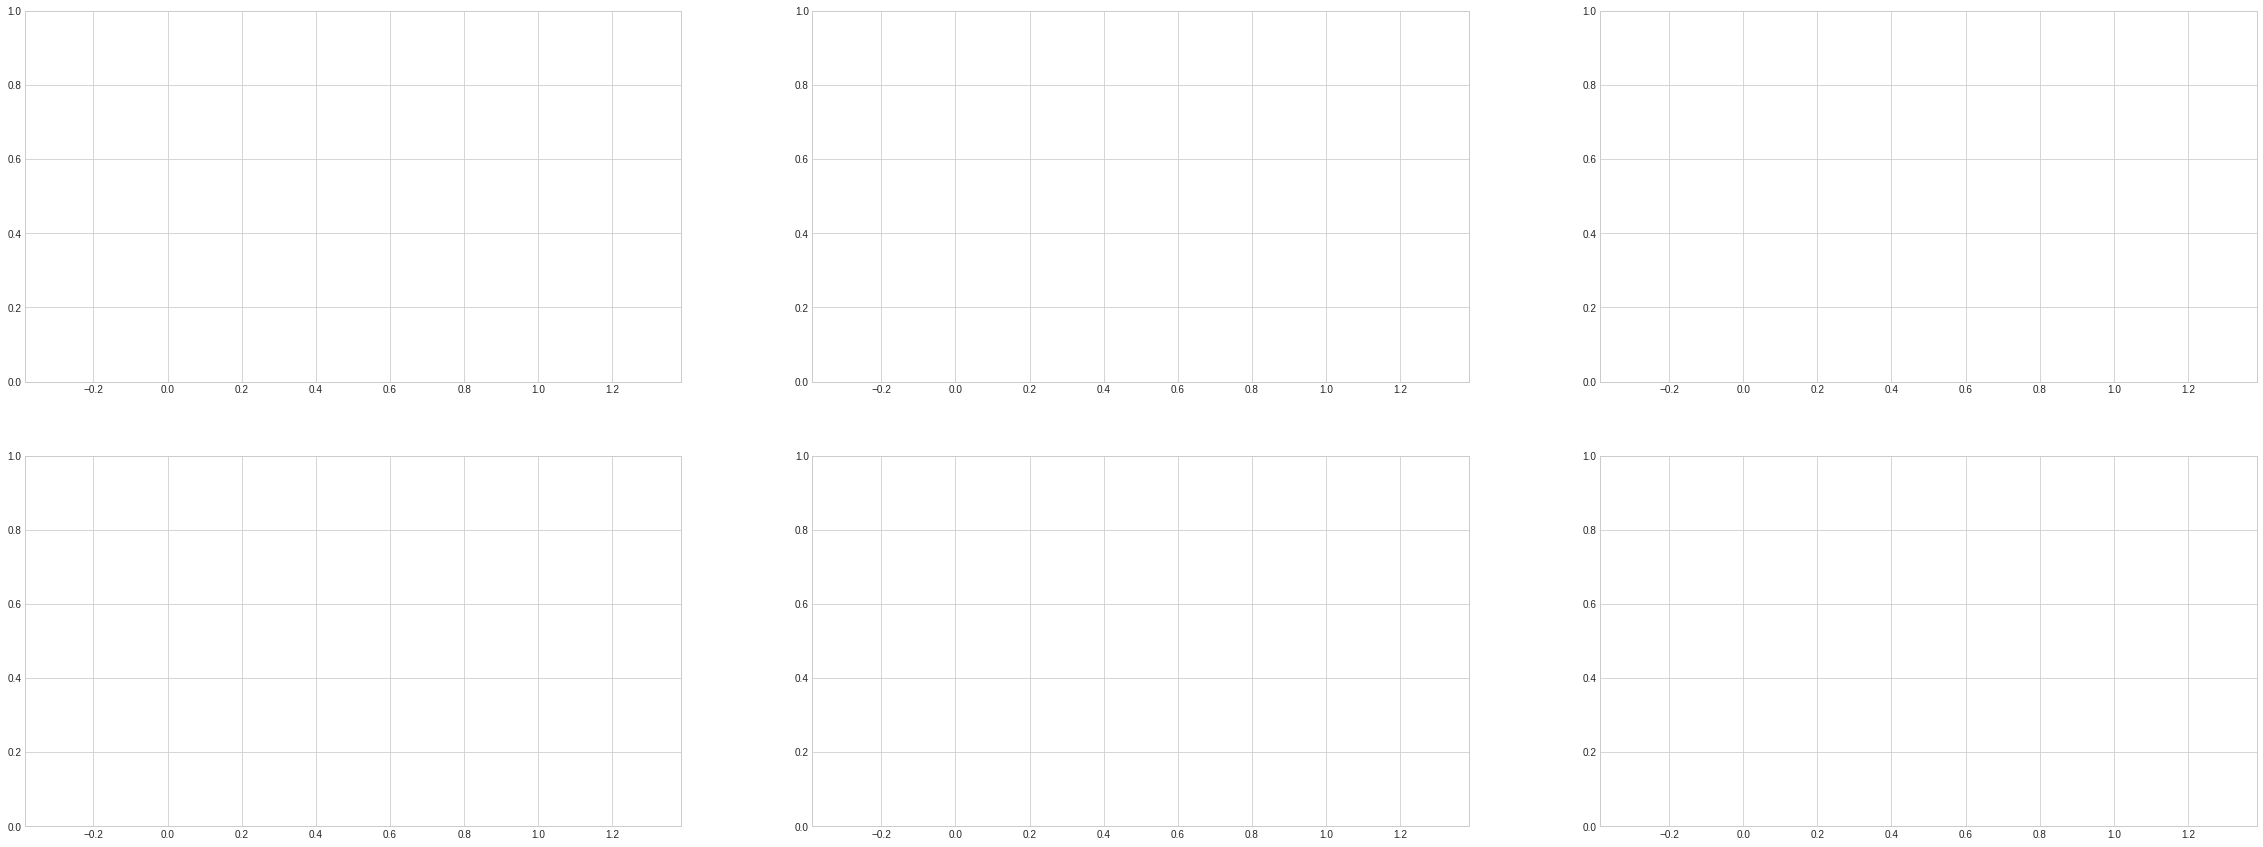

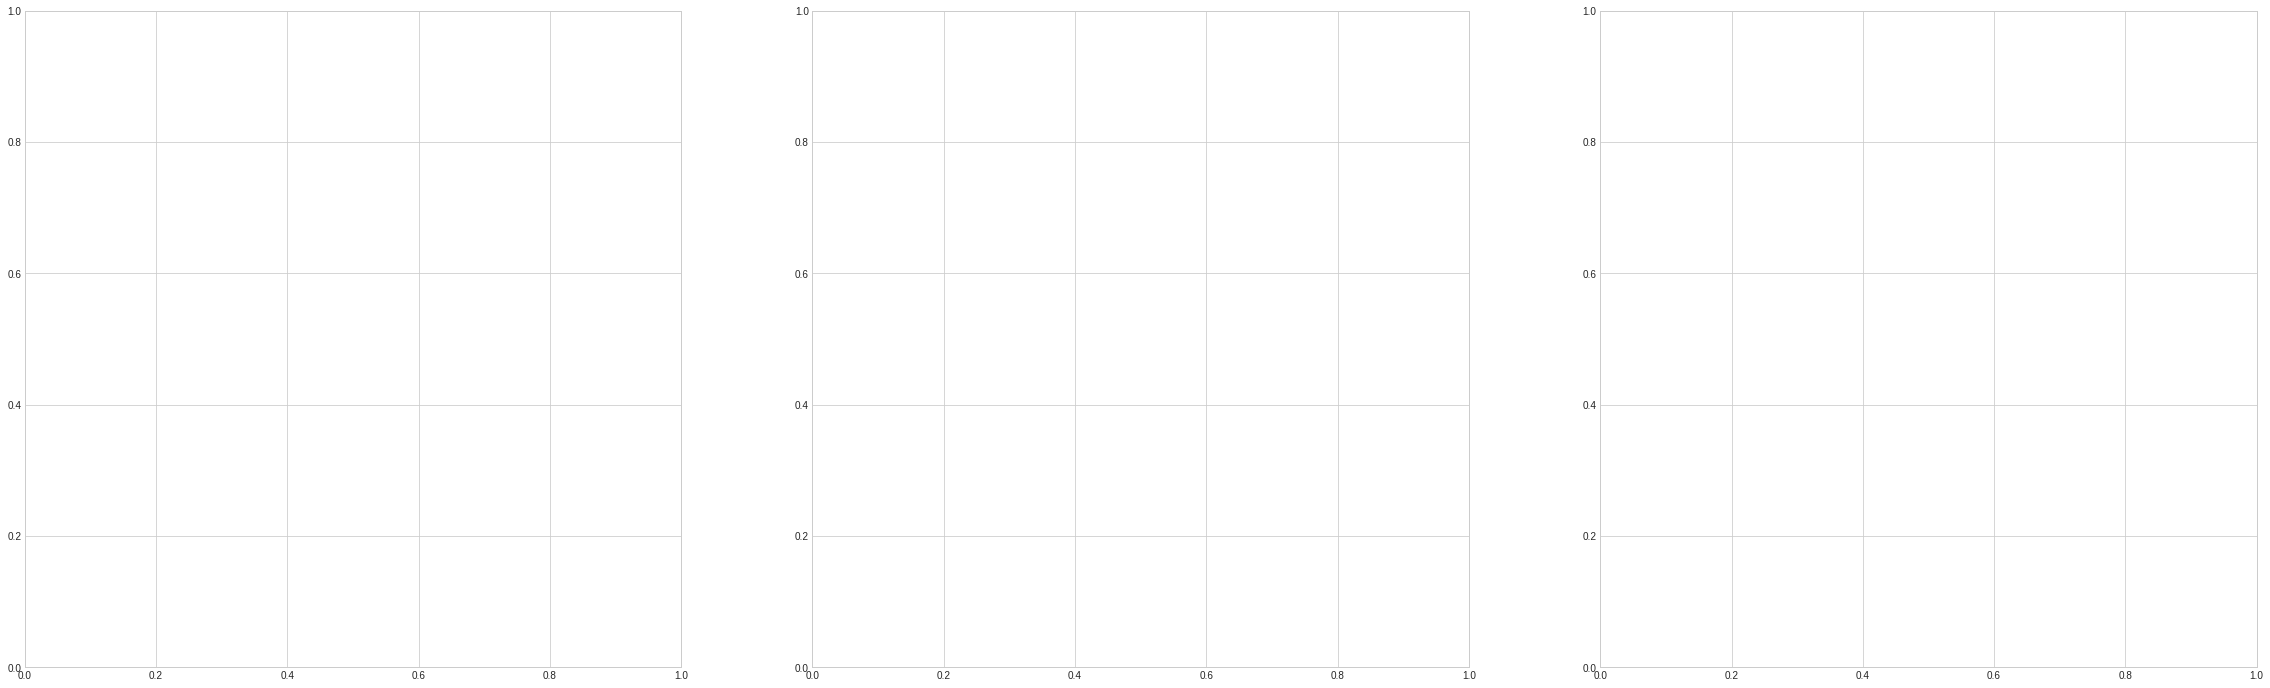

In [70]:
%load_ext autoreload
%autoreload 2
from simulation import DynamicSimulation
from tracker import StaticTracker
prior = [(0, 0, 0.00001, -10, 40, True), 
        (10, 0.009, -0.004, 50, 90, True),
        (40, 0, -0.01, 1, 40, False)]

model = StaticTracker()
name = f"simulations/dynamic_testing2"
sim = DynamicSimulation(model,prior=prior,save_processed=True,video_flag=True,name=name)
res = sim.run(N=100)
#sim.video.generate("try.avi")

#analyzeResults(res[2:],prior)

print(res)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.dir_name images/simulations/dynamic_testing2/database
(95,)
(95,)
(95,)


(0.0, 0.2)

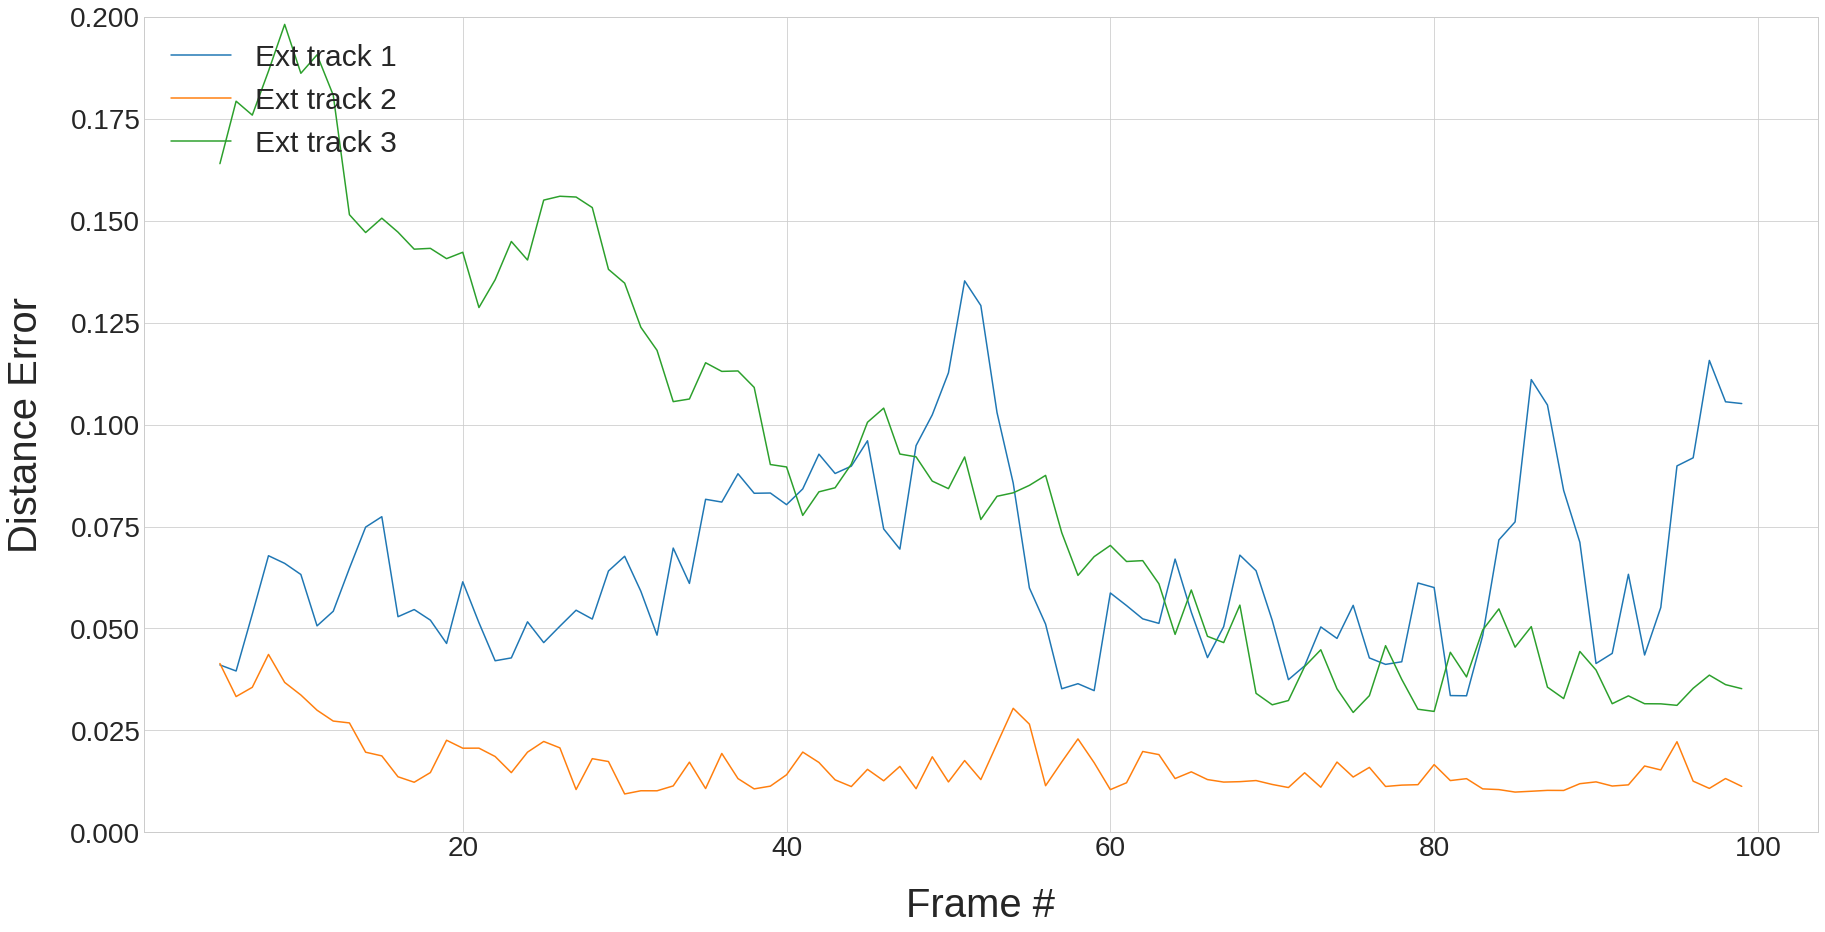

In [71]:
%load_ext autoreload
%autoreload 2
from plotting import *
from database import SimulatedProcessedDatabase
from video import SimulationVideo
from tqdm import tqdm
from metrics import *


name = "simulations/dynamic_testing2"
data = SimulatedProcessedDatabase(name)

fig, ax = plt.subplots(1,1,figsize=(30,15))

frames = range(5,100)

res = []
for idx in frames:
    priors, measurements, points, polynoms, debug_info, pos = data.load(idx)
    res.append(polynoms)

t = np.array(frames)/5
ass_list = associatePolynomAndPrior(res[-1], priors)
idx_map = [0, 2, 1]
for iprior in idx_map:
    dist = ComputePolynomDistance(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
    print(dist.shape)
    ax.plot(frames, dist, label=f"Ext track {idx_map[iprior]+1}")
    
    
ax.legend(loc='upper left',prop={'size': 30})

ax.set_xlabel('Frame #', fontsize=40, labelpad=25)
ax.set_ylabel('Distance Error', fontsize=40, labelpad=25)

ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)


ax.set_ylim(0,0.2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.dir_name images/simulations/dynamic_testing2/database
a0 0.3936646092836753 a1 -0.03310642174137806 a2 0.00029582606721874 prior {'c': (40, 0, -0.01), 'xmin': 1, 'xmax': 40, 'fx': False}
(95,)


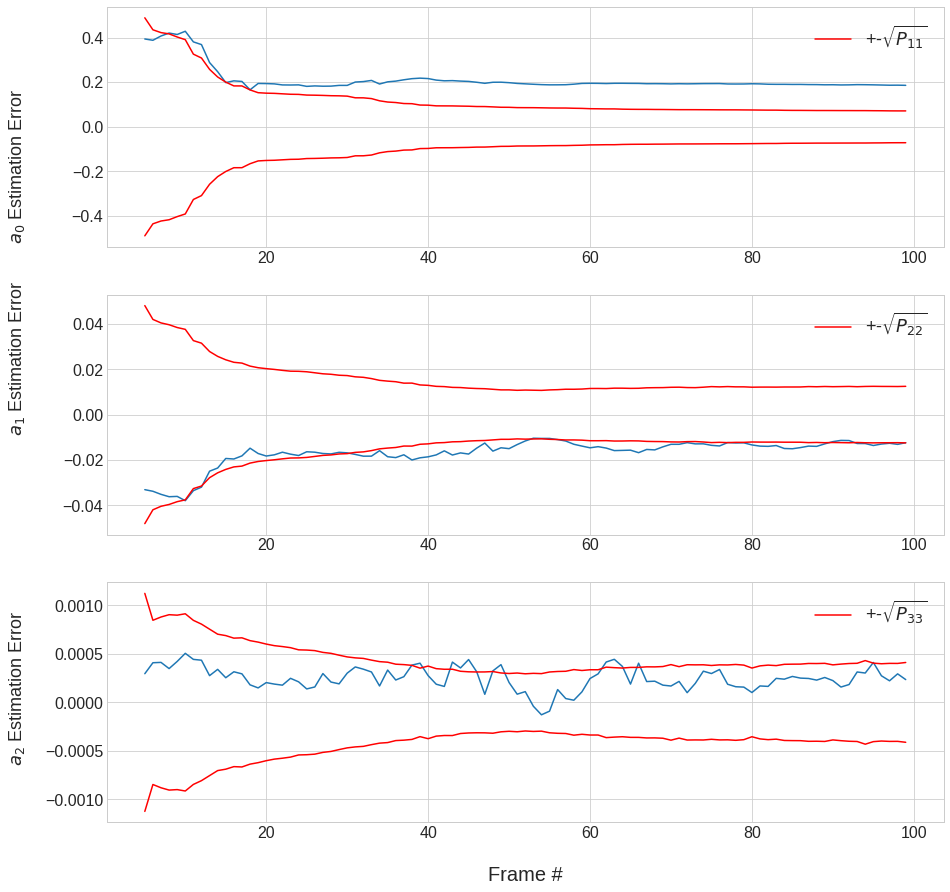

In [76]:
%load_ext autoreload
%autoreload 2
from plotting import *
from database import SimulatedProcessedDatabase
from video import SimulationVideo
from tqdm import tqdm
from metrics import *


name = "simulations/dynamic_testing2"
data = SimulatedProcessedDatabase(name)

fig, ax = plt.subplots(3,1,figsize=(15,15))

frames = range(5,100)

res = []

save_cov_flag = True

Pa0 = np.zeros(100)
Pa1 = np.zeros(100)
Pa2 = np.zeros(100)

for idx in frames:
    priors, measurements, points, polynoms, debug_info, pos = data.load(idx)
    res.append(polynoms)
    Pa0[idx] = np.sqrt(polynoms[0]["P"][0,0])
    Pa1[idx] = np.sqrt(polynoms[0]["P"][1,1])
    Pa2[idx] = np.sqrt(polynoms[0]["P"][2,2])
        
if save_cov_flag:
    np.save(os.path.join("images", name,"Pa0"), Pa0)
    np.save(os.path.join("images", name,"Pa1"), Pa1)
    np.save(os.path.join("images", name,"Pa2"), Pa2)

Pa0 = np.load(os.path.join("images", name,"Pa0.npy"))
Pa1 = np.load(os.path.join("images", name,"Pa1.npy"))
Pa2 = np.load(os.path.join("images", name,"Pa2.npy"))

t = np.array(frames)/5
ass_list = associatePolynomAndPrior(res[-1], priors)
for iprior,prior in enumerate(priors):
    if iprior != 2:
        continue
    a0, a1, a2 = ComputeCoeffErrors(res, priors[ass_list[iprior][0]], ass_list[iprior][1])
    print("a0", a0[0], "a1", a1[0], "a2", a2[0], "prior", prior)
    ax[0].plot(frames, a0)
    ax[0].plot(frames, Pa0[frames], color='red')
    ax[0].plot(frames, Pa0[frames]*(-1), color='red', label=r"+-$\sqrt{P_{11}}$")
    print(a0.shape)
    ax[1].plot(frames, a1)
    ax[1].plot(frames, Pa1[frames], color='red')
    ax[1].plot(frames, Pa1[frames]*(-1), color='red', label=r"+-$\sqrt{P_{22}}$")
    ax[2].plot(frames, a2)
    ax[2].plot(frames, Pa2[frames], color='red')
    ax[2].plot(frames, Pa2[frames]*(-1), color='red', label=r"+-$\sqrt{P_{33}}$")
    
    
ax[0].legend(loc='upper right',prop={'size': 18})
ax[1].legend(loc='upper right',prop={'size': 18})
ax[2].legend(loc='upper right',prop={'size': 18})
ax[0].text(-12, -0.5, '$a_0$ Estimation Error',
        fontsize = 18, rotation=90)
ax[1].text(-12, -0.007, '$a_1$ Estimation Error',
        fontsize = 18, rotation=90)
ax[2].text(-12, -0.0006, '$a_2$ Estimation Error',
        fontsize = 18, rotation=90)
#ax[0].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[1].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
ax[2].set_xlabel('Frame #', fontsize=20, labelpad=25)

ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
ax[2].tick_params(axis="x", labelsize=16)
ax[2].tick_params(axis="y", labelsize=16)

#ax[0].set_ylim(-1.3,1.3)
#ax[1].set_ylim(-0.0125,0.014)
#ax[2].set_ylim(-0.00035,0.00035)

In [231]:
from utils import ExtendedObjectTrack
from dataset import DynamicSimulatedDataset
from tools import generatePolynomNoisyPoints
import random

def generateData(prior, dR, dAz, pos, R, N=1):
    if not prior[5]:
        pos = np.array([pos[1],pos[0]])
        R = np.linalg.inv(R)
    [_,_,x_poly,y_poly,polynom_cov] = generatePolynomNoisyPoints(N=N,a1=prior[0],a2=prior[1],a3=prior[2],dR=dR,dAz=dAz,xRange=[prior[3],prior[4]],pos=pos,R=np.linalg.inv(R))
    if prior[5]:
        z = np.array([x_poly, y_poly]).T
        dz = np.array(polynom_cov)
    else:
        z = np.array([y_poly, x_poly]).T
        dz = np.flip(np.array(polynom_cov))

    return z,dz

prior = [10, 0.009, -0.004, 0, 40, True]

res = []
N = 1000
x = [prior[0]+5.5, prior[1] + 0.1, prior[2] + 0.0006, 5, 35]
P = np.diag([10, 0.01, 0.0005, 5, 5])
trk = ExtendedObjectTrack(x=x,P=P,create_frame_idx=0,fxFlag=True,gamma=1.)
res.append(trk.getStateVector())
Z,dZ = generateData(prior, dR=1, dAz=0.04, pos=[0,0], R=np.eye(2), N=N)
P_report = np.zeros((N,5,5))
P_report[0,:,:] = P
for i in range(1,N):
    trk.predict()
    choice = random.randint(0, N-1)
    z = np.squeeze(np.array(Z[choice,:]))
    x = z[0]
    cov = np.squeeze(np.array(dZ[choice, :]))
    print(cov)
    Hse = np.array([1 if x < trk.getStateVector()[3] else 0, 1 if x > trk.getStateVector()[4] else 0])
    H = np.array([[0, 0, 0, Hse[0], Hse[1]],[1, x, x**2, 0, 0]])
    trk.update(z, current_frame_idx=i, cov=cov, H=H)
    trk.save()
    res.append(trk.getStateVector())
    P_report[i,:,:] = trk.getStateCovarianceMatrix()

[[0.73440434 0.12575737]
 [0.12575737 0.94045492]]
[[ 1.878384   -0.14662238]
 [-0.14662238  1.02447463]]
[[ 1.05274327 -0.0168354 ]
 [-0.0168354   1.00537378]]
[[0.77234929 0.10113304]
 [0.10113304 0.955072  ]]
[[0.62719309 0.32699799]
 [0.32699799 0.71318212]]
[[ 2.52556049 -0.15656506]
 [-0.15656506  1.01606794]]
[[ 2.42438925 -0.15844243]
 [-0.15844243  1.0176244 ]]
[[ 1.02607826 -0.0085425 ]
 [-0.0085425   1.00279828]]
[[ 1.46519159 -0.10516044]
 [-0.10516044  1.0237724 ]]
[[0.95641407 0.18527799]
 [0.18527799 0.21240797]]
[[ 1.29928393 -0.0770349 ]
 [-0.0770349   1.01982858]]
[[0.61677238 0.30169521]
 [0.30169521 0.76249103]]
[[0.82832227 0.32809031]
 [0.32809031 0.37299235]]
[[0.70474028 0.36414753]
 [0.36414753 0.55089227]]
[[0.61717341 0.30360892]
 [0.30360892 0.75921636]]
[[ 2.33987699 -0.15912979]
 [-0.15912979  1.01889897]]
[[0.7570145  0.11064277]
 [0.11064277 0.94961912]]
[[ 2.41026611 -0.15861433]
 [-0.15861433  1.01783955]]
[[ 1.47196412 -0.10614379]
 [-0.10614379  1.02

[[0.67060239 0.17918477]
 [0.17918477 0.90252758]]
[[0.72538287 0.36377634]
 [0.36377634 0.51811738]]
[[ 2.12186954 -0.15688583]
 [-0.15688583  1.02193942]]
[[ 2.22490852 -0.1586988 ]
 [-0.1586988   1.02056097]]
[[ 2.39134692 -0.15880911]
 [-0.15880911  1.01812656]]
[[0.76888161 0.10323651]
 [0.10323651 0.95388607]]
[[0.98993594 0.00341861]
 [0.00341861 0.99883875]]
[[0.96007823 0.01399058]
 [0.01399058 0.995097  ]]
[[0.67934942 0.36060257]
 [0.36060257 0.59446754]]
[[ 1.69830314 -0.13279616]
 [-0.13279616  1.02525382]]
[[ 2.5495866  -0.15595687]
 [-0.15595687  1.01569615]]
[[0.71641128 0.13891684]
 [0.13891684 0.93195114]]
[[ 1.03135505 -0.01021793]
 [-0.01021793  1.0033298 ]]
[[ 1.71013347 -0.13388831]
 [-0.13388831  1.02524325]]
[[ 1.43341408 -0.10038514]
 [-0.10038514  1.02325069]]
[[0.8563629  0.30869752]
 [0.30869752 0.33656307]]
[[0.65532944 0.19614198]
 [0.19614198 0.88838131]]
[[0.62148062 0.31668108]
 [0.31668108 0.73505476]]
[[0.85534112 0.05721658]
 [0.05721658 0.97736926]]

[[0.70926834 0.36429244]
 [0.36429244 0.54353446]]
[[0.75535368 0.11170628]
 [0.11170628 0.94899456]]
[[ 2.30750034 -0.15917152]
 [-0.15917152  1.01937711]]
[[0.82086883 0.07413517]
 [0.07413517 0.96931844]]
[[0.75535368 0.11170628]
 [0.11170628 0.94899456]]
[[ 1.51124557 -0.1116174 ]
 [-0.1116174   1.02436881]]
[[0.61717341 0.30360892]
 [0.30360892 0.75921636]]
[[ 2.42438925 -0.15844243]
 [-0.15844243  1.0176244 ]]
[[ 1.61813437 -0.12465129]
 [-0.12465129  1.02513684]]
[[0.96051075 0.17690828]
 [0.17690828 0.20746684]]
[[0.99733995 0.04717717]
 [0.04717717 0.16329085]]
[[0.77938653 0.09694341]
 [0.09694341 0.95740049]]
[[ 1.21134761 -0.05850692]
 [-0.05850692  1.01619635]]
[[0.65721985 0.19389341]
 [0.19389341 0.8903243 ]]
[[0.96183919 0.17408269]
 [0.17408269 0.20586634]]
[[ 1.05274327 -0.0168354 ]
 [-0.0168354   1.00537378]]
[[ 1.53685538 -0.11498132]
 [-0.11498132  1.02462619]]
[[0.61612061 0.27520261]
 [0.27520261 0.80270762]]
[[0.88565912 0.04357102]
 [0.04357102 0.98339672]]
[[ 

(1000,)


(-0.0035, 0.0035)

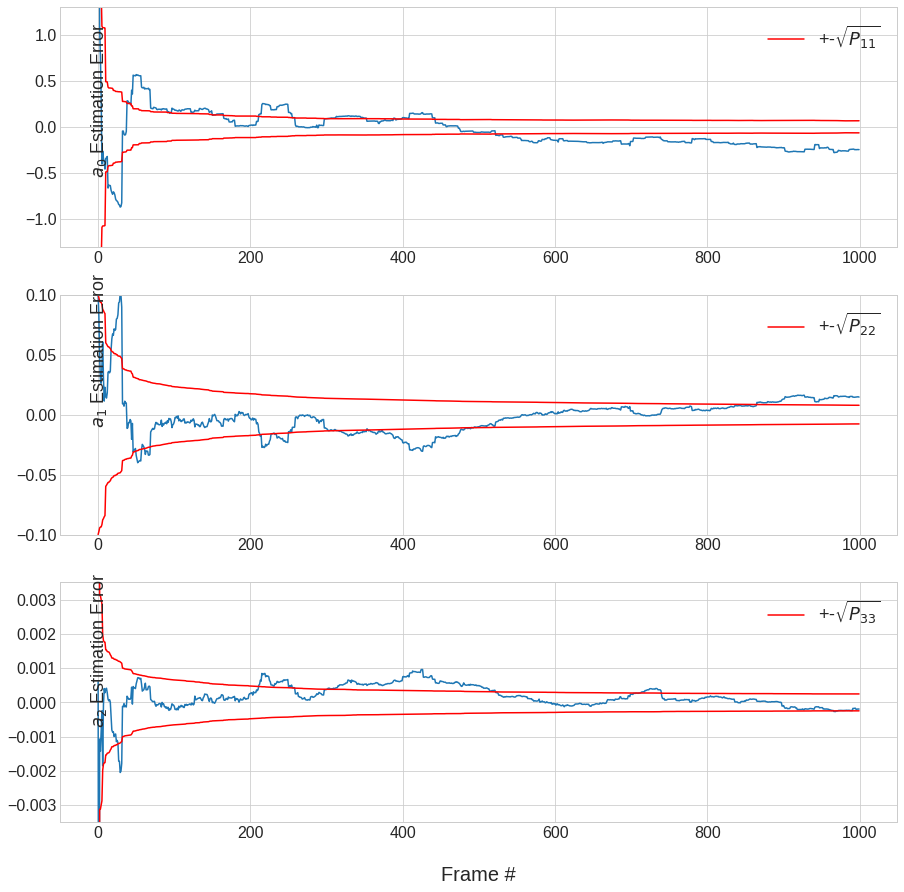

In [232]:
frames = range(0,N)
a0 = np.zeros(len(res))
a1 = np.zeros(len(res))
a2 = np.zeros(len(res))
Pa0 = np.zeros(len(res))
Pa1 = np.zeros(len(res))
Pa2 = np.zeros(len(res))

for iframe,frame in enumerate(res):
    a0[iframe] = frame[0] - prior[0]
    a1[iframe] = frame[1] - prior[1]
    a2[iframe] = frame[2] - prior[2]
    Pa0[iframe] = np.sqrt(P_report[iframe,0,0])
    Pa1[iframe] = np.sqrt(P_report[iframe,1,1])
    Pa2[iframe] = np.sqrt(P_report[iframe,2,2])

  
fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].plot(frames, a0)
ax[0].plot(frames, Pa0[frames], color='red')
ax[0].plot(frames, Pa0[frames]*(-1), color='red', label=r"+-$\sqrt{P_{11}}$")
print(a0.shape)
ax[1].plot(frames, a1)
ax[1].plot(frames, Pa1[frames], color='red')
ax[1].plot(frames, Pa1[frames]*(-1), color='red', label=r"+-$\sqrt{P_{22}}$")
ax[2].plot(frames, a2)
ax[2].plot(frames, Pa2[frames], color='red')
ax[2].plot(frames, Pa2[frames]*(-1), color='red', label=r"+-$\sqrt{P_{33}}$")
    
    
ax[0].legend(loc='upper right',prop={'size': 18})
ax[1].legend(loc='upper right',prop={'size': 18})
ax[2].legend(loc='upper right',prop={'size': 18})
ax[0].text(-12, -0.5, '$a_0$ Estimation Error',
        fontsize = 18, rotation=90)
ax[1].text(-12, -0.007, '$a_1$ Estimation Error',
        fontsize = 18, rotation=90)
ax[2].text(-12, -0.0006, '$a_2$ Estimation Error',
        fontsize = 18, rotation=90)
#ax[0].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[1].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
ax[2].set_xlabel('Frame #', fontsize=20, labelpad=25)

ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
ax[2].tick_params(axis="x", labelsize=16)
ax[2].tick_params(axis="y", labelsize=16)

ax[0].set_ylim(-1.3,1.3)
ax[1].set_ylim(-0.1,0.1)
ax[2].set_ylim(-0.0035,0.0035)


In [69]:
%load_ext autoreload
%autoreload 2
from utils import ExtendedObjectTrack_UKF
from dataset import DynamicSimulatedDataset
from tools import generatePolynomNoisyPoints
import random
import numpy as np

def generateData(prior, dR, dAz, pos, R, N=1):
    if not prior[5]:
        pos = np.array([pos[1],pos[0]])
        R = np.linalg.inv(R)
    [_,_,x_poly,y_poly,polynom_cov] = generatePolynomNoisyPoints(N=N,a1=prior[0],a2=prior[1],a3=prior[2],dR=dR,dAz=dAz,xRange=[prior[3],prior[4]],pos=pos,R=np.linalg.inv(R))
    if prior[5]:
        z = np.array([x_poly, y_poly]).T
        dz = np.array(polynom_cov)
    else:
        z = np.array([y_poly, x_poly]).T
        dz = np.flip(np.array(polynom_cov))

    return z,dz

prior = [10, 0.009, -0.004, 0, 40, True]

res = []
N = 1000
x = [prior[0]+5.5, prior[1] + 0.1, prior[2] + 0.0006, 5, 35]
P = np.diag([10, 0.01, 0.0005, 5, 5]) * 5
trk = ExtendedObjectTrack_UKF(x=x,P=P,create_frame_idx=0,fxFlag=True,gamma=1.)
res.append(trk.getStateVector())
Z,dZ = generateData(prior, dR=1, dAz=0.04, pos=[0,0], R=np.eye(2), N=N)
P_report = np.zeros((N,5,5))
P_report[0,:,:] = P
for i in range(1,N):
    trk.predict()
    choice = random.randint(0, N-1)
    z = np.squeeze(np.array(Z[choice,:]))
    x = z[0]
    cov = np.squeeze(np.array(dZ[choice, :])) * 1.5
    print(cov)
    Hse = np.array([1 if x < trk.getStateVector()[3] else 0, 1 if x > trk.getStateVector()[4] else 0])
    H = np.array([[0, 0, 0, Hse[0], Hse[1]],[1, x, x**2, 0, 0]])
    trk.update(z, current_frame_idx=i, cov=cov, H=H)
    #trk.save()
    res.append(trk.getStateVector())
    P_report[i,:,:] = trk.getStateCovarianceMatrix()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: expected size(x) 4, but size is 5

In [ ]:
import matplotlib.pyplot as plt

frames = range(0,N)
a0 = np.zeros(len(res))
a1 = np.zeros(len(res))
a2 = np.zeros(len(res))
Pa0 = np.zeros(len(res))
Pa1 = np.zeros(len(res))
Pa2 = np.zeros(len(res))

for iframe,frame in enumerate(res):
    a0[iframe] = frame[0] - prior[0]
    a1[iframe] = frame[1] - prior[1]
    a2[iframe] = frame[2] - prior[2]
    Pa0[iframe] = np.sqrt(P_report[iframe,0,0])
    Pa1[iframe] = np.sqrt(P_report[iframe,1,1])
    Pa2[iframe] = np.sqrt(P_report[iframe,2,2])

  
fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].plot(frames, a0)
ax[0].plot(frames, Pa0[frames], color='red')
ax[0].plot(frames, Pa0[frames]*(-1), color='red', label=r"+-$\sqrt{P_{11}}$")
print(a0.shape)
ax[1].plot(frames, a1)
ax[1].plot(frames, Pa1[frames], color='red')
ax[1].plot(frames, Pa1[frames]*(-1), color='red', label=r"+-$\sqrt{P_{22}}$")
ax[2].plot(frames, a2)
ax[2].plot(frames, Pa2[frames], color='red')
ax[2].plot(frames, Pa2[frames]*(-1), color='red', label=r"+-$\sqrt{P_{33}}$")
    
    
ax[0].legend(loc='upper right',prop={'size': 18})
ax[1].legend(loc='upper right',prop={'size': 18})
ax[2].legend(loc='upper right',prop={'size': 18})
ax[0].text(-12, -0.5, '$a_0$ Estimation Error',
        fontsize = 18, rotation=90)
ax[1].text(-12, -0.007, '$a_1$ Estimation Error',
        fontsize = 18, rotation=90)
ax[2].text(-12, -0.0006, '$a_2$ Estimation Error',
        fontsize = 18, rotation=90)
#ax[0].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[1].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
ax[2].set_xlabel('Frame #', fontsize=20, labelpad=25)

ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
ax[2].tick_params(axis="x", labelsize=16)
ax[2].tick_params(axis="y", labelsize=16)

ax[0].set_ylim(-1.3,1.3)
ax[1].set_ylim(-0.1,0.1)
ax[2].set_ylim(-0.0035,0.0035)

In [70]:
%load_ext autoreload
%autoreload 2
from utils import ExtendedObjectTrack
from dataset import DynamicSimulatedDataset
from tools import generatePolynomNoisyPoints
import random
import numpy as np

def generateData(prior, dR, dAz, pos, R, N=1):
    if not prior[5]:
        pos = np.array([pos[1],pos[0]])
        R = np.linalg.inv(R)
    [_,_,x_poly,y_poly,polynom_cov] = generatePolynomNoisyPoints(N=N,a1=prior[0],a2=prior[1],a3=prior[2],dR=dR,dAz=dAz,xRange=[prior[3],prior[4]],pos=pos,R=np.linalg.inv(R))
    if prior[5]:
        z = np.array([x_poly, y_poly]).T
        dz = np.array(polynom_cov)
    else:
        z = np.array([y_poly, x_poly]).T
        dz = np.flip(np.array(polynom_cov))

    return z,dz

prior = [10, 0.009, -0.004, 0, 40, True]

res = []
N = 500
x = [prior[0]+5.5, prior[1] + 0.1, prior[2] + 0.0006, 5, 35]
P = np.diag([10, 0.2, 0.005, 5, 5])
trk = ExtendedObjectTrack(x=x,P=P,create_frame_idx=0,fxFlag=True,gamma=1.)
res.append(trk.getStateVector())
Z,dZ = generateData(prior, dR=1, dAz=0.04, pos=[0,0], R=np.eye(2), N=N)
P_report = np.zeros((N,5,5))
P_report[0,:,:] = P
for i in range(1,N):
    trk.predict()
    choice = random.randint(0, N-1)
    z = np.squeeze(np.array(Z[choice,:]))
    x = z[0]
    cov = np.squeeze(np.array(dZ[choice, :])) * 1.
    print(cov)
    Hse = np.array([1 if x < trk.getStateVector()[3] else 0, 1 if x > trk.getStateVector()[4] else 0])
    H = np.array([[0, 0, 0, Hse[0], Hse[1]],[1, x, x**2, 0, 0]])
    trk.update(z, current_frame_idx=i, cov=cov, H=H)
    #trk.save()
    res.append(trk.getStateVector())
    P_report[i,:,:] = trk.getStateCovarianceMatrix()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0.86848117 0.29881422]
 [0.29881422 0.32108627]]
[[ 1.44632534 -0.10235781]
 [-0.10235781  1.02347418]]
[[ 1.41831502 -0.09802057]
 [-0.09802057  1.02296841]]
[[0.87623884 0.29195893]
 [0.29195893 0.31125389]]
[[0.76973458 0.35498239]
 [0.35498239 0.45275112]]
[[ 1.01160851 -0.00385762]
 [-0.00385762  1.00128193]]
[[0.80046752 0.34305217]
 [0.34305217 0.41019732]]
[[0.98617931 0.10667249]
 [0.10667249 0.17666743]]
[[ 1.68214399 -0.13125981]
 [-0.13125981  1.02525733]]
[[0.87623884 0.29195893]
 [0.29195893 0.31125389]]
[[ 1.38454553 -0.09250037]
 [-0.09250037  1.02225047]]
[[ 2.14766138 -0.15747167]
 [-0.15747167  1.02160683]]
[[ 1.10380169 -0.0315863 ]
 [-0.0315863   1.00961154]]
[[ 1.92311339 -0.14918793]
 [-0.14918793  1.02411084]]
[[ 2.54958459 -0.15595693]
 [-0.15595693  1.01569618]]
[[0.61540238 0.28945514]
 [0.28945514 0.78215082]]
[[0.64416054 0.21059911]
 [0.21059911 0.87535956]]
[[0.88810

(500,)


(-0.0085, 0.0085)

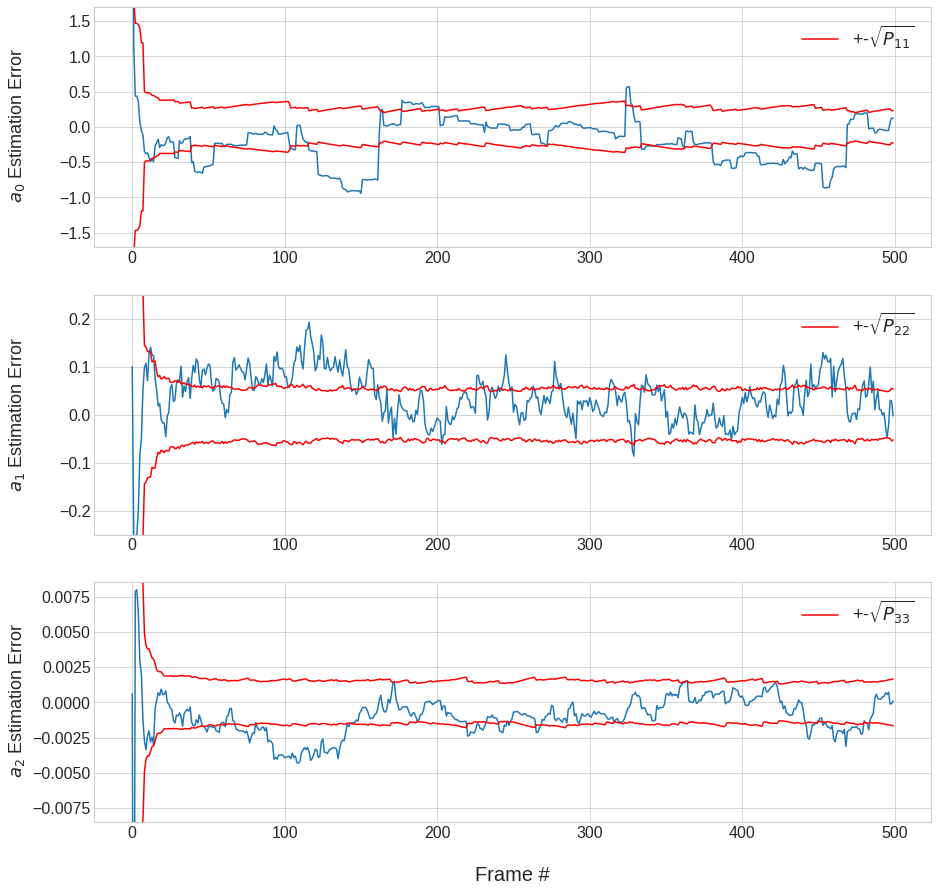

In [75]:
import matplotlib.pyplot as plt

frames = range(0,N)
a0 = np.zeros(len(res))
a1 = np.zeros(len(res))
a2 = np.zeros(len(res))
Pa0 = np.zeros(len(res))
Pa1 = np.zeros(len(res))
Pa2 = np.zeros(len(res))

for iframe,frame in enumerate(res):
    a0[iframe] = frame[0] - prior[0]
    a1[iframe] = frame[1] - prior[1]
    a2[iframe] = frame[2] - prior[2]
    Pa0[iframe] = np.sqrt(P_report[iframe,0,0])
    Pa1[iframe] = np.sqrt(P_report[iframe,1,1])
    Pa2[iframe] = np.sqrt(P_report[iframe,2,2])

  
fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].plot(frames, a0)
ax[0].plot(frames, Pa0[frames], color='red')
ax[0].plot(frames, Pa0[frames]*(-1), color='red', label=r"+-$\sqrt{P_{11}}$")
print(a0.shape)
ax[1].plot(frames, a1)
ax[1].plot(frames, Pa1[frames], color='red')
ax[1].plot(frames, Pa1[frames]*(-1), color='red', label=r"+-$\sqrt{P_{22}}$")
ax[2].plot(frames, a2)
ax[2].plot(frames, Pa2[frames], color='red')
ax[2].plot(frames, Pa2[frames]*(-1), color='red', label=r"+-$\sqrt{P_{33}}$")
    
    
ax[0].legend(loc='upper right',prop={'size': 18})
ax[1].legend(loc='upper right',prop={'size': 18})
ax[2].legend(loc='upper right',prop={'size': 18})
ax[0].text(-82, -1., '$a_0$ Estimation Error',
        fontsize = 18, rotation=90)
ax[1].text(-82, -0.15, '$a_1$ Estimation Error',
        fontsize = 18, rotation=90)
ax[2].text(-82, -0.005, '$a_2$ Estimation Error',
        fontsize = 18, rotation=90)
#ax[0].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[1].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
ax[2].set_xlabel('Frame #', fontsize=20, labelpad=25)

ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
ax[2].tick_params(axis="x", labelsize=16)
ax[2].tick_params(axis="y", labelsize=16)

ax[0].set_ylim(-1.7,1.7)
ax[1].set_ylim(-0.25,0.25)
ax[2].set_ylim(-0.0085,0.0085)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[15.5, 0.109, -0.0034000000000000002, 5, 35]
[11.1282171  -0.24561125 -0.03918353  4.12257981 35.        ]
[ 1.04361961e+01 -2.43042963e-01  3.86320028e-03  4.12257981e+00
  3.50000000e+01]
[ 1.04343957e+01 -2.42916362e-01  3.98469038e-03  4.12257981e+00
  3.50000000e+01]
[ 1.03566975e+01 -1.90579282e-01  2.33080209e-03  4.12257981e+00
  3.50000000e+01]
[ 1.00683729e+01 -7.48170620e-02 -1.13635868e-03  4.12257981e+00
  3.50000000e+01]
[ 9.94402898e+00 -4.14610493e-02 -1.95352163e-03  4.12257981e+00
  3.50000000e+01]
[ 9.88617128e+00  6.02809904e-02 -5.23671385e-03  4.12257981e+00
  3.50000000e+01]
[ 9.65254554e+00  1.07412674e-01 -6.71470327e-03  1.27275486e+00
  3.50000000e+01]
[ 9.61883499e+00  1.15774820e-01 -7.34789654e-03  1.27275486e+00
  3.50000000e+01]
[ 9.63218734e+00  7.94382959e-02 -6.37389482e-03  1.27275486e+00
  3.50000000e+01]
[ 9.57081513e+00  1.36396161e-01 -6.02095105e-03  1.272754

(0.0, 0.5)

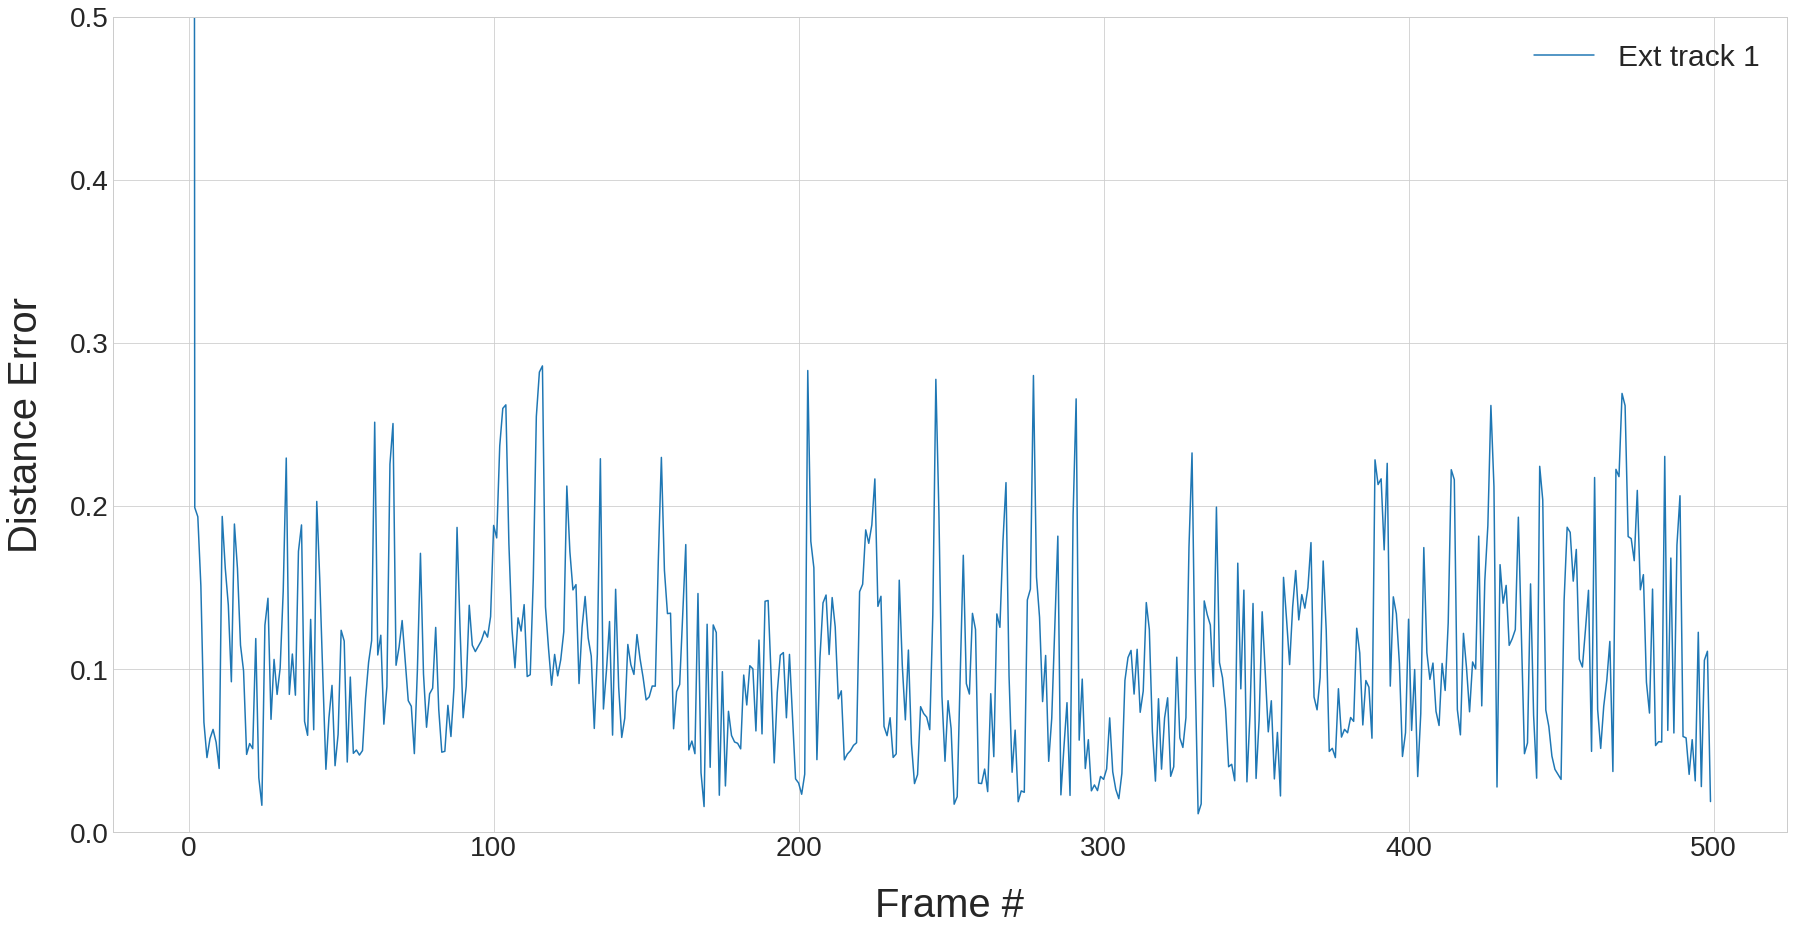

In [88]:
%load_ext autoreload
%autoreload 2
from plotting import *
from database import SimulatedProcessedDatabase
from video import SimulationVideo
from tqdm import tqdm
from metrics import *

def computeDist(res, prior):
    dist = np.zeros(len(res))
    for iframe,frame in enumerate(res):    
        f1 = (prior["c"][0],prior["c"][1],prior["c"][2])
        print(frame)
        f2 = (frame[0],frame[1],frame[2])
        xmin = max(prior["xmin"],frame[3])
        xmax = min(prior["xmax"],frame[4])
        dist[iframe] = innerProductPolynoms(f1,f2,xmin,xmax)
    
    return dist

fig, ax = plt.subplots(1,1,figsize=(30,15))

pr = {"c": (prior[0], prior[1], prior[2]), "xmin": prior[3], "xmax": prior[4]}

dist = computeDist(res, pr)
print(dist.shape)
ax.plot(range(0,N), dist, label=f"Ext track 1")
    
    
ax.legend(loc='upper right',prop={'size': 30})

ax.set_xlabel('Frame #', fontsize=40, labelpad=25)
ax.set_ylabel('Distance Error', fontsize=40, labelpad=25)

ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)


ax.set_ylim(0,0.5)

In [205]:
%load_ext autoreload
%autoreload 2
from utils import ExtendedObjectTrack_UKF
from dataset import DynamicSimulatedDataset
from tools import generatePolynomNoisyPoints
import random
import numpy as np

def generateData(prior, dR, dAz, pos, R, N=1):
    if not prior[4]:
        pos = np.array([pos[1],pos[0]])
        R = np.linalg.inv(R)
    [_,_,x_poly,y_poly,polynom_cov] = generatePolynomNoisyPoints(N=N,a1=prior[0],a2=prior[1],a3=prior[2],dR=dR,dAz=dAz,xRange=[prior[3],prior[4]],pos=pos,R=np.linalg.inv(R))
    if prior[4]:
        z = np.array([x_poly, y_poly]).T
        dz = np.array(polynom_cov)
    else:
        z = np.array([y_poly, x_poly]).T
        dz = np.flip(np.array(polynom_cov))

    return z,dz

prior = [10, 0.5, 0, 40, True]

res = []
N = 1000
x = [prior[0]+5.5, prior[1] + 0.1, 5, 35]
P = np.diag([10, 0.5, 5, 5])
trk = ExtendedObjectTrack_UKF(x=x,P=P,create_frame_idx=0,fxFlag=True,gamma=1.)
res.append(trk.getStateVector())
Z,dZ = generateData(prior, dR=1, dAz=0.04, pos=[0,0], R=np.eye(2), N=N)
P_report = np.zeros((N,4,4))
P_report[0,:,:] = P
for i in range(1,N):
    trk.predict()
    choice = random.randint(0, N-1)
    z = np.squeeze(np.array(Z[choice,:]))
    x = z[0]
    cov = np.squeeze(np.array(dZ[choice, :])) * 1.
    print(cov)
    Hse = np.array([1 if x < trk.getStateVector()[2] else 0, 1 if x > trk.getStateVector()[3] else 0])
    H = np.array([[0, 0, Hse[0], Hse[1]],[1, x, 0, 0]])
    trk.update(z, current_frame_idx=i, cov=cov, H=H)
    #trk.save()
    res.append(trk.getStateVector())
    P_report[i,:,:] = trk.getStateCovarianceMatrix()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[0.96140459 0.1698225 ]
 [0.1698225  0.25276908]]
[[ 2.15943194 -0.92843383]
 [-0.92843383  1.74345836]]
[[0.85403139 0.21370899]
 [0.21370899 0.68711402]]
[[ 2.41856394 -1.10653231]
 [-1.10653231  1.86313611]]
[[0.93407506 0.21308202]
 [0.21308202 0.31127817]]
[[ 1.36491221 -0.33576974]
 [-0.33576974  1.30895463]]
[[ 1.93263524 -0.76806133]
 [-0.76806133  1.63252834]]
[[ 2.08169465 -0.87400092]
 [-0.87400092  1.70618599]]
[[0.98283106 0.11663596]
 [0.11663596 0.20764186]]
[[0.8612903  0.25570635]
 [0.25570635 0.52861454]]
[[ 1.84037182 -0.70130229]
 [-0.70130229  1.58524678]]
[[ 1.93625689 -0.77066213]
 [-0.77066213  1.63435594]]
[[0.95951734 0.17346495]
 [0.17346495 0.2567167 ]]
[[0.85149646 0.2271973 ]
 [0.2271973  0.65240821]]
[[ 2.53141649 -1.18271896]
 [-1.18271896  1.91341849]]
[[ 1.8196017  -0.68613256]
 [-0.68613256  1.57439839]]
[[0.85793232 0.20114804]
 [0.20114804 0.71520242]]
[[ 1.6634

[[0.86531799 0.18323874]
 [0.18323874 0.75069842]]
[[0.91033515 0.23827727]
 [0.23827727 0.36679695]]
[[ 2.31338844 -1.03481668]
 [-1.03481668  1.81533042]]
[[ 1.09990682 -0.1020009 ]
 [-0.1020009   1.10413887]]
[[0.947642   0.0602462 ]
 [0.0602462  0.93067718]]
[[ 2.42283911 -1.10943238]
 [-1.10943238  1.86505929]]
[[ 2.10866049 -0.89294172]
 [-0.89294172  1.71919665]]
[[0.85966778 0.25473216]
 [0.25473216 0.53760816]]
[[ 1.16324284 -0.16147237]
 [-0.16147237  1.1597211 ]]
[[0.95255776 0.05427962]
 [0.05427962 0.93789759]]
[[ 1.87542399 -0.72678222]
 [-0.72678222  1.60337894]]
[[ 1.43445998 -0.39230406]
 [-0.39230406  1.35423855]]
[[0.8516684  0.22571666]
 [0.22571666 0.65652625]]
[[ 1.1931867  -0.18861594]
 [-0.18861594  1.18415332]]
[[ 2.6847613  -1.28511317]
 [-1.28511317  1.98026698]]
[[ 1.66022867 -0.56774361]
 [-0.56774361  1.48821389]]
[[ 1.46534206 -0.41697422]
 [-0.41697422  1.37363376]]
[[ 2.51382498 -1.1708917 ]
 [-1.1708917   1.90564457]]
[[ 1.84037182 -0.70130229]
 [-0.70

[[ 1.77493662 -0.65332085]
 [-0.65332085  1.55079102]]
[[0.93700057 0.07344899]
 [0.07344899 0.91436821]]
[[ 2.84841424 -1.39312355]
 [-1.39312355  2.04997742]]
[[ 1.55531589 -0.48754498]
 [-0.48754498  1.42804485]]
[[0.87118092 0.17128047]
 [0.17128047 0.77226199]]
[[0.96785774 0.15636731]
 [0.15636731 0.23929636]]
[[0.85114709 0.23282208]
 [0.23282208 0.63584106]]
[[ 1.26566742 -0.2522803 ]
 [-0.2522803   1.23956776]]
[[0.85971819 0.196365  ]
 [0.196365   0.72513035]]
[[0.88348902 0.14931683]
 [0.14931683 0.80864021]]
[[ 1.4045569  -0.36817062]
 [-0.36817062  1.33505696]]
[[0.90579668 0.11512889]
 [0.11512889 0.85929731]]
[[ 2.47454906 -1.14442158]
 [-1.14442158  1.88820425]]
[[0.85114155 0.23349091]
 [0.23349091 0.63375941]]
[[0.90410798 0.24331744]
 [0.24331744 0.38260375]]
[[ 1.18456693 -0.18085837]
 [-0.18085837  1.17722433]]
[[ 1.23547132 -0.22607567]
 [-0.22607567  1.21705493]]
[[ 1.00803688 -0.00872137]
 [-0.00872137  1.00946415]]
[[ 2.16732264 -0.93393062]
 [-0.93393062  1.74

(1000,)


(-0.1, 0.1)

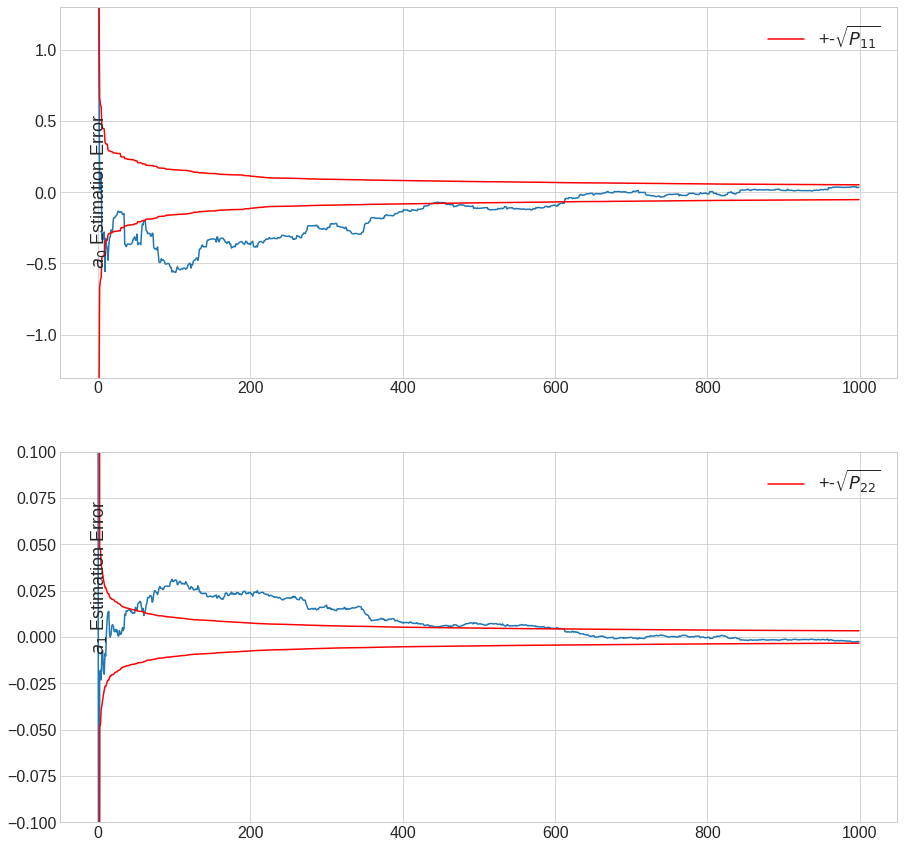

In [206]:
import matplotlib.pyplot as plt

frames = range(0,N)
a0 = np.zeros(len(res))
a1 = np.zeros(len(res))
a2 = np.zeros(len(res))
Pa0 = np.zeros(len(res))
Pa1 = np.zeros(len(res))
Pa2 = np.zeros(len(res))

for iframe,frame in enumerate(res):
    a0[iframe] = frame[0] - prior[0]
    a1[iframe] = frame[1] - prior[1]
    #a2[iframe] = frame[2] - prior[2]
    Pa0[iframe] = np.sqrt(P_report[iframe,0,0])
    Pa1[iframe] = np.sqrt(P_report[iframe,1,1])
    #Pa2[iframe] = np.sqrt(P_report[iframe,2,2])

  
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax[0].plot(frames, a0)
ax[0].plot(frames, Pa0[frames], color='red')
ax[0].plot(frames, Pa0[frames]*(-1), color='red', label=r"+-$\sqrt{P_{11}}$")
print(a0.shape)
ax[1].plot(frames, a1)
ax[1].plot(frames, Pa1[frames], color='red')
ax[1].plot(frames, Pa1[frames]*(-1), color='red', label=r"+-$\sqrt{P_{22}}$")
#ax[2].plot(frames, a2)
#ax[2].plot(frames, Pa2[frames], color='red')
#ax[2].plot(frames, Pa2[frames]*(-1), color='red', label=r"+-$\sqrt{P_{33}}$")
    
    
ax[0].legend(loc='upper right',prop={'size': 18})
ax[1].legend(loc='upper right',prop={'size': 18})
#ax[2].legend(loc='upper right',prop={'size': 18})
ax[0].text(-12, -0.5, '$a_0$ Estimation Error',
        fontsize = 18, rotation=90)
ax[1].text(-12, -0.007, '$a_1$ Estimation Error',
        fontsize = 18, rotation=90)
#ax[2].text(-12, -0.0006, '$a_2$ Estimation Error',
        #fontsize = 18, rotation=90)
#ax[0].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[1].set_xlabel('Time [sec]', fontsize=24, labelpad=25)
#ax[2].set_xlabel('Frame #', fontsize=20, labelpad=25)

ax[0].tick_params(axis="x", labelsize=16)
ax[0].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)
ax[1].tick_params(axis="y", labelsize=16)
#ax[2].tick_params(axis="x", labelsize=16)
#ax[2].tick_params(axis="y", labelsize=16)

ax[0].set_ylim(-1.3,1.3)
ax[1].set_ylim(-0.1,0.1)
#ax[2].set_ylim(-0.0035,0.0035)